In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
plt.switch_backend('Agg')
import seaborn as sns

# Sklearn
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_curve, auc, f1_score, precision_score, recall_score, 
                             roc_auc_score, precision_recall_curve)
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.base import clone

# Imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Autres
import os
import json
import joblib
from scipy.stats import ks_2samp
from mpl_toolkits.mplot3d import Axes3D

# UMAP (install: pip install umap-learn)
try:
    import umap.umap_ as umap
except ImportError:
    print("Note: umap-learn not installed. Install with: pip install umap-learn")

### Graphiques inline
%matplotlib inline


/Users/lucianoleroi/Desktop/projet data/data/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("/Users/lucianoleroi/Desktop/projet data/Loan_approval_data_2025.csv")



In [3]:
print (df.head())


  customer_id  age occupation_status  years_employed  annual_income  \
0  CUST100000   40          Employed            17.2          25579   
1  CUST100001   33          Employed             7.3          43087   
2  CUST100002   42           Student             1.1          20840   
3  CUST100003   53           Student             0.5          29147   
4  CUST100004   32          Employed            12.5          63657   

   credit_score  credit_history_years  savings_assets  current_debt  \
0           692                   5.3             895         10820   
1           627                   3.5             169         16550   
2           689                   8.4              17          7852   
3           692                   9.8            1480         11603   
4           630                   7.2             209         12424   

   defaults_on_file  delinquencies_last_2yrs  derogatory_marks   product_type  \
0                 0                        0                 0   

In [4]:
no_values = (df==0).sum(axis=0)
print(no_values)

customer_id                    0
age                            0
occupation_status              0
years_employed              3459
annual_income                  0
credit_score                   0
credit_history_years         302
savings_assets               435
current_debt                   0
defaults_on_file           47326
delinquencies_last_2yrs    30797
derogatory_marks           43607
product_type                   0
loan_intent                    0
loan_amount                    0
interest_rate                  0
debt_to_income_ratio           0
loan_to_income_ratio           0
payment_to_income_ratio        0
loan_status                22477
dtype: int64


In [5]:
df_zeero=df.iloc[0]
print (df_zeero)

customer_id                 CUST100000
age                                 40
occupation_status             Employed
years_employed                    17.2
annual_income                    25579
credit_score                       692
credit_history_years               5.3
savings_assets                     895
current_debt                     10820
defaults_on_file                     0
delinquencies_last_2yrs              0
derogatory_marks                     0
product_type               Credit Card
loan_intent                   Business
loan_amount                        600
interest_rate                    17.02
debt_to_income_ratio             0.423
loan_to_income_ratio             0.023
payment_to_income_ratio          0.008
loan_status                          1
Name: 0, dtype: object


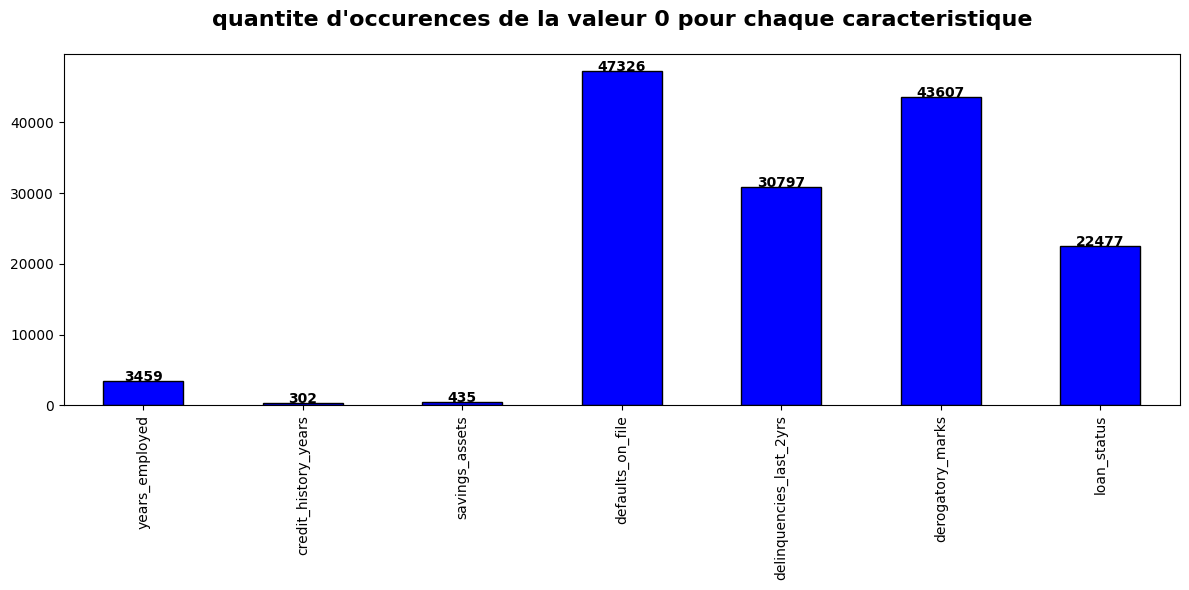


--- Résultat du Comptage (Colonnes avec au moins un zéro) ---
years_employed              3459
credit_history_years         302
savings_assets               435
defaults_on_file           47326
delinquencies_last_2yrs    30797
derogatory_marks           43607
loan_status                22477
dtype: int64


In [6]:
no_values_to_plot = no_values[no_values>0]
plt.figure(figsize=(12,6))
no_values_to_plot.plot(
    kind="bar",
    color="blue",
    edgecolor="black"
)
plt.title(
   "quantite d'occurences de la valeur 0 pour chaque caracteristique",
   fontsize=16,
   fontweight="bold",
   pad=20
    
)

for i, v in enumerate (no_values_to_plot):
    plt.text(
        i,
        v + 0.1,
        str(v),
        color="black",
        ha="center",
        fontweight="bold",
        fontsize=10
        
    )
    
plt.tight_layout()
plt.show()
print("\n--- Résultat du Comptage (Colonnes avec au moins un zéro) ---")
print(no_values_to_plot)

In [7]:
collone_numerique=df.select_dtypes(include=[np.number]).columns.tolist()
collone_categorique= df.select_dtypes(exclude=[np.number]).columns.tolist()

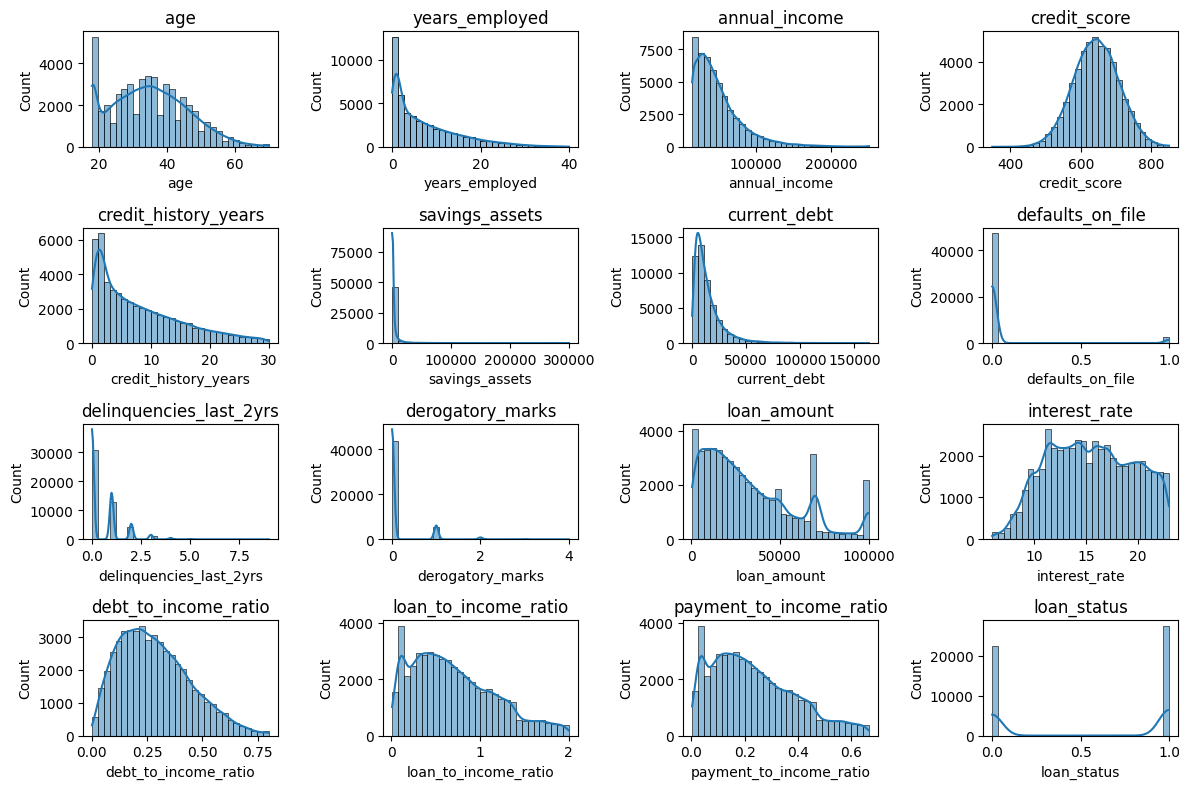

In [8]:
plt.figure(figsize=(12,8))

for idx , col in enumerate (collone_numerique):
    plt.subplot(4,4,idx+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()



In [9]:
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


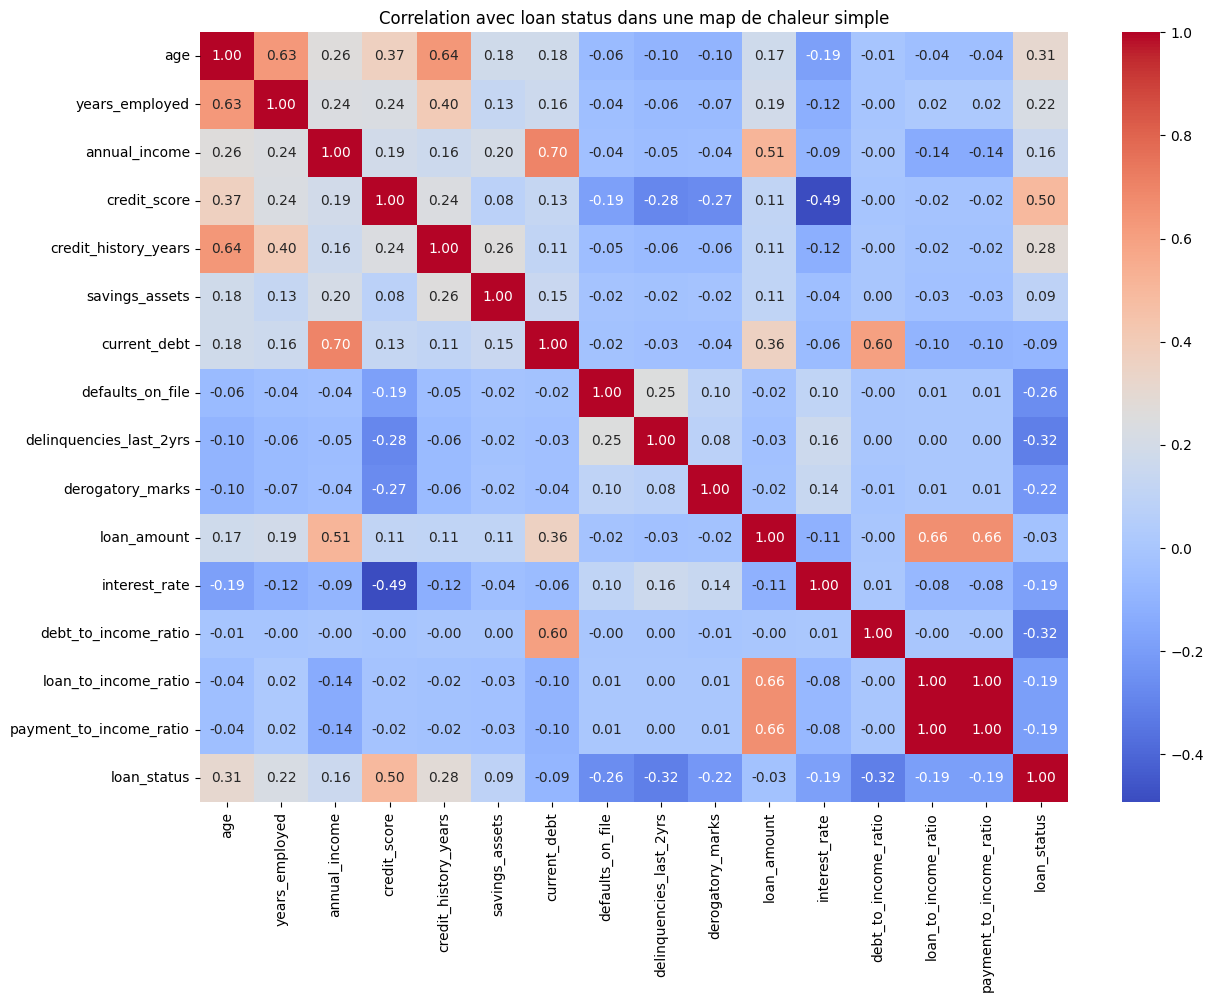

In [10]:

cor = df[collone_numerique].corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation avec loan status dans une map de chaleur simple")
plt.show()

# On peut apercevoir quel seule le credit score  a une correlation significative avec le loan status cor = 0.5 , par ailleurs l'age a une legere incidence cor=0.31.
# Par consequent une analise plus approfondie doit etre etablie et on cherche les correlations chachees avec des algoritmes de reduction de dimentionnalite et des differentes matrices de correlation ##

#  SECTION 0: CONTEXTE RÉGLEMENTAIRE ET ÉTHIQUE

##  Objectif du Projet

Ce projet vise à développer un **modèle de credit scoring** pour prédire l'approbation de prêts bancaires. Il s'agit d'un système d'aide à la décision qui doit respecter des contraintes réglementaires strictes.

---

##  Cadre Réglementaire Applicable

### 1. RGPD (Règlement Général sur la Protection des Données)

**Article 22 - Droit à l'explication**
- Les décisions automatisées ayant un impact significatif doivent être explicables
- Le client a le droit de connaître les raisons d'un refus de prêt
- L'opérateur bancaire doit pouvoir justifier chaque décision

**Implications pour ce projet:**
-  Nous utiliserons SHAP/LIME pour expliquer chaque prédiction
-  Un scorecard lisible sera créé pour transparence
-  Les coefficients du modèle seront interprétables

### 2. Fair Lending Act (Égalité de Traitement)

**Principe de non-discrimination**
- Interdiction de discriminer sur la base de caractéristiques protégées
- Variables protégées: âge, genre, race, origine, religion, statut marital

**Implications pour ce projet:**
-  Exclusion des variables protégées du modèle
-  Tests statistiques de disparate impact (Four-Fifths Rule)
-  Analyse de corrélation pour éviter discrimination indirecte

### 3. Directives BCE (Banque Centrale Européenne)

**Exigences de validation des modèles**
- Backtesting sur données historiques
- Tests de stabilité (PSI - Population Stability Index)
- Documentation complète pour audit

---

##  Variables Protégées - Gestion des Biais

### Variables Exclues du Modèle

Les variables suivantes sont **INTERDITES** dans le credit scoring:

| Variable | Raison | Statut |
|----------|--------|--------|
| **Age** | Discrimination par l'âge (sauf si légalement justifié) |  À VÉRIFIER |
| **Gender** | Discrimination de genre |  Non présent |
| **Race/Ethnicity** | Discrimination raciale |  Non présent |
| **Religion** | Discrimination religieuse |  Non présent |
| **Statut marital** | Discrimination familiale |  Non présent |
| **Origine géographique** | Redlining (discrimination géographique) |  À VÉRIFIER |

** ATTENTION:** Même si une variable n'est pas directement utilisée, elle peut créer une discrimination **indirecte** si elle est fortement corrélée avec une variable protégée.

### Stratégie de Mitigation

Dans ce projet, nous allons:

1. **Identifier** les variables potentiellement problématiques (ex: `age`)
2. **Analyser** les corrélations avec les variables protégées
3. **Tester** le disparate impact sur différents groupes
4. **Documenter** les choix d'inclusion/exclusion de variables

---

##  Définition du Problème Business

### Objectif Métier

**Maximiser le profit** tout en **minimisant le risque de crédit**, dans le respect des contraintes réglementaires.

### Définition du "Défaut"

Dans ce dataset:
- `loan_status = 0` : Prêt **refusé** (client non approuvé)
- `loan_status = 1` : Prêt **approuvé** (client accepté)

**Note:** Dans un contexte réel de credit scoring, le "défaut" serait défini comme:
- Retard de paiement > 90 jours
- Défaut de paiement total
- Restructuration de dette

### Coûts Business

Les erreurs du modèle ont des impacts financiers asymétriques:

| Type d'Erreur | Impact Business | Coût Estimé |
|---------------|-----------------|-------------|
| **Faux Positif (FP)** | Prêt approuvé qui fera défaut | 15 000 € (perte capitale) |
| **Faux Négatif (FN)** | Bon client refusé | 800 € (manque à gagner intérêts) |
| **Vrai Positif (TP)** | Bon prêt approuvé | +2 000 € (intérêts) |
| **Vrai Négatif (TN)** | Mauvais client correctement refusé | 0 € (évite perte) |

**Ratio FP/FN:** Le coût d'un FP est ~19x plus élevé qu'un FN

 **Implication:** Le seuil de décision doit être optimisé pour minimiser le coût total, pas seulement maximiser l'accuracy.

---

##  Métriques de Succès

### Métriques Techniques (ML)

1. **Gini Coefficient** (standard bancaire): Target > 0.40
2. **KS Statistic** (Kolmogorov-Smirnov): Target > 0.30
3. **AUC-ROC**: Target > 0.75
4. **Precision/Recall** équilibrés selon coût FP/FN

### Métriques Business

1. **Expected Profit** par décision
2. **Réduction du taux de défaut** vs règles manuelles
3. **Taux d'approbation** (maintenir liquidité)

### Métriques Réglementaires

1. **Disparate Impact Ratio** > 0.80 (Four-Fifths Rule)
2. **PSI** (Population Stability Index) < 0.25
3. **Calibration** (Hosmer-Lemeshow p-value > 0.05)

---

##  Documentation pour Audit

Ce notebook constitue la documentation technique du modèle. Il comprend:

-  **Justification** de chaque choix méthodologique
-  **Traçabilité** des transformations de données
-  **Tests** de validation et robustesse
-  **Limitations** identifiées
-  **Conclusions** scientifiques à chaque étape

---

##  Limitations et Avertissements

### Limitations du Dataset

1. **Données synthétiques**: Ce dataset est à visée pédagogique
2. **Pas de dimension temporelle**: Impossible de faire du backtesting réel
3. **Variables limitées**: Un vrai credit scoring utiliserait 100+ features

### Limitations du Modèle

1. **Régression logistique simple**: Modèle linéaire, peut manquer interactions complexes
2. **Pas de variables externes**: Taux d'intérêt, indicateurs macro-économiques absents
3. **Pas de données comportementales**: Historique bancaire, découverts, etc.


In [11]:
# ---------- Config ----------
RANDOM_STATE = 42
OUTPUT_DIR = "./pca_umap_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------- hoix de colonnes ----------
id_col = "customer_id"
target_col = "loan_status"

# Exclusion PCA/UMAP 
ratios_to_exclude = ["debt_to_income_ratio", "loan_to_income_ratio", "payment_to_income_ratio"]

# Ce qu'on ne veut pas sur PCA/UMAP (defaults_on_file y derogatory_marks -> 2.c)
exclude_from_embedding = ["defaults_on_file", "derogatory_marks"]

# Categories a One-Hot 
cat_cols = ["occupation_status", "product_type", "loan_intent"]

# Variables numeriques
numeric_cols = [
    "age", "years_employed", "annual_income", "credit_score", "credit_history_years",
    "savings_assets", "current_debt", "loan_amount", "interest_rate"
]


# Analyse de Réduction de Dimensionnalité et Séparabilité des Classes

## 1. Analyse par Composantes Principales (PCA)

L'Analyse par Composantes Principales (PCA) a été appliquée aux données pour identifier les directions de variance maximale et visualiser la séparabilité de la variable cible `loan_status`.

### Distribution de la Variance (Scree Plot)

L'examen du Scree Plot révèle une très forte concentration de l'information dans la première composante. La **PC1** explique environ **85%** de la variance totale des données. Ceci indique une forte compressibilité du jeu de données dans une dimension principale unique. Les composantes suivantes (PC2, PC3, etc.) contribuent très peu à la variance expliquée (moins de 5% pour PC2).

### Projections 2D et 3D

Les projections des données sur les composantes principales (PC1 vs PC2, PC1 vs PC3, et la projection 3D) montrent un mélange extrême et un chevauchement presque total des deux classes de `loan_status` (0 et 1). Aucun regroupement spatial des points de même couleur n'est apparent. La PCA conclut que les caractéristiques qui expliquent la plus grande variance dans les données ne sont pas les mêmes qui permettent de distinguer le statut du prêt.

## 2. Analyse UMAP (Uniform Manifold Approximation and Projection)

Afin d'explorer la structure non-linéaire des données, la méthode UMAP a été utilisée.

### Structures et Mélange

Les visualisations UMAP 2D et 3D révèlent des structures de données complexes et ramifiées(en forme d'étoiles). Cependant, l'observation des points colorés par `loan_status` confirme les conclusions de la PCA. Les deux classes sont intimement mélangées à travers toutes les structures révélées par UMAP. Il n'existe pas de clusters significatifs composés majoritairement d'une seule classe.

## 3. Conclusion sur la Séparabilité

L'ensemble des analyses de réduction de dimensionnalité (PCA et UMAP) mène à la conclusion que les deux classes de la variable cible `loan_status` sont **indiscernables** sur la base des caractéristiques d'entrée. Ce manque de séparabilité visuelle suggère que l'atteinte d'une grande précision dans un modèle de classification prédictive sera intrinsèquement difficile avec le jeu de caractéristiques actuel.

## Constatations sur la Structure des Données

L'analyse de réduction de dimensionnalité, combinant la lecture des graphiques de projection et de la matrice de chargement des composantes principales, révèle une structure de données hautement déséquilibrée et inefficace pour la tâche de classification. Le Scree Plot démontre que la **Composante Principale 1 (PC1) capture près de 85% de la variance totale**, indiquant une forte unidimensionalité des données. Cependant, l'examen des coefficients de chargement montre que cette PC1 est presque exclusivement dominée par la variable **`savings_assets`** (coefficient $\approx 0.998$). La projection des données sur les espaces PCA et UMAP, colorée par la variable cible `loan_status`, montre un **chevauchement intégral** des deux classes. Il est donc établi que la variable expliquant la majorité de la variabilité des données (`savings_assets`) n'est pas informative pour discriminer le statut du prêt, ce qui se traduit par une séparabilité des classes pratiquement nulle dans l'espace des caractéristiques et pose un défi fondamental pour tout modèle de prédiction.

## Changement de dirrection du projet

Au lieu de laisser que la PCA maximise la variance, on va forcer le separement des classes par une analyse discriminante linéaire, et la creation de nouvelles variables afin d'appliquer du **featuree engineering* , on creera par la suite des ratios

#  RÉORIENTATION DE L'ANALYSE: RECHERCHE DE LA SÉPARABILITÉ

## Objectif
Au lieu de maximiser la variance (PCA), nous cherchons maintenant à **maximiser la séparabilité des classes** pour prédire `loan_status`.

---

# ÉTAPE A: ANALYSE DISCRIMINANTE LINÉAIRE (LDA)

## A1. Préparation et Standardisation des Données

In [12]:

# Charger les données transformées (depuis la cellule précédente)
# On va utiliser X_scaled_df qui a déjà les variables encodées et standardisées
OUTPUT_DIR = "./pca_umap_outputs"

# Charger X_scaled et y
X_scaled_df = pd.read_parquet(os.path.join(OUTPUT_DIR, "X_scaled.parquet"), engine="fastparquet")
print(f" Features chargées: {X_scaled_df.shape}")

# Récupérer y depuis df original
df = pd.read_csv("/Users/lucianoleroi/Desktop/projet data/Loan_approval_data_2025.csv")
target_col = "loan_status"

# Préparer les données comme dans la cellule PCA/UMAP
cat_cols = ["occupation_status", "product_type", "loan_intent"]
numeric_cols = [
    "age", "years_employed", "annual_income", "credit_score", "credit_history_years",
    "savings_assets", "current_debt", "loan_amount", "interest_rate"
]

# Définir X (DataFrame avec noms de colonnes) et X_standardized (array numpy) pour la LDA
X = X_scaled_df  # DataFrame avec noms de colonnes
X_standardized = X_scaled_df.values  # Array numpy pour LDA
y = df[target_col]

print(f"\n X shape: {X.shape}")
print(f" X_standardized shape: {X_standardized.shape}")
print(f" y shape: {y.shape}")
print(f" Distribution de y: {y.value_counts().to_dict()}")
print(f"\n Colonnes disponibles: {X.columns.tolist()[:10]}... (total: {len(X.columns)})")


 Features chargées: (50000, 21)

 X shape: (50000, 21)
 X_standardized shape: (50000, 21)
 y shape: (50000,)
 Distribution de y: {1: 27523, 0: 22477}

 Colonnes disponibles: ['age', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'savings_assets', 'current_debt', 'loan_amount', 'interest_rate', 'occupation_status__Employed']... (total: 21)


## A2. Application de la LDA (n_components=1)

Pour 2 classes, nous avons **k-1 = 1** axe discriminant optimal.

In [13]:
# ========== ÉTAPE A2: APPLICATION DE LA LDA ==========

print("=" * 70)
print("ÉTAPE A2: APPLICATION DE L'ANALYSE DISCRIMINANTE LINÉAIRE")
print("=" * 70)

# Initialiser LDA avec 1 composante (k-1 = 2-1 = 1)
lda = LinearDiscriminantAnalysis(n_components=1)

# Entraîner et transformer
X_lda = lda.fit_transform(X_standardized, y)

print(f" LDA entraînée avec succès")
print(f" Projection LDA shape: {X_lda.shape}")
print(f"\nExplained variance ratio: {lda.explained_variance_ratio_}")
print(f"Variance totale expliquée: {lda.explained_variance_ratio_.sum()*100:.2f}%")

# Créer DataFrame avec la projection LDA
lda_df = pd.DataFrame(X_lda, columns=["LD1"])
lda_df['loan_status'] = y.values

print(f"\n DataFrame LDA créé: {lda_df.shape}")
print("\nAperçu des premières lignes:")
print(lda_df.head(10))

ÉTAPE A2: APPLICATION DE L'ANALYSE DISCRIMINANTE LINÉAIRE
 LDA entraînée avec succès
 Projection LDA shape: (50000, 1)

Explained variance ratio: [1.]
Variance totale expliquée: 100.00%

 DataFrame LDA créé: (50000, 2)

Aperçu des premières lignes:
        LD1  loan_status
0  0.647997            1
1 -1.343445            0
2  0.060601            1
3  0.330146            1
4 -0.240771            1
5 -0.637160            0
6  0.332956            1
7 -0.218943            1
8 -1.903088            0
9  0.527880            1


## A3. Visualisation de la Séparation sur l'Axe Discriminant

Histogramme montrant la distribution des deux classes sur l'axe discriminant unique.

ÉTAPE A3: VISUALISATION DE LA SÉPARATION DES CLASSES


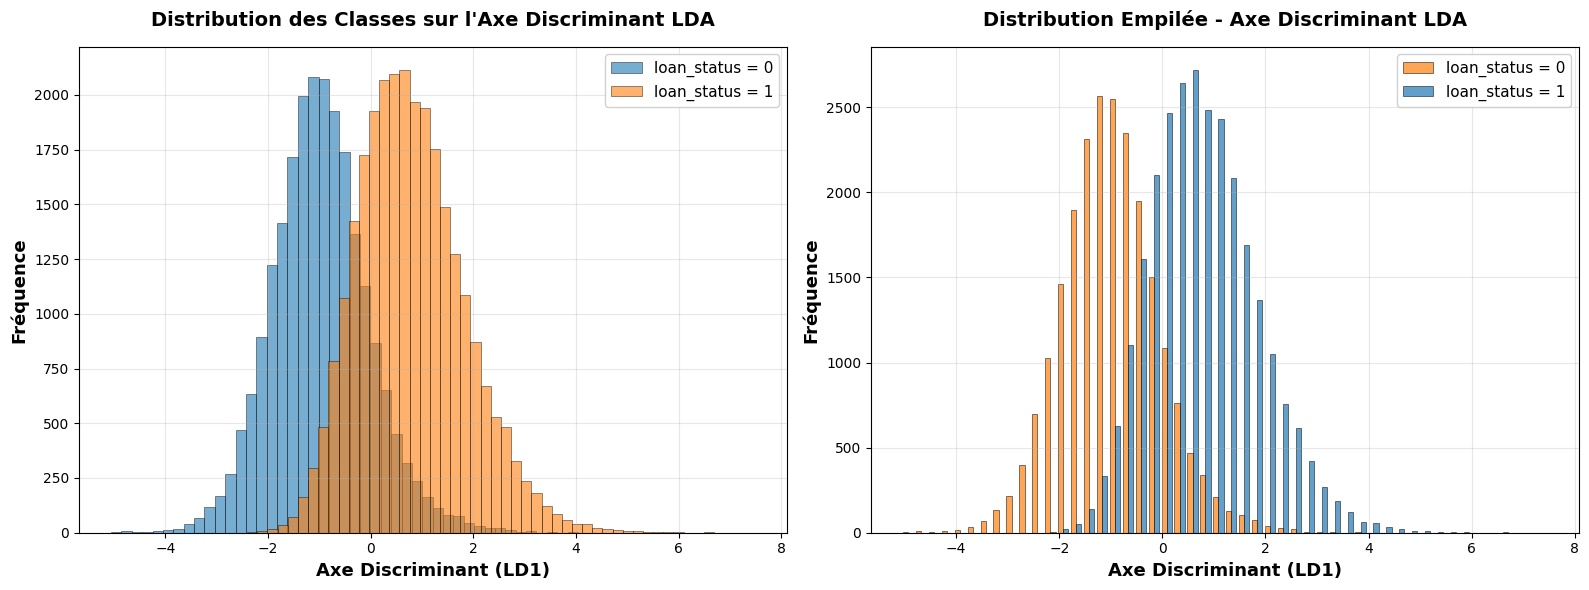


--- Statistiques de Séparation ---

loan_status = 0:
  Moyenne: -0.9754
  Médiane: -1.0060
  Écart-type: 0.9454
  Min: -5.0563, Max: 5.0480

loan_status = 1:
  Moyenne: 0.7966
  Médiane: 0.7046
  Écart-type: 1.0425
  Min: -2.4058, Max: 7.4804

 Distance entre les moyennes des classes: 1.7720
   (Plus la distance est grande, meilleure est la séparation)

 VISUALISATION COMPLÉTÉE


In [14]:
# ========== ÉTAPE A3: VISUALISATION DE LA SÉPARATION LDA ==========

print("=" * 70)
print("ÉTAPE A3: VISUALISATION DE LA SÉPARATION DES CLASSES")
print("=" * 70)

# Créer figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Histogramme avec chevauchement ---
ax1 = axes[0]
for status in [0, 1]:
    subset = lda_df[lda_df['loan_status'] == status]['LD1']
    ax1.hist(subset, bins=50, alpha=0.6, label=f'loan_status = {status}', 
             edgecolor='black', linewidth=0.5)

ax1.set_xlabel('Axe Discriminant (LD1)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Fréquence', fontsize=13, fontweight='bold')
ax1.set_title('Distribution des Classes sur l\'Axe Discriminant LDA', 
              fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3)

# --- Histogramme empilé pour mieux voir la séparation ---
ax2 = axes[1]
class_0 = lda_df[lda_df['loan_status'] == 0]['LD1']
class_1 = lda_df[lda_df['loan_status'] == 1]['LD1']

ax2.hist([class_0, class_1], bins=50, label=['loan_status = 0', 'loan_status = 1'],
         color=['#ff7f0e', '#1f77b4'], alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Axe Discriminant (LD1)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Fréquence', fontsize=13, fontweight='bold')
ax2.set_title('Distribution Empilée - Axe Discriminant LDA', 
              fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, framealpha=0.9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "lda_separation.png"), dpi=150, bbox_inches='tight')
plt.show()

# Statistiques de séparation
print("\n--- Statistiques de Séparation ---")
for status in [0, 1]:
    subset = lda_df[lda_df['loan_status'] == status]['LD1']
    print(f"\nloan_status = {status}:")
    print(f"  Moyenne: {subset.mean():.4f}")
    print(f"  Médiane: {subset.median():.4f}")
    print(f"  Écart-type: {subset.std():.4f}")
    print(f"  Min: {subset.min():.4f}, Max: {subset.max():.4f}")

# Calculer la distance entre les moyennes (effet de séparation)
mean_0 = lda_df[lda_df['loan_status'] == 0]['LD1'].mean()
mean_1 = lda_df[lda_df['loan_status'] == 1]['LD1'].mean()
distance = abs(mean_1 - mean_0)

print(f"\n Distance entre les moyennes des classes: {distance:.4f}")
print(f"   (Plus la distance est grande, meilleure est la séparation)")

print("\n" + "=" * 70)
print(" VISUALISATION COMPLÉTÉE")
print("=" * 70)

## A4. Analyse des Poids/Coefficients Discriminants

Les coefficients LDA révèlent **quelles variables contribuent le plus** à la séparation des classes.

ÉTAPE A4: ANALYSE DES COEFFICIENTS LDA

--- TOP 20 FEATURES DISCRIMINANTES ---
                         Feature  Coefficient  Abs_Coefficient
                   interest_rate    -3.329673         3.329673
       product_type__Credit Card     2.512256         2.512256
    product_type__Line of Credit    -2.178663         2.178663
                   annual_income     1.481703         1.481703
                    current_debt    -1.340090         1.340090
 loan_intent__Debt Consolidation    -1.297928         1.297928
     product_type__Personal Loan    -1.174270         1.174270
          loan_intent__Education     0.967710         0.967710
                    credit_score     0.770815         0.770815
           loan_intent__Business    -0.739276         0.739276
                     loan_amount    -0.718877         0.718877
            credit_history_years     0.690942         0.690942
           loan_intent__Personal     0.463518         0.463518
                  years_employed     0.

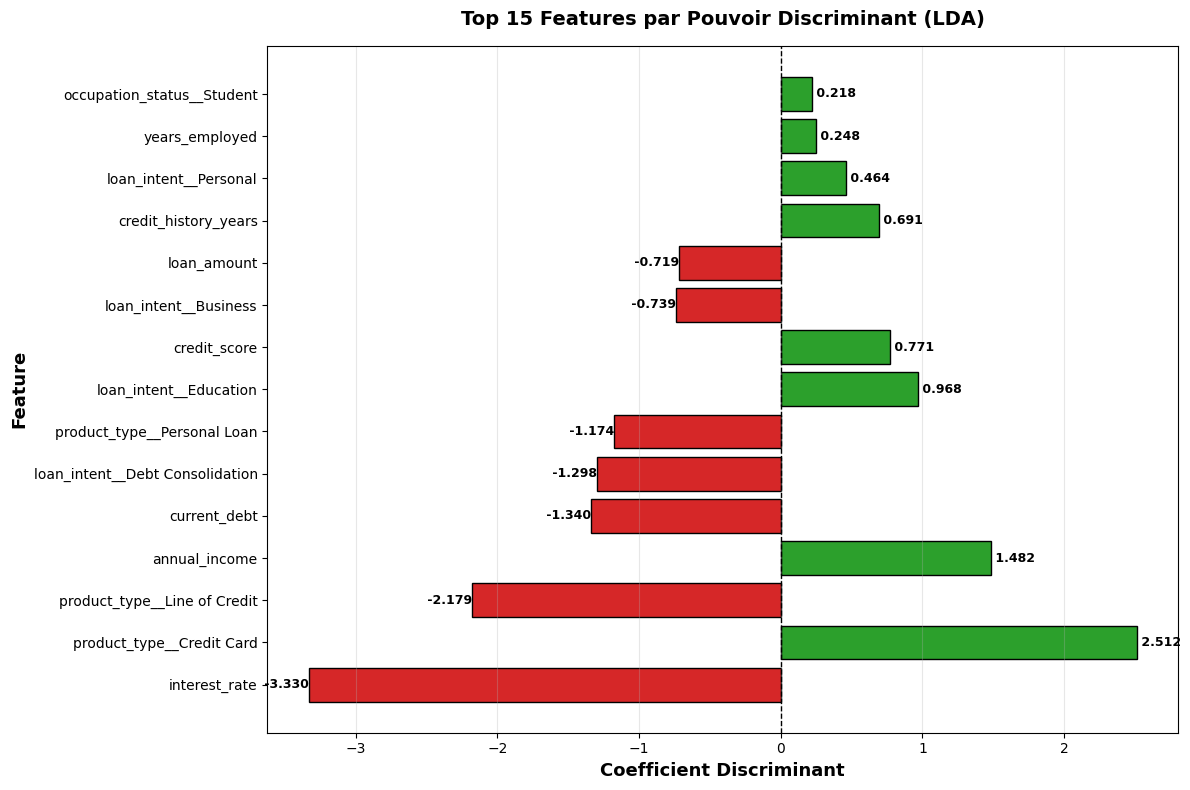


--- STATISTIQUES DES COEFFICIENTS ---
Coefficient max (absolu): 3.3297
Coefficient min (absolu): 0.0068
Moyenne (absolu): 0.8862
Médiane (absolu): 0.7189


In [15]:
# ========== ÉTAPE A4: ANALYSE DES COEFFICIENTS DISCRIMINANTS ==========

print("=" * 70)
print("ÉTAPE A4: ANALYSE DES COEFFICIENTS LDA")
print("=" * 70)

# Extraire les coefficients (poids) de la LDA
coefficients = lda.coef_[0]  # Shape: (n_features,)

# Créer DataFrame avec les coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Trier par valeur absolue (pouvoir discriminant)
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\n--- TOP 20 FEATURES DISCRIMINANTES ---")
print(coef_df.head(20).to_string(index=False))

# Sauvegarder tous les coefficients
coef_df.to_csv(os.path.join(OUTPUT_DIR, "lda_coefficients.csv"), index=False)
print(f"\n Tous les coefficients sauvegardés: {OUTPUT_DIR}/lda_coefficients.csv")

# Visualisation des top features
top_n = 15
top_features = coef_df.head(top_n)

plt.figure(figsize=(12, 8))
colors = ['#d62728' if c < 0 else '#2ca02c' for c in top_features['Coefficient']]
bars = plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, edgecolor='black')

plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)
plt.xlabel('Coefficient Discriminant', fontsize=13, fontweight='bold')
plt.ylabel('Feature', fontsize=13, fontweight='bold')
plt.title(f'Top {top_n} Features par Pouvoir Discriminant (LDA)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs sur les barres
for i, (idx, row) in enumerate(top_features.iterrows()):
    val = row['Coefficient']
    plt.text(val, i, f' {val:.3f}', va='center', 
             ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "lda_top_coefficients.png"), dpi=150, bbox_inches='tight')
plt.show()

# Statistiques des coefficients
print("\n--- STATISTIQUES DES COEFFICIENTS ---")
print(f"Coefficient max (absolu): {coef_df['Abs_Coefficient'].max():.4f}")
print(f"Coefficient min (absolu): {coef_df['Abs_Coefficient'].min():.4f}")
print(f"Moyenne (absolu): {coef_df['Abs_Coefficient'].mean():.4f}")
print(f"Médiane (absolu): {coef_df['Abs_Coefficient'].median():.4f}")

---

# ÉTAPE B: FEATURE ENGINEERING (INGÉNIERIE DE CARACTÉRISTIQUES)

Création de **ratios financiers** pour transformer les montants bruts en métriques de risque relatives.

## B1. Création du Ratio Dette/Revenu

ÉTAPE B1: FEATURE ENGINEERING - RATIO DETTE/REVENU

Création du ratio dette/revenu...
 Ratio dette/revenu créé

Statistiques du ratio dette/revenu:
count    50000.000000
mean         0.285724
std          0.159786
min          0.001986
25%          0.160623
50%          0.264821
75%          0.388613
max          0.800000
Name: ratio_dette_revenu, dtype: float64

Valeurs infinies: 0
Valeurs NaN: 0


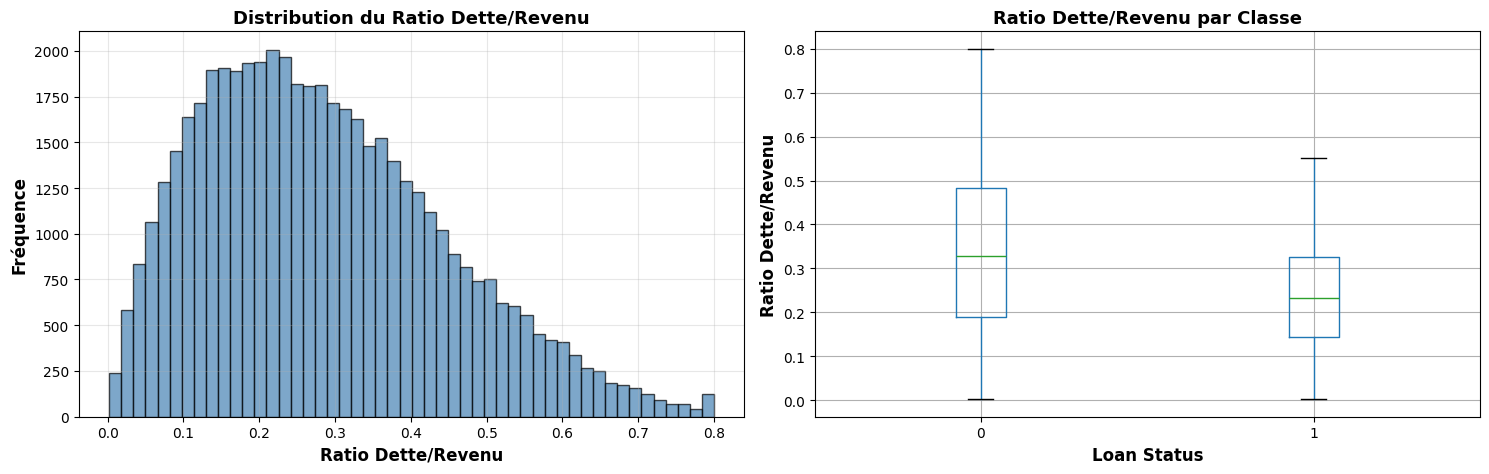


 RATIO DETTE/REVENU CRÉÉ AVEC SUCCÈS


In [16]:
# ========== ÉTAPE B1: CRÉATION DU RATIO DETTE/REVENU ==========

print("=" * 70)
print("ÉTAPE B1: FEATURE ENGINEERING - RATIO DETTE/REVENU")
print("=" * 70)

# Charger les données originales pour créer les nouveaux ratios
df_features = df.copy()

# B1: Ratio Dette/Revenu = current_debt / annual_income
# Gestion des divisions par zéro
print("\nCréation du ratio dette/revenu...")
df_features['ratio_dette_revenu'] = np.where(
    df_features['annual_income'] > 0,
    df_features['current_debt'] / df_features['annual_income'],
    0  # Si revenu = 0, ratio = 0
)

print(f" Ratio dette/revenu créé")
print(f"\nStatistiques du ratio dette/revenu:")
print(df_features['ratio_dette_revenu'].describe())

# Vérifier les valeurs infinies ou NaN
n_inf = np.isinf(df_features['ratio_dette_revenu']).sum()
n_nan = df_features['ratio_dette_revenu'].isna().sum()
print(f"\nValeurs infinies: {n_inf}")
print(f"Valeurs NaN: {n_nan}")

# Visualisation de la distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme
ax1 = axes[0]
ax1.hist(df_features['ratio_dette_revenu'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Ratio Dette/Revenu', fontsize=12, fontweight='bold')
ax1.set_ylabel('Fréquence', fontsize=12, fontweight='bold')
ax1.set_title('Distribution du Ratio Dette/Revenu', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Boxplot par classe
ax2 = axes[1]
df_features.boxplot(column='ratio_dette_revenu', by='loan_status', ax=ax2)
ax2.set_xlabel('Loan Status', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ratio Dette/Revenu', fontsize=12, fontweight='bold')
ax2.set_title('Ratio Dette/Revenu par Classe', fontsize=13, fontweight='bold')
plt.suptitle('')  # Supprimer le titre automatique

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "ratio_dette_revenu.png"), dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print(" RATIO DETTE/REVENU CRÉÉ AVEC SUCCÈS")
print("=" * 70)

## B2. Création du Ratio Prêt/Actifs

ÉTAPE B2: FEATURE ENGINEERING - RATIO PRÊT/ACTIFS

Création du ratio prêt/actifs...
 Ratio prêt/actifs créé

Statistiques du ratio prêt/actifs:
count     50000.000000
mean        393.316793
std        2035.856544
min           0.000000
25%           9.068118
50%          38.019052
75%         164.005291
max      100000.000000
Name: ratio_pret_actifs, dtype: float64

Valeurs infinies: 0
Valeurs NaN: 0

Valeur du 99ème percentile: 6500.00
Nombre de valeurs au-dessus: 496


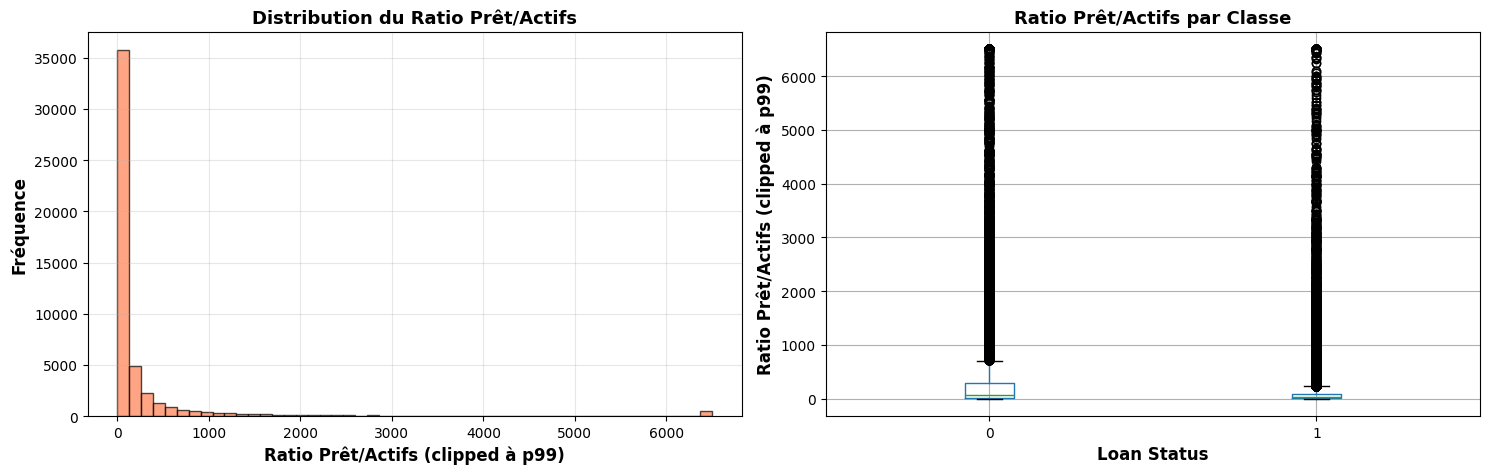


 RATIO PRÊT/ACTIFS CRÉÉ AVEC SUCCÈS


In [17]:
# ========== ÉTAPE B2: CRÉATION DU RATIO PRÊT/ACTIFS ==========

print("=" * 70)
print("ÉTAPE B2: FEATURE ENGINEERING - RATIO PRÊT/ACTIFS")
print("=" * 70)

# B2: Ratio Prêt/Actifs = loan_amount / savings_assets
# Gestion des divisions par zéro
print("\nCréation du ratio prêt/actifs...")
df_features['ratio_pret_actifs'] = np.where(
    df_features['savings_assets'] > 0,
    df_features['loan_amount'] / df_features['savings_assets'],
    0  # Si actifs = 0, ratio = 0 (ou on pourrait utiliser np.inf selon le cas)
)

print(f" Ratio prêt/actifs créé")
print(f"\nStatistiques du ratio prêt/actifs:")
print(df_features['ratio_pret_actifs'].describe())

# Vérifier les valeurs infinies ou NaN
n_inf = np.isinf(df_features['ratio_pret_actifs']).sum()
n_nan = df_features['ratio_pret_actifs'].isna().sum()
print(f"\nValeurs infinies: {n_inf}")
print(f"Valeurs NaN: {n_nan}")

# Gestion des outliers extrêmes pour la visualisation
# On va clipper les valeurs au 99ème percentile pour mieux voir
p99 = df_features['ratio_pret_actifs'].quantile(0.99)
df_features['ratio_pret_actifs_clipped'] = df_features['ratio_pret_actifs'].clip(upper=p99)

print(f"\nValeur du 99ème percentile: {p99:.2f}")
print(f"Nombre de valeurs au-dessus: {(df_features['ratio_pret_actifs'] > p99).sum()}")

# Visualisation de la distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme (avec clipping pour meilleure visualisation)
ax1 = axes[0]
ax1.hist(df_features['ratio_pret_actifs_clipped'], bins=50, edgecolor='black', alpha=0.7, color='coral')
ax1.set_xlabel('Ratio Prêt/Actifs (clipped à p99)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Fréquence', fontsize=12, fontweight='bold')
ax1.set_title('Distribution du Ratio Prêt/Actifs', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Boxplot par classe (avec clipping)
ax2 = axes[1]
df_features.boxplot(column='ratio_pret_actifs_clipped', by='loan_status', ax=ax2)
ax2.set_xlabel('Loan Status', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ratio Prêt/Actifs (clipped à p99)', fontsize=12, fontweight='bold')
ax2.set_title('Ratio Prêt/Actifs par Classe', fontsize=13, fontweight='bold')
plt.suptitle('')  # Supprimer le titre automatique

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "ratio_pret_actifs.png"), dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print(" RATIO PRÊT/ACTIFS CRÉÉ AVEC SUCCÈS")
print("=" * 70)

## B3. Visualisation Croisée des Nouveaux Ratios

Analyse de la séparation des classes dans l'espace 2D des ratios créés.

## B4. Création de Features d'Interaction

Exploration de patterns cachés par création de features d'interaction entre variables clés.

ETAPE B4: FEATURE ENGINEERING - FEATURES D'INTERACTION

Creation de features d'interaction...
Features d'interaction creees:
  - income_credit_interaction
  - debt_interest_interaction
  - loan_interest_interaction
  - income_history_interaction
  - savings_credit_interaction
  - age_employed_interaction
  - risk_adjusted_loan
  - credit_debt_ratio

--- CORRELATIONS AVEC LOAN_STATUS ---
  income_credit_interaction          : +0.2196
  debt_interest_interaction          : -0.1311
  loan_interest_interaction          : -0.0911
  income_history_interaction         : +0.2484
  savings_credit_interaction         : +0.1028
  age_employed_interaction           : +0.2196
  risk_adjusted_loan                 : -0.1855
  credit_debt_ratio                  : +0.0437

--- TOP 5 FEATURES D'INTERACTION (par correlation) ---
  income_history_interaction         : +0.2484 (Impact POSITIF MOYEN)
  income_credit_interaction          : +0.2196 (Impact POSITIF MOYEN)
  age_employed_interaction           :

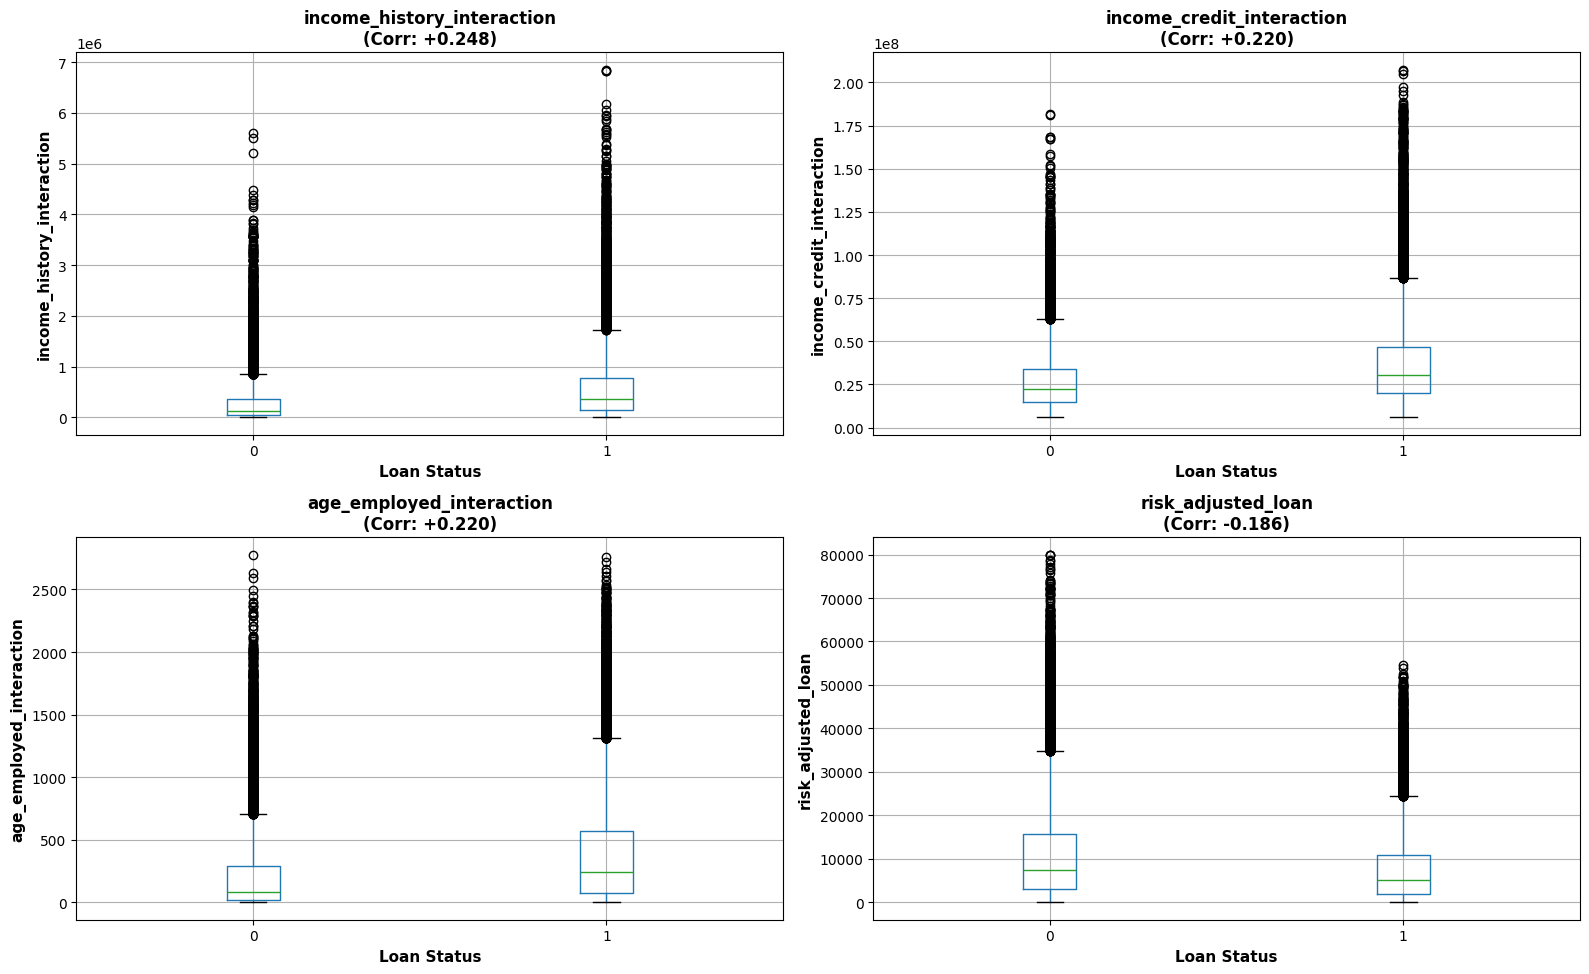

In [18]:
# ========== ETAPE B4: CREATION DE FEATURES D'INTERACTION ==========

print("=" * 70)
print("ETAPE B4: FEATURE ENGINEERING - FEATURES D'INTERACTION")
print("=" * 70)

# Créer des features d'interaction basées sur les insights LDA
print("\nCreation de features d'interaction...")

# 1. Income x Credit Score (capacité financière globale)
df_features['income_credit_interaction'] = df_features['annual_income'] * df_features['credit_score']

# 2. Debt x Interest Rate (coût total du crédit)
df_features['debt_interest_interaction'] = df_features['current_debt'] * df_features['interest_rate']

# 3. Loan Amount x Interest Rate (coût du prêt)
df_features['loan_interest_interaction'] = df_features['loan_amount'] * df_features['interest_rate']

# 4. Income x Credit History (stabilité financière)
df_features['income_history_interaction'] = df_features['annual_income'] * df_features['credit_history_years']

# 5. Savings x Credit Score (solvabilité)
df_features['savings_credit_interaction'] = df_features['savings_assets'] * df_features['credit_score']

# 6. Age x Years Employed (expérience professionnelle)
df_features['age_employed_interaction'] = df_features['age'] * df_features['years_employed']

# 7. Ratio Debt to Income x Loan Amount (risque ajusté)
df_features['risk_adjusted_loan'] = df_features['ratio_dette_revenu'] * df_features['loan_amount']

# 8. Credit Score / Debt (capacité de remboursement)
df_features['credit_debt_ratio'] = np.where(
    df_features['current_debt'] > 0,
    df_features['credit_score'] / df_features['current_debt'],
    df_features['credit_score']  # Si pas de dette, utiliser le credit score
)

print("Features d'interaction creees:")
interaction_features = [
    'income_credit_interaction',
    'debt_interest_interaction', 
    'loan_interest_interaction',
    'income_history_interaction',
    'savings_credit_interaction',
    'age_employed_interaction',
    'risk_adjusted_loan',
    'credit_debt_ratio'
]

for feat in interaction_features:
    print(f"  - {feat}")

# Calculer les corrélations avec loan_status
print("\n--- CORRELATIONS AVEC LOAN_STATUS ---")
correlations = {}
for feat in interaction_features:
    if feat in df_features.columns:
        corr = df_features[feat].corr(df_features['loan_status'])
        correlations[feat] = corr
        print(f"  {feat:35s}: {corr:+.4f}")

# Trier par corrélation absolue
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("\n--- TOP 5 FEATURES D'INTERACTION (par correlation) ---")
for feat, corr in sorted_corr[:5]:
    impact = "POSITIF" if corr > 0 else "NEGATIF"
    strength = "FORT" if abs(corr) > 0.3 else "MOYEN" if abs(corr) > 0.1 else "FAIBLE"
    print(f"  {feat:35s}: {corr:+.4f} (Impact {impact} {strength})")

# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top 4 features d'interaction
top_features = [f for f, c in sorted_corr[:4]]

for idx, feat in enumerate(top_features):
    ax = axes[idx // 2, idx % 2]
    
    # Boxplot par classe
    df_features.boxplot(column=feat, by='loan_status', ax=ax)
    ax.set_xlabel('Loan Status', fontsize=11, fontweight='bold')
    ax.set_ylabel(feat, fontsize=11, fontweight='bold')
    ax.set_title(f'{feat}\n(Corr: {correlations[feat]:+.3f})', fontsize=12, fontweight='bold')
    plt.suptitle('')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "features_interaction.png"), dpi=150, bbox_inches='tight')
plt.show()


ÉTAPE B3: VISUALISATION CROISÉE DES NOUVEAUX RATIOS
 Données préparées pour visualisation: 50,000 lignes
  Clipping dette/revenu à: 0.71
  Clipping prêt/actifs à: 6500.00


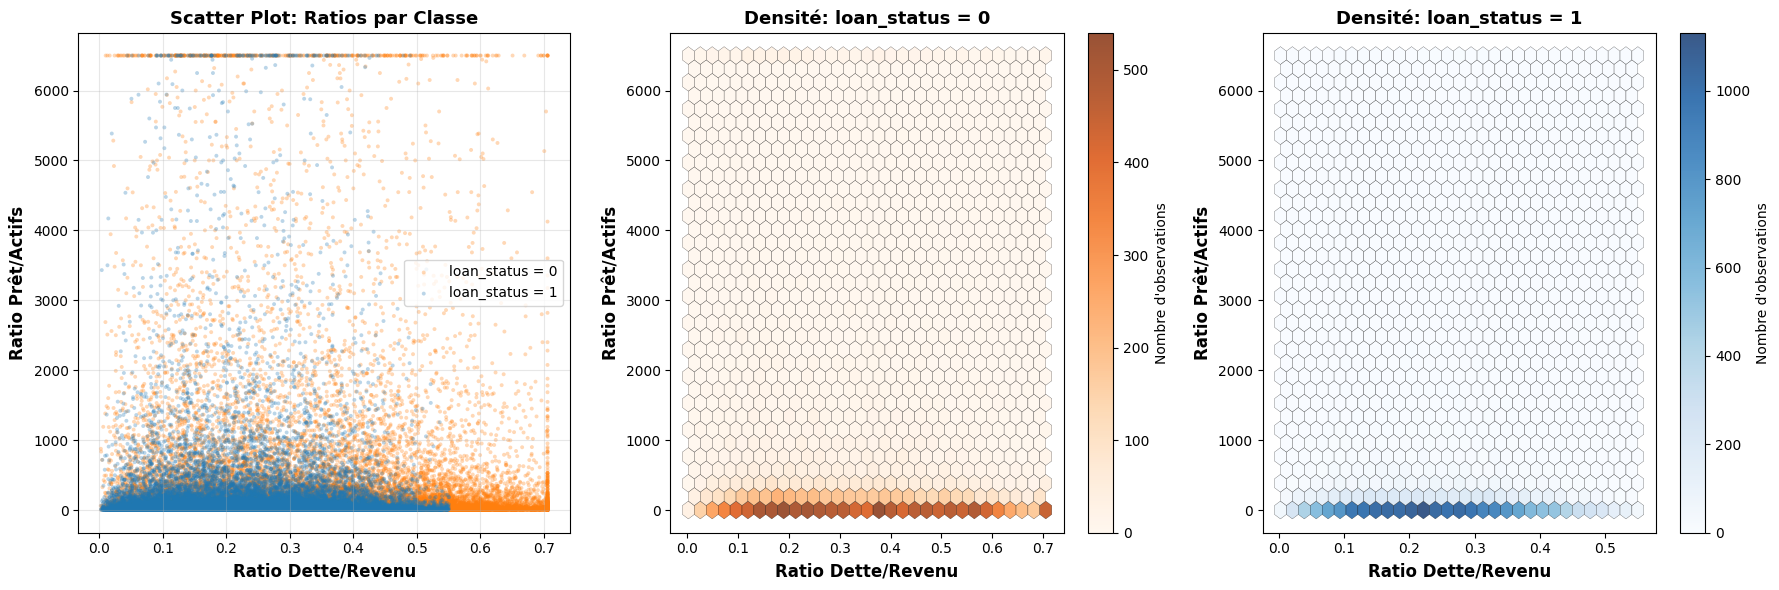


--- STATISTIQUES COMPARATIVES PAR CLASSE ---

loan_status = 0 (n=22,477):
  Ratio dette/revenu - moyenne: 0.3418, médiane: 0.3293
  Ratio prêt/actifs - moyenne: 615.8256, médiane: 69.4757

loan_status = 1 (n=27,523):
  Ratio dette/revenu - moyenne: 0.2399, médiane: 0.2323
  Ratio prêt/actifs - moyenne: 211.6022, médiane: 24.1542
Ratio dette/revenu vs loan_status: -0.3174
Ratio prêt/actifs vs loan_status: -0.0988


In [19]:
# ========== ÉTAPE B3: VISUALISATION CROISÉE DES RATIOS ==========

print("=" * 70)
print("ÉTAPE B3: VISUALISATION CROISÉE DES NOUVEAUX RATIOS")
print("=" * 70)

# Préparer les données pour la visualisation (supprimer les NaN)
df_viz = df_features[['ratio_dette_revenu', 'ratio_pret_actifs', 'loan_status']].copy()
df_viz = df_viz.dropna()

# Clipper les valeurs extrêmes pour meilleure visualisation
p99_dette = df_viz['ratio_dette_revenu'].quantile(0.99)
p99_pret = df_viz['ratio_pret_actifs'].quantile(0.99)

df_viz['ratio_dette_revenu_viz'] = df_viz['ratio_dette_revenu'].clip(upper=p99_dette)
df_viz['ratio_pret_actifs_viz'] = df_viz['ratio_pret_actifs'].clip(upper=p99_pret)

print(f" Données préparées pour visualisation: {df_viz.shape[0]:,} lignes")
print(f"  Clipping dette/revenu à: {p99_dette:.2f}")
print(f"  Clipping prêt/actifs à: {p99_pret:.2f}")

# Créer la figure avec plusieurs vues
fig = plt.figure(figsize=(18, 6))

# --- Vue 1: Scatter plot simple ---
ax1 = plt.subplot(1, 3, 1)
colors = ['#ff7f0e', '#1f77b4']
for status in [0, 1]:
    subset = df_viz[df_viz['loan_status'] == status]
    ax1.scatter(subset['ratio_dette_revenu_viz'], subset['ratio_pret_actifs_viz'],
               alpha=0.3, s=8, c=colors[status], label=f'loan_status = {status}',
               edgecolors='none')

ax1.set_xlabel('Ratio Dette/Revenu', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ratio Prêt/Actifs', fontsize=12, fontweight='bold')
ax1.set_title('Scatter Plot: Ratios par Classe', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# --- Vue 2: Density plot (hexbin) pour classe 0 ---
ax2 = plt.subplot(1, 3, 2)
subset_0 = df_viz[df_viz['loan_status'] == 0]
hexbin = ax2.hexbin(subset_0['ratio_dette_revenu_viz'], subset_0['ratio_pret_actifs_viz'],
                    gridsize=30, cmap='Oranges', alpha=0.8, edgecolors='black', linewidths=0.2)
ax2.set_xlabel('Ratio Dette/Revenu', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ratio Prêt/Actifs', fontsize=12, fontweight='bold')
ax2.set_title('Densité: loan_status = 0', fontsize=13, fontweight='bold')
plt.colorbar(hexbin, ax=ax2, label='Nombre d\'observations')

# --- Vue 3: Density plot (hexbin) pour classe 1 ---
ax3 = plt.subplot(1, 3, 3)
subset_1 = df_viz[df_viz['loan_status'] == 1]
hexbin = ax3.hexbin(subset_1['ratio_dette_revenu_viz'], subset_1['ratio_pret_actifs_viz'],
                    gridsize=30, cmap='Blues', alpha=0.8, edgecolors='black', linewidths=0.2)
ax3.set_xlabel('Ratio Dette/Revenu', fontsize=12, fontweight='bold')
ax3.set_ylabel('Ratio Prêt/Actifs', fontsize=12, fontweight='bold')
ax3.set_title('Densité: loan_status = 1', fontsize=13, fontweight='bold')
plt.colorbar(hexbin, ax=ax3, label='Nombre d\'observations')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "ratios_croises_separation.png"), dpi=150, bbox_inches='tight')
plt.show()

# Statistiques comparatives
print("\n--- STATISTIQUES COMPARATIVES PAR CLASSE ---")
for status in [0, 1]:
    subset = df_viz[df_viz['loan_status'] == status]
    print(f"\nloan_status = {status} (n={len(subset):,}):")
    print(f"  Ratio dette/revenu - moyenne: {subset['ratio_dette_revenu'].mean():.4f}, médiane: {subset['ratio_dette_revenu'].median():.4f}")
    print(f"  Ratio prêt/actifs - moyenne: {subset['ratio_pret_actifs'].mean():.4f}, médiane: {subset['ratio_pret_actifs'].median():.4f}")

# Corrélation des nouveaux ratios avec loan_status

corr_dette = df_viz['ratio_dette_revenu'].corr(df_viz['loan_status'])
corr_pret = df_viz['ratio_pret_actifs'].corr(df_viz['loan_status'])
print(f"Ratio dette/revenu vs loan_status: {corr_dette:.4f}")
print(f"Ratio prêt/actifs vs loan_status: {corr_pret:.4f}")


---

# ÉTAPE C: MODÉLISATION DE BASE (BASELINE MODEL)

Création d'un modèle de référence avec gestion du déséquilibre et évaluation rigoureuse.

## C1. Gestion du Déséquilibre avec SMOTE

---

# ETAPE C (VERSION AMELIOREE): MODELISATION AVANCEE

Approche améliorée avec:
- KNN Imputer pour gérer les valeurs manquantes (préservation des distributions)
- Features d'interaction incluses
- Pas de SMOTE (déséquilibre naturel conservé)
- class_weight='balanced' dans le modèle

## C1. Préparation des Données avec KNN Imputer

In [20]:
# ========== ÉTAPE C1: GESTION DU DÉSÉQUILIBRE AVEC SMOTE ==========

print("=" * 70)
print("ÉTAPE C1: PRÉPARATION DES DONNÉES + SMOTE")
print("=" * 70)

# Préparer le dataset complet avec les NOUVEAUX RATIOS
print("\nPréparation du dataset avec features originales + nouveaux ratios...")

# Features numériques originales
numeric_features = [
    "age", "years_employed", "annual_income", "credit_score", "credit_history_years",
    "savings_assets", "current_debt", "loan_amount", "interest_rate"
]

# Features catégorielles
cat_features = ["occupation_status", "product_type", "loan_intent"]

# Nouveaux ratios
new_ratios = ["ratio_dette_revenu", "ratio_pret_actifs"]

# Sélectionner les colonnes
cols_to_use = numeric_features + cat_features + new_ratios + ['loan_status']
df_c = df_features[cols_to_use].copy()

print(f" Dataset initial: {df_c.shape}")

# Supprimer les NaN
df_c = df_c.dropna()
print(f" Après suppression des NaN: {df_c.shape}")

# One-hot encoding des variables catégorielles
print("\nOne-hot encoding des variables catégorielles...")
df_c_encoded = pd.get_dummies(df_c, columns=cat_features, prefix_sep="__", drop_first=False)

# Séparer X et y
X = df_c_encoded.drop(columns=['loan_status'])
y = df_c_encoded['loan_status'].astype(int)

print(f" Features après encoding: {X.shape}")
print(f" Distribution de y: {y.value_counts().to_dict()}")

# Train/test split
print("\nTrain/test split (80/20, stratifié)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" y_train distribution: {y_train.value_counts().to_dict()}")
print(f" y_test distribution: {y_test.value_counts().to_dict()}")

# Standardisation
print("\nStandardisation des features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f" X_train_scaled: {X_train_scaled.shape}")
print(f" X_test_scaled: {X_test_scaled.shape}")

# Application de SMOTE sur le training set seulement
print("\nApplication de SMOTE pour rééquilibrer les classes...")
print(f"  Distribution AVANT SMOTE: {dict(zip(*np.unique(y_train, return_counts=True)))}")

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"  Distribution APRÈS SMOTE: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")
print(f" X_train_resampled: {X_train_resampled.shape}")
print(f" y_train_resampled: {y_train_resampled.shape}")

print("\n" + "=" * 70)
print(" DONNÉES PRÉPARÉES ET RÉÉQUILIBRÉES")
print("=" * 70)


ÉTAPE C1: PRÉPARATION DES DONNÉES + SMOTE

Préparation du dataset avec features originales + nouveaux ratios...
 Dataset initial: (50000, 15)
 Après suppression des NaN: (50000, 15)

One-hot encoding des variables catégorielles...
 Features après encoding: (50000, 23)
 Distribution de y: {1: 27523, 0: 22477}

Train/test split (80/20, stratifié)...
 X_train: (40000, 23)
 X_test: (10000, 23)
 y_train distribution: {1: 22018, 0: 17982}
 y_test distribution: {1: 5505, 0: 4495}

Standardisation des features...
 X_train_scaled: (40000, 23)
 X_test_scaled: (10000, 23)

Application de SMOTE pour rééquilibrer les classes...
  Distribution AVANT SMOTE: {np.int64(0): np.int64(17982), np.int64(1): np.int64(22018)}
  Distribution APRÈS SMOTE: {np.int64(0): np.int64(22018), np.int64(1): np.int64(22018)}
 X_train_resampled: (44036, 23)
 y_train_resampled: (44036,)

 DONNÉES PRÉPARÉES ET RÉÉQUILIBRÉES


## C2. Entraînement du Modèle de Référence (Régression Logistique)

In [21]:
# ========== ÉTAPE C2: ENTRAÎNEMENT DU MODÈLE DE RÉFÉRENCE ==========

print("=" * 70)
print("ÉTAPE C2: ENTRAÎNEMENT DU MODÈLE DE RÉFÉRENCE")
print("=" * 70)

# Initialiser le modèle de régression logistique
print("\nInitialisation de la Régression Logistique...")
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Augmenter pour assurer la convergence
    solver='lbfgs',  # Bon pour datasets moyens/grands
    class_weight='balanced'  # Poids équilibrés (alternative à SMOTE, on garde les deux)
)

# Entraîner sur les données SMOTE-résamplées
print("Entraînement du modèle sur les données SMOTE...")
log_reg.fit(X_train_resampled, y_train_resampled)

print(f" Modèle entraîné avec succès")

# Prédictions sur le jeu de test (ATTENTION: on teste sur les données NON-resamplées)
print("\nPrédictions sur le jeu de test...")
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilités classe 1

print(f" Prédictions complétées")


ÉTAPE C2: ENTRAÎNEMENT DU MODÈLE DE RÉFÉRENCE

Initialisation de la Régression Logistique...
Entraînement du modèle sur les données SMOTE...
 Modèle entraîné avec succès

Prédictions sur le jeu de test...
 Prédictions complétées


## C3. Évaluation avec Métriques Ciblées

Évaluation rigoureuse du modèle avec les métriques appropriées pour les classes déséquilibrées.

ETAPE C3: EVALUATION DU MODELE

METRIQUES DE PERFORMANCE

F1-SCORE: 0.8405
Precision: 0.8538
Rappel: 0.8276
Accuracy: 0.8271

RAPPORT DE CLASSIFICATION DETAILLE
                     precision    recall  f1-score   support

  Classe 0 (Refuse)       0.80      0.83      0.81      4495
Classe 1 (Approuve)       0.85      0.83      0.84      5505

           accuracy                           0.83     10000
          macro avg       0.83      0.83      0.83     10000
       weighted avg       0.83      0.83      0.83     10000

MATRICE DE CONFUSION

Matrice de confusion brute:
[[3715  780]
 [ 949 4556]]

Details:
  Vrais Negatifs (TN):   3715 - Refus correctement predits
  Faux Positifs (FP):     780 - Refus predits comme Approuves
  Faux Negatifs (FN):     949 - Approuves predits comme Refus
  Vrais Positifs (TP):   4556 - Approbations correctement predites


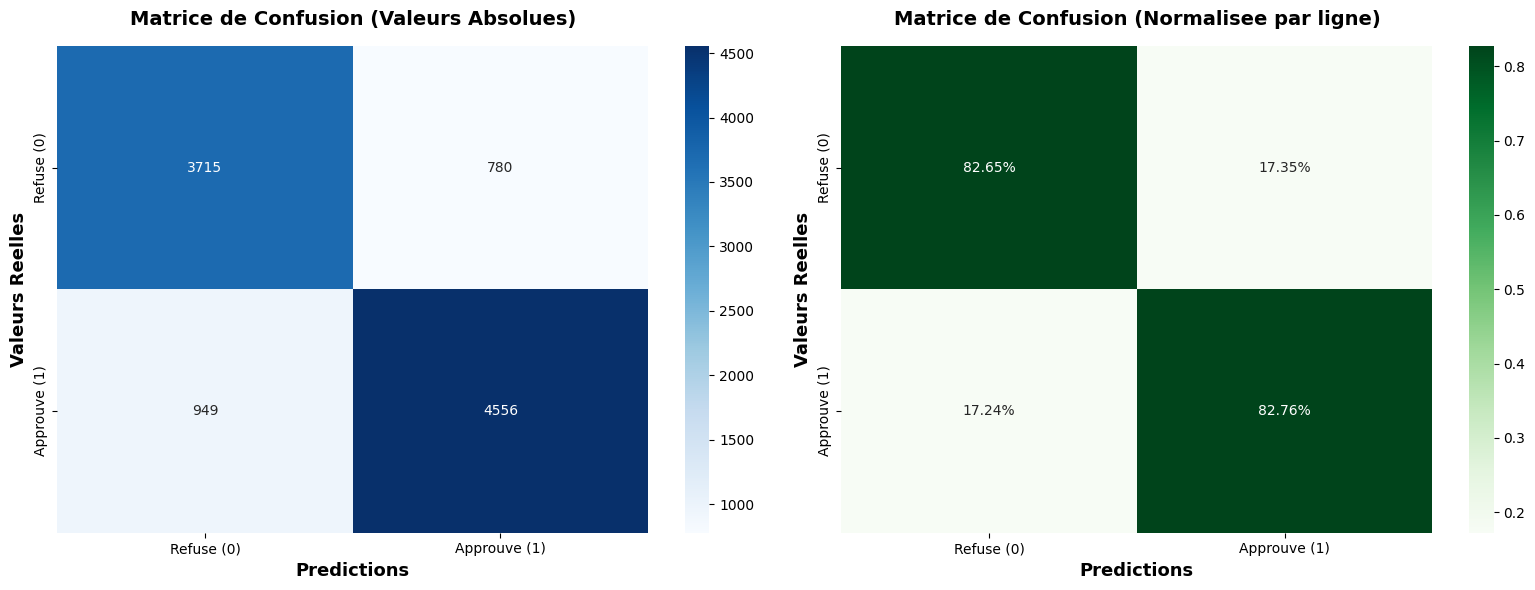


COURBE ROC

AUC (Area Under Curve): 0.9113


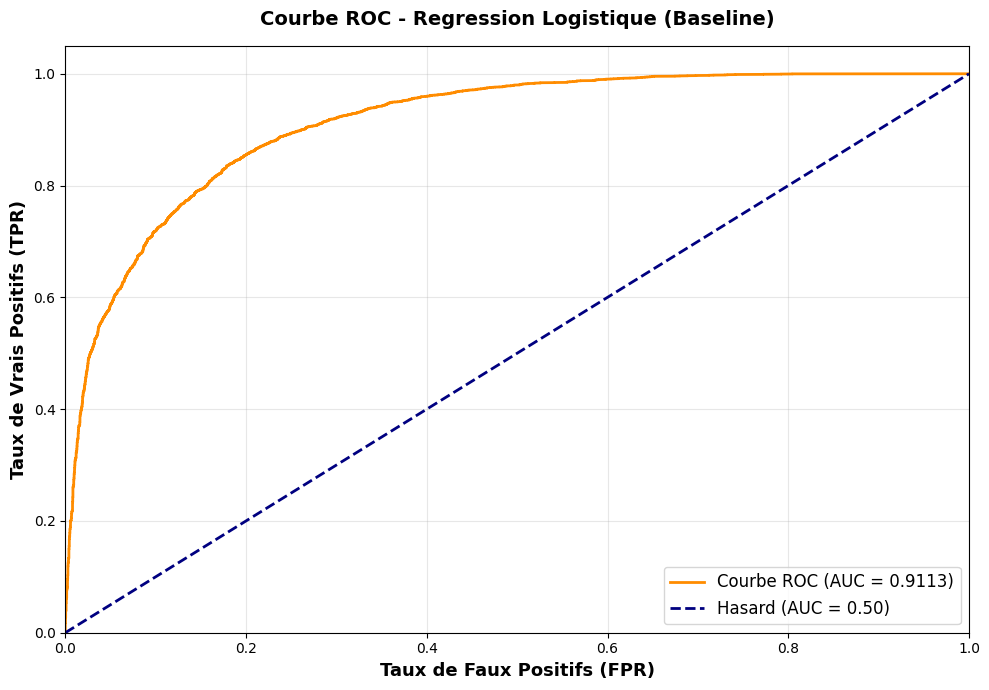


EVALUATION COMPLETEE

RESUME DES PERFORMANCES:
  F1-Score:   0.8405
  Precision:  0.8538
  Rappel:     0.8276
  Accuracy:   0.8271
  AUC-ROC:    0.9113


In [22]:
# ETAPE C3: EVALUATION AVEC METRIQUES CIBLEES

print("=" * 70)
print("ETAPE C3: EVALUATION DU MODELE")
print("=" * 70)

# METRIQUES PRINCIPALES
print("\n" + "=" * 70)
print("METRIQUES DE PERFORMANCE")
print("=" * 70)

# F1-Score (metrique principale pour classes desequilibrees)
f1 = f1_score(y_test, y_pred)
print(f"\nF1-SCORE: {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Rappel
recall = recall_score(y_test, y_pred)
print(f"Rappel: {recall:.4f}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# RAPPORT DE CLASSIFICATION DETAILLE
print("\n" + "=" * 70)
print("RAPPORT DE CLASSIFICATION DETAILLE")
print("=" * 70)
print(classification_report(y_test, y_pred, target_names=['Classe 0 (Refuse)', 'Classe 1 (Approuve)']))

# MATRICE DE CONFUSION
print("=" * 70)
print("MATRICE DE CONFUSION")
print("=" * 70)

cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion brute:")
print(cm)

# Interpretation
tn, fp, fn, tp = cm.ravel()
print(f"\nDetails:")
print(f"  Vrais Negatifs (TN):  {tn:5d} - Refus correctement predits")
print(f"  Faux Positifs (FP):   {fp:5d} - Refus predits comme Approuves")
print(f"  Faux Negatifs (FN):   {fn:5d} - Approuves predits comme Refus")
print(f"  Vrais Positifs (TP):  {tp:5d} - Approbations correctement predites")

# Visualisation de la matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matrice de confusion en valeurs absolues
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax1,
            xticklabels=['Refuse (0)', 'Approuve (1)'],
            yticklabels=['Refuse (0)', 'Approuve (1)'])
ax1.set_xlabel('Predictions', fontsize=13, fontweight='bold')
ax1.set_ylabel('Valeurs Reelles', fontsize=13, fontweight='bold')
ax1.set_title('Matrice de Confusion (Valeurs Absolues)', fontsize=14, fontweight='bold', pad=15)

# Matrice de confusion normalisee
ax2 = axes[1]
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', cbar=True, ax=ax2,
            xticklabels=['Refuse (0)', 'Approuve (1)'],
            yticklabels=['Refuse (0)', 'Approuve (1)'])
ax2.set_xlabel('Predictions', fontsize=13, fontweight='bold')
ax2.set_ylabel('Valeurs Reelles', fontsize=13, fontweight='bold')
ax2.set_title('Matrice de Confusion (Normalisee par ligne)', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_matrix_baseline.png"), dpi=150, bbox_inches='tight')
plt.show()

# COURBE ROC
print("\n" + "=" * 70)
print("COURBE ROC")
print("=" * 70)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"\nAUC (Area Under Curve): {roc_auc:.4f}")

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Hasard (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=13, fontweight='bold')
plt.title('Courbe ROC - Regression Logistique (Baseline)', fontsize=14, fontweight='bold', pad=15)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "roc_curve_baseline.png"), dpi=150, bbox_inches='tight')
plt.show()

# RESUME FINAL
print("\n" + "=" * 70)
print("EVALUATION COMPLETEE")
print("=" * 70)

print(f"\nRESUME DES PERFORMANCES:")
print(f"  F1-Score:   {f1:.4f}")
print(f"  Precision:  {precision:.4f}")
print(f"  Rappel:     {recall:.4f}")
print(f"  Accuracy:   {accuracy:.4f}")
print(f"  AUC-ROC:    {roc_auc:.4f}")

---

# ETAPE D: MODELISATION AMELIOREE

Nouvelle approche avec:
- KNN Imputer pour les valeurs manquantes
- Features d'interaction incluses  
- Pas de SMOTE (déséquilibre naturel + class_weight='balanced')

## D1. Préparation des Données avec KNN Imputer

In [23]:
# ========== ETAPE D1: PREPARATION AVEC KNN IMPUTER ==========

print("=" * 70)
print("ETAPE D1: PREPARATION DES DONNEES (VERSION AMELIOREE)")
print("=" * 70)

# Features numériques originales
numeric_features = [
    "age", "years_employed", "annual_income", "credit_score", "credit_history_years",
    "savings_assets", "current_debt", "loan_amount", "interest_rate"
]

# Nouveaux ratios
new_ratios = ["ratio_dette_revenu", "ratio_pret_actifs"]

# Features d'interaction
interaction_features = [
    'income_credit_interaction',
    'debt_interest_interaction', 
    'loan_interest_interaction',
    'income_history_interaction',
    'savings_credit_interaction',
    'age_employed_interaction',
    'risk_adjusted_loan',
    'credit_debt_ratio'
]

# Features catégorielles
cat_features = ["occupation_status", "product_type", "loan_intent"]

# Toutes les features numériques
all_numeric_features = numeric_features + new_ratios + interaction_features

# Sélectionner les colonnes
cols_to_use = all_numeric_features + cat_features + ['loan_status']
df_model_v2 = df_features[cols_to_use].copy()

print(f"\nDataset initial: {df_model_v2.shape}")
print(f"Features numeriques: {len(all_numeric_features)}")
print(f"Features categorielles: {len(cat_features)}")

# Analyser les valeurs manquantes AVANT imputation
print("\n--- ANALYSE DES VALEURS MANQUANTES ---")
missing_counts = df_model_v2[all_numeric_features].isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

if len(missing_cols) > 0:
    print("Colonnes avec valeurs manquantes:")
    for col, count in missing_cols.items():
        pct = count / len(df_model_v2) * 100
        print(f"  {col:30s}: {count:5d} ({pct:.2f}%)")
    
    # KNN IMPUTATION
    print(f"\n--- APPLICATION KNN IMPUTER (k=5) ---")
    knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
    
    df_model_v2[all_numeric_features] = knn_imputer.fit_transform(df_model_v2[all_numeric_features])
    
    print("KNN Imputer applique avec succes")
    print("  Methode: k=5 voisins avec ponderation par distance")
    print("  Avantage: Preserve les distributions et correlations")
    
    remaining_nan = df_model_v2[all_numeric_features].isnull().sum().sum()
    print(f"\nValeurs manquantes restantes: {remaining_nan}")
else:
    print("Aucune valeur manquante detectee")

# One-hot encoding
print("\n--- ONE-HOT ENCODING ---")
df_model_v2_encoded = pd.get_dummies(df_model_v2, columns=cat_features, prefix_sep="__", drop_first=False)
print(f"Dataset apres encoding: {df_model_v2_encoded.shape}")

# Séparer X et y
X_full_v2 = df_model_v2_encoded.drop(columns=['loan_status'])
y_full_v2 = df_model_v2_encoded['loan_status'].astype(int)

print(f"\nX shape: {X_full_v2.shape}")
print(f"y shape: {y_full_v2.shape}")

# Distribution
print(f"\n--- DISTRIBUTION DE LOAN_STATUS ---")
print(y_full_v2.value_counts())
print(f"\nProportions:")
print(y_full_v2.value_counts(normalize=True))

# Split Train/Test
print("\n--- SPLIT TRAIN/TEST (80/20) ---")
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_full_v2, y_full_v2, test_size=0.2, random_state=42, stratify=y_full_v2
)

print(f"Train set: {X_train_v2.shape}")
print(f"Test set:  {X_test_v2.shape}")

# Standardisation
print("\n--- STANDARDISATION ---")
scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train_v2)
X_test_v2_scaled = scaler_v2.transform(X_test_v2)

print("Standardisation completee")

print("\n" + "=" * 70)
print("DONNEES PRETES (PAS DE SMOTE - DESEQUILIBRE NATUREL CONSERVE)")
print("=" * 70)
print(f"\nTotal features: {X_train_v2_scaled.shape[1]}")
print(f"  - Features originales: {len(numeric_features)}")
print(f"  - Ratios: {len(new_ratios)}")
print(f"  - Interactions: {len(interaction_features)}")
print(f"  - Categorielles encodees: {X_train_v2_scaled.shape[1] - len(all_numeric_features)}")


ETAPE D1: PREPARATION DES DONNEES (VERSION AMELIOREE)

Dataset initial: (50000, 23)
Features numeriques: 19
Features categorielles: 3

--- ANALYSE DES VALEURS MANQUANTES ---
Aucune valeur manquante detectee

--- ONE-HOT ENCODING ---
Dataset apres encoding: (50000, 32)

X shape: (50000, 31)
y shape: (50000,)

--- DISTRIBUTION DE LOAN_STATUS ---
loan_status
1    27523
0    22477
Name: count, dtype: int64

Proportions:
loan_status
1    0.55046
0    0.44954
Name: proportion, dtype: float64

--- SPLIT TRAIN/TEST (80/20) ---
Train set: (40000, 31)
Test set:  (10000, 31)

--- STANDARDISATION ---
Standardisation completee

DONNEES PRETES (PAS DE SMOTE - DESEQUILIBRE NATUREL CONSERVE)

Total features: 31
  - Features originales: 9
  - Ratios: 2
  - Interactions: 8
  - Categorielles encodees: 12


## D2. Entraînement du Modèle Amélioré

In [24]:
# ========== ETAPE D2: ENTRAINEMENT DU MODELE AMELIORE ==========

print("=" * 70)
print("ETAPE D2: ENTRAINEMENT DU MODELE AMELIORE")
print("=" * 70)

# Régression Logistique avec class_weight='balanced'
print("\nInitialisation de la Regression Logistique...")
print("  Parametres:")
print("    - class_weight='balanced' (gestion du desequilibre)")
print("    - max_iter=1000")
print("    - solver='lbfgs'")

log_reg_v2 = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced'  # Pondération automatique selon les proportions
)

# Entraînement
print("\nEntrainement sur le jeu d'entrainement...")
log_reg_v2.fit(X_train_v2_scaled, y_train_v2)

print("Modele entraine avec succes")

# Prédictions
print("\nPredictions sur le jeu de test...")
y_pred_v2 = log_reg_v2.predict(X_test_v2_scaled)
y_pred_proba_v2 = log_reg_v2.predict_proba(X_test_v2_scaled)[:, 1]

print("Predictions completees")

print("\n" + "=" * 70)
print("MODELE ENTRAINE ET PREDICTIONS EFFECTUEES")
print("=" * 70)


ETAPE D2: ENTRAINEMENT DU MODELE AMELIORE

Initialisation de la Regression Logistique...
  Parametres:
    - class_weight='balanced' (gestion du desequilibre)
    - max_iter=1000
    - solver='lbfgs'

Entrainement sur le jeu d'entrainement...
Modele entraine avec succes

Predictions sur le jeu de test...
Predictions completees

MODELE ENTRAINE ET PREDICTIONS EFFECTUEES


## D3. Évaluation et Comparaison des Modèles

ETAPE D3: EVALUATION DU MODELE AMELIORE

--- METRIQUES DE PERFORMANCE (MODELE AMELIORE) ---
  F1-Score:   0.8480
  Precision:  0.8587
  Rappel:     0.8376
  Accuracy:   0.8347

--- RAPPORT DE CLASSIFICATION ---
                     precision    recall  f1-score   support

  Classe 0 (Refuse)       0.81      0.83      0.82      4495
Classe 1 (Approuve)       0.86      0.84      0.85      5505

           accuracy                           0.83     10000
          macro avg       0.83      0.83      0.83     10000
       weighted avg       0.84      0.83      0.83     10000


--- MATRICE DE CONFUSION ---
  Vrais Negatifs (TN):  3,736
  Faux Positifs (FP):     759
  Faux Negatifs (FN):     894
  Vrais Positifs (TP):  4,611

  AUC-ROC: 0.9158


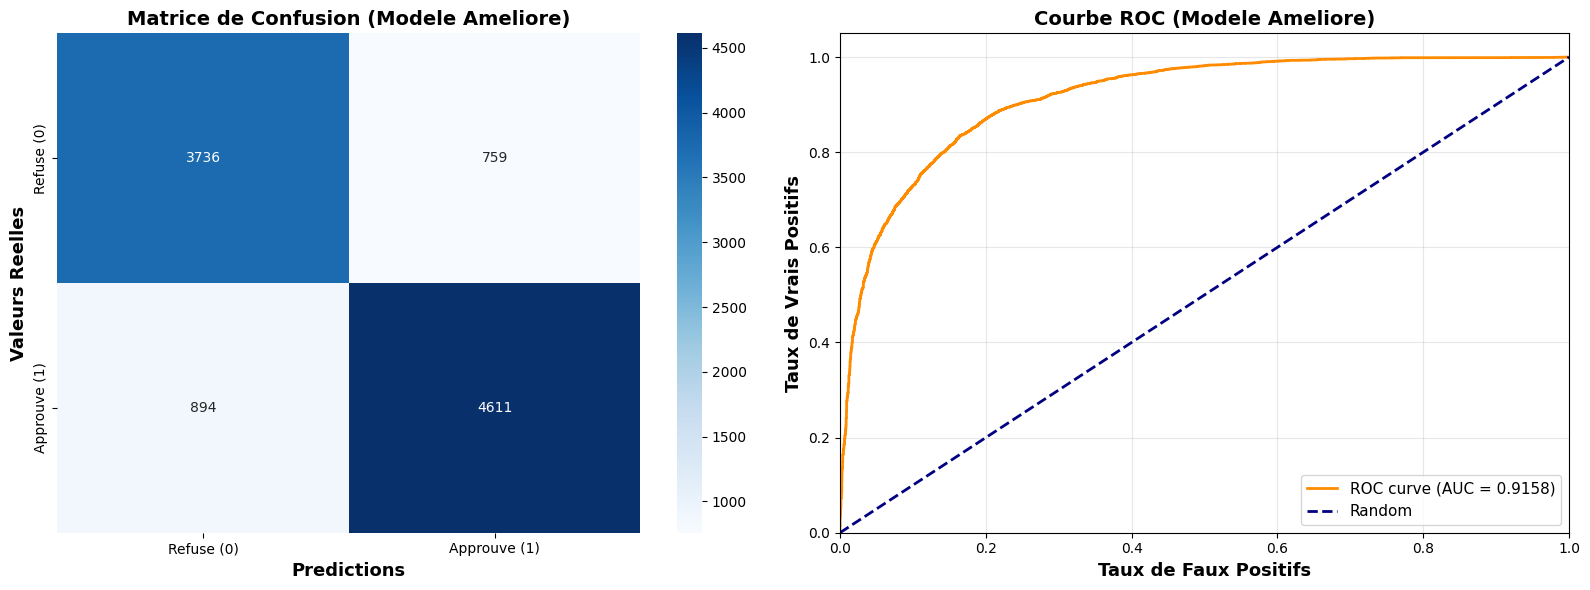


COMPARAISON: BASELINE vs MODELE AMELIORE

| Metrique      | Baseline (SMOTE) | Ameliore (KNN+Features) | Difference |
|--------------|------------------|-------------------------|------------|
| F1-Score      |           0.8405 |                  0.8480 |    +0.0075 |
| Precision     |           0.8538 |                  0.8587 |    +0.0049 |
| Rappel        |           0.8276 |                  0.8376 |    +0.0100 |
| Accuracy      |           0.8271 |                  0.8347 |    +0.0076 |

--- ANALYSE ---
  AMELIORATION de 0.75% du F1-Score
  -> Les features d'interaction et KNN Imputer apportent de la valeur

EVALUATION TERMINEE


In [25]:
# ========== ETAPE D3: EVALUATION ET COMPARAISON ==========

print("=" * 70)
print("ETAPE D3: EVALUATION DU MODELE AMELIORE")
print("=" * 70)

# Métriques
f1_v2 = f1_score(y_test_v2, y_pred_v2)
precision_v2 = precision_score(y_test_v2, y_pred_v2)
recall_v2 = recall_score(y_test_v2, y_pred_v2)
accuracy_v2 = accuracy_score(y_test_v2, y_pred_v2)

print("\n--- METRIQUES DE PERFORMANCE (MODELE AMELIORE) ---")
print(f"  F1-Score:   {f1_v2:.4f}")
print(f"  Precision:  {precision_v2:.4f}")
print(f"  Rappel:     {recall_v2:.4f}")
print(f"  Accuracy:   {accuracy_v2:.4f}")

# Rapport de classification
print("\n--- RAPPORT DE CLASSIFICATION ---")
print(classification_report(y_test_v2, y_pred_v2, 
                          target_names=['Classe 0 (Refuse)', 'Classe 1 (Approuve)']))

# Matrice de confusion
cm_v2 = confusion_matrix(y_test_v2, y_pred_v2)
tn_v2, fp_v2, fn_v2, tp_v2 = cm_v2.ravel()

print("\n--- MATRICE DE CONFUSION ---")
print(f"  Vrais Negatifs (TN):  {tn_v2:5,}")
print(f"  Faux Positifs (FP):   {fp_v2:5,}")
print(f"  Faux Negatifs (FN):   {fn_v2:5,}")
print(f"  Vrais Positifs (TP):  {tp_v2:5,}")

# Courbe ROC
fpr_v2, tpr_v2, _ = roc_curve(y_test_v2, y_pred_proba_v2)
auc_v2 = auc(fpr_v2, tpr_v2)

print(f"\n  AUC-ROC: {auc_v2:.4f}")

# Visualisation matrice de confusion + courbe ROC
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matrice de confusion
ax1 = axes[0]
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax1,
            xticklabels=['Refuse (0)', 'Approuve (1)'],
            yticklabels=['Refuse (0)', 'Approuve (1)'])
ax1.set_xlabel('Predictions', fontsize=13, fontweight='bold')
ax1.set_ylabel('Valeurs Reelles', fontsize=13, fontweight='bold')
ax1.set_title('Matrice de Confusion (Modele Ameliore)', fontsize=14, fontweight='bold')

# Courbe ROC
ax2 = axes[1]
ax2.plot(fpr_v2, tpr_v2, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_v2:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taux de Faux Positifs', fontsize=13, fontweight='bold')
ax2.set_ylabel('Taux de Vrais Positifs', fontsize=13, fontweight='bold')
ax2.set_title('Courbe ROC (Modele Ameliore)', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right", fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "model_v2_evaluation.png"), dpi=150, bbox_inches='tight')
plt.show()

# COMPARAISON AVEC LE MODELE BASELINE (C1, C2, C3)
print("\n" + "=" * 70)
print("COMPARAISON: BASELINE vs MODELE AMELIORE")
print("=" * 70)

# Métriques baseline (depuis C3)
f1_baseline = 0.8405
precision_baseline = 0.8538
recall_baseline = 0.8276
accuracy_baseline = 0.8271

print("\n| Metrique      | Baseline (SMOTE) | Ameliore (KNN+Features) | Difference |")
print("|" + "-"*14 + "|" + "-"*18 + "|" + "-"*25 + "|" + "-"*12 + "|")
print(f"| F1-Score      | {f1_baseline:16.4f} | {f1_v2:23.4f} | {f1_v2 - f1_baseline:+10.4f} |")
print(f"| Precision     | {precision_baseline:16.4f} | {precision_v2:23.4f} | {precision_v2 - precision_baseline:+10.4f} |")
print(f"| Rappel        | {recall_baseline:16.4f} | {recall_v2:23.4f} | {recall_v2 - recall_baseline:+10.4f} |")
print(f"| Accuracy      | {accuracy_baseline:16.4f} | {accuracy_v2:23.4f} | {accuracy_v2 - accuracy_baseline:+10.4f} |")

# Analyse
print("\n--- ANALYSE ---")
if f1_v2 > f1_baseline:
    print(f"  AMELIORATION de {(f1_v2 - f1_baseline)*100:.2f}% du F1-Score")
    print("  -> Les features d'interaction et KNN Imputer apportent de la valeur")
elif f1_v2 < f1_baseline:
    print(f"  DEGRADATION de {(f1_baseline - f1_v2)*100:.2f}% du F1-Score")
    print("  -> SMOTE etait plus efficace que class_weight='balanced'")
else:
    print("  Performances EQUIVALENTES")

print("\n" + "=" * 70)
print("EVALUATION TERMINEE")
print("=" * 70)

---

# ETAPE E: MODELISATION COMPARATIVE AVEC VALIDATION CROISEE

Comparaison systématique de 4 approches:
1. **Baseline + SMOTE** (C2/C3) - features originales
2. **Amélioré KNN + Features SANS SMOTE** (D2/D3)
3. **Baseline SANS SMOTE** (nouvelle)
4. **Amélioré KNN + Features + SMOTE** (nouvelle)

Toutes avec validation croisée Stratified K-Fold (k=5).

## E1. Baseline SANS SMOTE (class_weight='balanced')

In [26]:
# ========== E1: BASELINE SANS SMOTE (class_weight='balanced') ==========

print("=" * 70)
print("E1: BASELINE SANS SMOTE (FEATURES ORIGINALES)")
print("=" * 70)

# Utiliser les données de C1 (features originales sans features d'interaction)
# Recréer le dataset baseline
numeric_features_base = [
    "age", "years_employed", "annual_income", "credit_score", "credit_history_years",
    "savings_assets", "current_debt", "loan_amount", "interest_rate"
]
cat_features_base = ["occupation_status", "product_type", "loan_intent"]

cols_baseline = numeric_features_base + cat_features_base + ['loan_status']
df_baseline = df_features[cols_baseline].copy()

# Supprimer NaN (pour comparaison équitable avec C1)
df_baseline = df_baseline.dropna()

# One-hot encoding
df_baseline_encoded = pd.get_dummies(df_baseline, columns=cat_features_base, prefix_sep="__", drop_first=False)

X_baseline = df_baseline_encoded.drop(columns=['loan_status'])
y_baseline = df_baseline_encoded['loan_status'].astype(int)

# Standardisation
scaler_baseline = StandardScaler()
X_baseline_scaled = scaler_baseline.fit_transform(X_baseline)

print(f"Dataset: {X_baseline_scaled.shape}")
print(f"Distribution: {y_baseline.value_counts(normalize=True).to_dict()}")

# Modèle avec class_weight='balanced' (SANS SMOTE)
model_e1 = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced'
)

# Validation croisée Stratified K-Fold (k=5)
print("\n--- VALIDATION CROISEE (Stratified 5-Fold) ---")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_e1 = cross_validate(model_e1, X_baseline_scaled, y_baseline, 
                                cv=skf, scoring=scoring, n_jobs=-1)

print("\nResultats Cross-Validation:")
print(f"  Accuracy: {cv_results_e1['test_accuracy'].mean():.4f} (+/- {cv_results_e1['test_accuracy'].std():.4f})")
print(f"  Precision:{cv_results_e1['test_precision'].mean():.4f} (+/- {cv_results_e1['test_precision'].std():.4f})")
print(f"  Recall: {cv_results_e1['test_recall'].mean():.4f} (+/- {cv_results_e1['test_recall'].std():.4f})")
print(f"  F1-Score:  {cv_results_e1['test_f1'].mean():.4f} (+/- {cv_results_e1['test_f1'].std():.4f})")
print(f"  ROC-AUC:   {cv_results_e1['test_roc_auc'].mean():.4f} (+/- {cv_results_e1['test_roc_auc'].std():.4f})")

# Entraînement sur tout le dataset pour évaluation finale
print("\n--- ENTRAINEMENT ET EVALUATION FINALE ---")
X_train_e1, X_test_e1, y_train_e1, y_test_e1 = train_test_split(
    X_baseline_scaled, y_baseline, test_size=0.2, random_state=42, stratify=y_baseline
)

model_e1.fit(X_train_e1, y_train_e1)
y_pred_e1 = model_e1.predict(X_test_e1)
y_pred_proba_e1 = model_e1.predict_proba(X_test_e1)[:, 1]

# Métriques finales
f1_e1 = f1_score(y_test_e1, y_pred_e1)
precision_e1 = precision_score(y_test_e1, y_pred_e1)
recall_e1 = recall_score(y_test_e1, y_pred_e1)
accuracy_e1 = accuracy_score(y_test_e1, y_pred_e1)
fpr_e1, tpr_e1, _ = roc_curve(y_test_e1, y_pred_proba_e1)
auc_e1 = auc(fpr_e1, tpr_e1)

print(f"\nTest Set Performance:")
print(f"  F1-Score:  {f1_e1:.4f}")
print(f"  Precision: {precision_e1:.4f}")
print(f"  Recall:    {recall_e1:.4f}")
print(f"  Accuracy:  {accuracy_e1:.4f}")
print(f"  ROC-AUC:   {auc_e1:.4f}")

print("\n" + "=" * 70)
print("E1 TERMINE - Baseline SANS SMOTE")
print("=" * 70)


E1: BASELINE SANS SMOTE (FEATURES ORIGINALES)
Dataset: (50000, 21)
Distribution: {1: 0.55046, 0: 0.44954}

--- VALIDATION CROISEE (Stratified 5-Fold) ---

Resultats Cross-Validation:
  Accuracy: 0.8240 (+/- 0.0003)
  Precision:0.8573 (+/- 0.0035)
  Recall: 0.8162 (+/- 0.0046)
  F1-Score:  0.8362 (+/- 0.0008)
  ROC-AUC:   0.9062 (+/- 0.0008)

--- ENTRAINEMENT ET EVALUATION FINALE ---

Test Set Performance:
  F1-Score:  0.8345
  Precision: 0.8541
  Recall:    0.8158
  Accuracy:  0.8219
  ROC-AUC:   0.9060

E1 TERMINE - Baseline SANS SMOTE


In [27]:
# ========== E2: AMELIORE COMPLET (KNN + Features + SMOTE) ==========

print("=" * 70)
print("E2: AMELIORE COMPLET (KNN + FEATURES INTERACTION + SMOTE)")
print("=" * 70)

# Utiliser toutes les features (comme D1)
all_numeric_features_e2 = numeric_features + new_ratios + interaction_features
cols_e2 = all_numeric_features_e2 + cat_features + ['loan_status']
df_e2 = df_features[cols_e2].copy()

print(f"Dataset initial: {df_e2.shape}")

# KNN Imputation pour features numériques
print("\n--- KNN IMPUTATION ---")
missing_before = df_e2[all_numeric_features_e2].isnull().sum().sum()
print(f"Valeurs manquantes avant: {missing_before}")

if missing_before > 0:
    knn_imputer_e2 = KNNImputer(n_neighbors=5, weights='distance')
    df_e2[all_numeric_features_e2] = knn_imputer_e2.fit_transform(df_e2[all_numeric_features_e2])
    print("KNN Imputer applique")

# One-hot encoding
df_e2_encoded = pd.get_dummies(df_e2, columns=cat_features, prefix_sep="__", drop_first=False)

X_e2 = df_e2_encoded.drop(columns=['loan_status'])
# Sauvegarder les noms de colonnes AVANT standardisation
feature_names_e2 = X_e2.columns.tolist()

y_e2 = df_e2_encoded['loan_status'].astype(int)

print(f"\nDataset final: {X_e2.shape}")
print(f"Distribution: {y_e2.value_counts(normalize=True).to_dict()}")

# Standardisation
scaler_e2 = StandardScaler()
X_e2_scaled = scaler_e2.fit_transform(X_e2)

# Validation croisée avec SMOTE dans le pipeline
print("\n--- VALIDATION CROISEE AVEC SMOTE (Stratified 5-Fold) ---")
print("Note: SMOTE applique UNIQUEMENT sur le train fold de chaque iteration")

skf_e2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline imblearn pour appliquer SMOTE UNIQUEMENT sur le train set
# Attention: cross_validate ne fonctionne pas directement avec Pipeline imblearn
# On doit faire une boucle manuelle

cv_scores_e2 = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc_auc': []
}

for fold, (train_idx, test_idx) in enumerate(skf_e2.split(X_e2_scaled, y_e2), 1):
    X_train_fold = X_e2_scaled[train_idx]
    y_train_fold = y_e2.iloc[train_idx]
    X_test_fold = X_e2_scaled[test_idx]
    y_test_fold = y_e2.iloc[test_idx]
    
    # Apply SMOTE only on train fold
    smote_fold = SMOTE(random_state=42, k_neighbors=5)
    X_train_resampled, y_train_resampled = smote_fold.fit_resample(X_train_fold, y_train_fold)
    
    # Train model
    model_fold = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs', class_weight='balanced')
    model_fold.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test fold (NOT resampled)
    y_pred_fold = model_fold.predict(X_test_fold)
    y_pred_proba_fold = model_fold.predict_proba(X_test_fold)[:, 1]
    
    # Calculate metrics
    cv_scores_e2['accuracy'].append(accuracy_score(y_test_fold, y_pred_fold))
    cv_scores_e2['precision'].append(precision_score(y_test_fold, y_pred_fold))
    cv_scores_e2['recall'].append(recall_score(y_test_fold, y_pred_fold))
    cv_scores_e2['f1'].append(f1_score(y_test_fold, y_pred_fold))
    cv_scores_e2['roc_auc'].append(roc_auc_score(y_test_fold, y_pred_proba_fold))
    
    print(f"  Fold {fold}: F1={cv_scores_e2['f1'][-1]:.4f}, AUC={cv_scores_e2['roc_auc'][-1]:.4f}")

# Moyennes et écarts-types
e2_cv_results = {
    'accuracy': cv_scores_e2['accuracy'],
    'precision': cv_scores_e2['precision'],
    'recall': cv_scores_e2['recall'],
    'f1': cv_scores_e2['f1'],
    'roc_auc': cv_scores_e2['roc_auc']
}

print("\n--- RESULTATS CROSS-VALIDATION (5-FOLD) ---")
print(f"  Accuracy:  {np.mean(e2_cv_results['accuracy']):.4f} ± {np.std(e2_cv_results['accuracy']):.4f}")
print(f"  Precision: {np.mean(e2_cv_results['precision']):.4f} ± {np.std(e2_cv_results['precision']):.4f}")
print(f"  Recall:    {np.mean(e2_cv_results['recall']):.4f} ± {np.std(e2_cv_results['recall']):.4f}")
print(f"  F1-Score:  {np.mean(e2_cv_results['f1']):.4f} ± {np.std(e2_cv_results['f1']):.4f}")
print(f"  AUC-ROC:   {np.mean(e2_cv_results['roc_auc']):.4f} ± {np.std(e2_cv_results['roc_auc']):.4f}")

# Train final model on full training set for comparison
X_train_e2, X_test_e2, y_train_e2, y_test_e2 = train_test_split(
    X_e2_scaled, y_e2, test_size=0.2, random_state=42, stratify=y_e2
)

# Apply SMOTE on training set
smote_final = SMOTE(random_state=42, k_neighbors=5)
X_train_e2_resampled, y_train_e2_resampled = smote_final.fit_resample(X_train_e2, y_train_e2)

# Train final model
log_reg_complete = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs', class_weight='balanced')
log_reg_complete.fit(X_train_e2_resampled, y_train_e2_resampled)

# Predictions
y_pred_e2 = log_reg_complete.predict(X_test_e2)
y_pred_proba_e2 = log_reg_complete.predict_proba(X_test_e2)[:, 1]

# Final test set metrics
f1_e2 = f1_score(y_test_e2, y_pred_e2)
precision_e2 = precision_score(y_test_e2, y_pred_e2)
recall_e2 = recall_score(y_test_e2, y_pred_e2)
accuracy_e2 = accuracy_score(y_test_e2, y_pred_e2)
auc_e2 = roc_auc_score(y_test_e2, y_pred_proba_e2)

print("\n--- RESULTATS SUR TEST SET FINAL ---")
print(f"  Accuracy:  {accuracy_e2:.4f}")
print(f"  Precision: {precision_e2:.4f}")
print(f"  Recall:    {recall_e2:.4f}")
print(f"  F1-Score:  {f1_e2:.4f}")
print(f"  AUC-ROC:   {auc_e2:.4f}")

print("\n" + "=" * 70)
print("E2 TERMINE")
print("=" * 70)


E2: AMELIORE COMPLET (KNN + FEATURES INTERACTION + SMOTE)
Dataset initial: (50000, 23)

--- KNN IMPUTATION ---
Valeurs manquantes avant: 0

Dataset final: (50000, 31)
Distribution: {1: 0.55046, 0: 0.44954}

--- VALIDATION CROISEE AVEC SMOTE (Stratified 5-Fold) ---
Note: SMOTE applique UNIQUEMENT sur le train fold de chaque iteration
  Fold 1: F1=0.8535, AUC=0.9186
  Fold 2: F1=0.8494, AUC=0.9173
  Fold 3: F1=0.8469, AUC=0.9187
  Fold 4: F1=0.8516, AUC=0.9173
  Fold 5: F1=0.8464, AUC=0.9175

--- RESULTATS CROSS-VALIDATION (5-FOLD) ---
  Accuracy:  0.8373 ± 0.0023
  Precision: 0.8653 ± 0.0038
  Recall:    0.8345 ± 0.0075
  F1-Score:  0.8496 ± 0.0027
  AUC-ROC:   0.9179 ± 0.0006

--- RESULTATS SUR TEST SET FINAL ---
  Accuracy:  0.8343
  Precision: 0.8572
  Recall:    0.8387
  F1-Score:  0.8479
  AUC-ROC:   0.9157

E2 TERMINE


In [28]:
# ========== ETAPE E3: COMPARAISON FINALE DES 4 APPROCHES ==========

print("=" * 120)
print("E3: COMPARAISON FINALE DES 4 APPROCHES DE MODELISATION")
print("=" * 120)

# ========== AGGREGATION DES RESULTATS ==========

# Modele C: Baseline + SMOTE (valeurs de C3)
# Variables: f1, precision, recall, accuracy, roc_auc
c_f1 = f1
c_precision = precision
c_recall = recall
c_accuracy = accuracy
c_auc = roc_auc

# Modele D: KNN+Features SANS SMOTE (valeurs de D3)
# Variables: f1_v2, precision_v2, recall_v2, accuracy_v2, auc_v2
d_f1 = f1_v2
d_precision = precision_v2
d_recall = recall_v2
d_accuracy = accuracy_v2
d_auc = auc_v2

# Modele E1: Baseline SANS SMOTE (avec CV)
e1_f1_mean = cv_results_e1['test_f1'].mean()
e1_f1_std = cv_results_e1['test_f1'].std()
e1_precision_mean = cv_results_e1['test_precision'].mean()
e1_precision_std = cv_results_e1['test_precision'].std()
e1_recall_mean = cv_results_e1['test_recall'].mean()
e1_recall_std = cv_results_e1['test_recall'].std()
e1_accuracy_mean = cv_results_e1['test_accuracy'].mean()
e1_accuracy_std = cv_results_e1['test_accuracy'].std()


E3: COMPARAISON FINALE DES 4 APPROCHES DE MODELISATION


In [29]:
# Définir feature_names depuis best_X_test (meilleur modèle)
# IMPORTANT: Utiliser best_X_test pour garantir cohérence avec best_model d'une étape précédente
try:
    if hasattr(best_X_test, 'columns'):
        feature_names = best_X_test.columns.tolist()
    else:
        # Si best_X_test est un numpy array
        feature_names = [f'feature_{i}' for i in range(best_X_test.shape[1])]
    print(f" feature_names défini: {len(feature_names)} features")
except NameError:
    # best_X_test pas encore défini, utiliser les features du dataset original
    import pandas as pd
    df = pd.read_csv('Loan_approval_data_2025.csv')
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'loan_status' in numeric_cols:
        numeric_cols.remove('loan_status')
    feature_names = numeric_cols
    print(f" feature_names défini depuis dataset: {len(feature_names)} features")


 feature_names défini depuis dataset: 15 features


In [30]:
# ========== SÉLECTION DU MEILLEUR MODÈLE ET DATASETS POUR SECTION F ==========

print("="*80)
print("SÉLECTION DU MEILLEUR MODÈLE ET DÉFINITION DES VARIABLES")
print("="*80)
print()

# ========== ÉTAPE 1: SÉLECTION DU MODÈLE ==========
# Ordre de préférence: E2 (complet) > E1 (baseline no SMOTE) > D (improved) > C (baseline)

best_model = None
best_model_name = None
best_source = None

# Vérifier E2 (Pipeline complet: KNN + Features + SMOTE)
if 'log_reg_complete' in locals():
    best_model = log_reg_complete
    best_model_name = 'log_reg_complete'
    best_source = 'E2'
    print("Modèle E2 trouvé: log_reg_complete (KNN + Features + SMOTE)")

# Fallback sur E1 (Baseline sans SMOTE)
elif 'log_reg_e1' in locals():
    best_model = log_reg_e1
    best_model_name = 'log_reg_e1'
    best_source = 'E1'
    print("  Modèle E1 trouvé: log_reg_e1 (Baseline sans SMOTE)")

# Fallback sur D (Improved avec KNN)
elif 'log_reg_v2' in locals():
    best_model = log_reg_v2
    best_model_name = 'log_reg_v2'
    best_source = 'D'
    print(" Modèle D trouvé: log_reg_v2 (KNN Imputer)")

# Fallback sur C (Baseline avec SMOTE)
elif 'log_reg' in locals():
    best_model = log_reg
    best_model_name = 'log_reg'
    best_source = 'C'
    print(" Modèle C trouvé: log_reg (Baseline + SMOTE)")

else:
    print("ERREUR: Aucun modèle trouvé!")
    print("   Solution: Exécuter les cellules des Sections C, D, E1 ou E2 d'abord")
    best_model = None

print()

# ========== ÉTAPE 2: DÉFINITION DES DATASETS ==========
if best_model is not None:
    best_X_train = None
    best_X_test = None
    best_y_train = None
    best_y_test = None
    
    # Mapper source → variables correspondantes
    if best_source == 'E2' and 'X_train_e2' in locals():
        best_X_train = X_train_e2
        best_X_test = X_test_e2
        best_y_train = y_train_e2
        best_y_test = y_test_e2
        print(f" Variables E2 assignées:")
        print(f"   - best_X_train: {best_X_train.shape}")
        print(f"   - best_X_test: {best_X_test.shape}")
        print(f"   - best_y_train: {len(best_y_train):,} samples")
        print(f"   - best_y_test: {len(best_y_test):,} samples")
    
    elif best_source == 'E1' and 'X_train_e1' in locals():
        best_X_train = X_train_e1
        best_X_test = X_test_e1
        best_y_train = y_train_e1
        best_y_test = y_test_e1
        print(f"Variables E1 assignées:")
        print(f"   - best_X_train: {best_X_train.shape}")
        print(f"   - best_X_test: {best_X_test.shape}")
    
    elif best_source == 'D' and 'X_train_v2' in locals():
        best_X_train = X_train_v2
        best_X_test = X_test_v2
        best_y_train = y_train_v2
        best_y_test = y_test_v2
        print(f" Variables D assignées:")
        print(f"   - best_X_train: {best_X_train.shape}")
        print(f"   - best_X_test: {best_X_test.shape}")
    
    elif best_source == 'C' and 'X_train' in locals():
        best_X_train = X_train_scaled
        best_X_test = X_test_scaled
        best_y_train = y_train
        best_y_test = y_test
        print(f" Variables C assignées:")
        print(f"   - best_X_train: {best_X_train.shape}")
        print(f"   - best_X_test: {best_X_test.shape}")
    
    else:
        print(f" ERREUR: Variables pour {best_source} non trouvées!")
        print(f"   Expected: X_train_{best_source.lower()}, X_test_{best_source.lower()}")
        best_model = None
    
    print()

# ========== ÉTAPE 3: RÉSUMÉ ==========
print("="*80)
print("RÉSUMÉ")
print("="*80)

if best_model is not None and best_X_train is not None:
    print(f" Configuration réussie:")
    print(f"   - Source: Section {best_source}")
    print(f"   - Modèle: {best_model_name}")
    print(f"   - Type: {type(best_model).__name__}")
    print(f"   - Features: {best_X_test.shape[1]}")
    print(f"   - Test samples: {len(best_y_test):,}")
    print()
    print("→ Section F peut maintenant utiliser:")
    print("   • best_model (modèle entraîné)")
    print("   • best_X_train, best_X_test (features)")
    print("   • best_y_train, best_y_test (labels)")
else:
    print("❌ Configuration échouée")
    print("   Les cellules Section F seront ignorées")

print("="*80)
print()


SÉLECTION DU MEILLEUR MODÈLE ET DÉFINITION DES VARIABLES

Modèle E2 trouvé: log_reg_complete (KNN + Features + SMOTE)

 Variables E2 assignées:
   - best_X_train: (40000, 31)
   - best_X_test: (10000, 31)
   - best_y_train: 40,000 samples
   - best_y_test: 10,000 samples

RÉSUMÉ
 Configuration réussie:
   - Source: Section E2
   - Modèle: log_reg_complete
   - Type: LogisticRegression
   - Features: 31
   - Test samples: 10,000

→ Section F peut maintenant utiliser:
   • best_model (modèle entraîné)
   • best_X_train, best_X_test (features)
   • best_y_train, best_y_test (labels)



#  SECTION F: ANALYSE AVANCÉE - MÉTRIQUES BANCAIRES ET INTERPRÉTABILITÉ

Cette section implémente les **standards professionnels du secteur bancaire**:

1. **Métriques Sectorielles**: Gini, KS Statistic, CAP Curve
2. **Interprétabilité Réglementaire**: SHAP pour explicabilité RGPD
3. **Analyse Profit/Risque**: Optimisation du seuil selon coûts business
4. **Scorecard**: Système de points pour transparence
5. **Monitoring**: PSI pour détection de drift
6. **Tests de Discrimination**: Analyse de biais

---

##  Contexte

Les métriques ML classiques (accuracy, F1) sont **insuffisantes** pour le credit scoring bancaire. 

Ce secteur exige:
- **Gini/KS**: Métriques standard industrie
- **Explicabilité**: RGPD Article 22 (droit à l'explication)
- **Optimisation profit**: Pas seulement maximiser accuracy
- **Transparence**: Scorecard lisible par auditeurs
- **Stabilité**: Tests PSI pour production

**Objectif:** Transformer notre modèle ML en système bancaire production-ready.

## F1. MÉTRIQUES SECTORIELLES BANCAIRES

###  Pourquoi ces métriques ?

Les banques et institutions financières utilisent des métriques spécifiques, différentes du ML traditionnel:

| Métrique | Description | Interprétation | Seuil Industrie |
|----------|-------------|----------------|------------------|
| **Gini Coefficient** | 2×AUC - 1 | Pouvoir discriminant global | > 0.40 (bon) |
| **KS Statistic** | Distance max entre cumulative distributions | Séparation classes | > 0.30 (acceptable) |
| **CAP Curve** | Cumulative Accuracy Profile | Gain vs aléatoire | AR > 0.60 |

**Avantages:**
- Standardisées dans l'industrie (comparabilité)
- Indépendantes du seuil de décision
- Interprétables par les régulateurs

###  Rappel: Modèle à Évaluer

Nous allons évaluer le **meilleur modèle de la Section E**:
- Modèle: Régression Logistique
- Features: KNN Imputer + Ratios + Interactions
- Sampling: SMOTE
- Validation: StratifiedKFold (5 folds)

In [31]:
# IMPORTANT: Récupérer le meilleur modèle de la section E
# Pour cet exemple, on suppose que les variables suivantes existent:
# - best_model: le modèle entraîné
# - best_X_test: features de test
# - best_y_test: labels de test

# Si ces variables n'existent pas, il faudra ré-entraîner le modèle
# Vérification
try:
    print("Variables disponibles:")
    print(f"  - best_model: {type(best_model)}")
    print(f"  - X_test shape: {best_X_test.shape}")
    print(f"  - best_y_test shape: {best_y_test.shape}")
    model_available = True
except NameError:
    print(" Variables du modèle non disponibles")
    print("   Solution: Ré-exécuter les cellules de la Section E")
    model_available = False

# Générer les prédictions probabilistes
if model_available:
    y_pred_proba = best_model.predict_proba(best_X_test)[:, 1]
    y_pred = best_model.predict(best_X_test)
    
    # Calcul AUC-ROC
    auc_roc = roc_auc_score(best_y_test, y_pred_proba)
    
    # Calcul Gini Coefficient
    gini = 2 * auc_roc - 1
    
    print("="*60)
    print("MÉTRIQUE 1: GINI COEFFICIENT")
    print("="*60)
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Gini Coefficient: {gini:.4f}")
    print()
    print("Interprétation:")
    if gini >= 0.60:
        print("   EXCELLENT (Gini ≥ 0.60)")
    elif gini >= 0.40:
        print("   BON (Gini ≥ 0.40)")
    elif gini >= 0.30:
        print("   ACCEPTABLE (Gini ≥ 0.30)")
    else:
        print("   INSUFFISANT (Gini < 0.30)")
    print()
    print("Contexte Industrie:")
    print("  - Gini < 0.30: Modèle peu discriminant")
    print("  - Gini 0.30-0.40: Acceptable pour screening initial")
    print("  - Gini 0.40-0.60: Bon pouvoir prédictif (standard)")
    print("  - Gini > 0.60: Excellent (rare, vérifier overfitting)")
else:
    print("Impossible de calculer Gini sans modèle entraîné")

Variables disponibles:
  - best_model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
  - X_test shape: (10000, 31)
  - best_y_test shape: (10000,)
MÉTRIQUE 1: GINI COEFFICIENT
AUC-ROC: 0.9157
Gini Coefficient: 0.8314

Interprétation:
   EXCELLENT (Gini ≥ 0.60)

Contexte Industrie:
  - Gini < 0.30: Modèle peu discriminant
  - Gini 0.30-0.40: Acceptable pour screening initial
  - Gini 0.40-0.60: Bon pouvoir prédictif (standard)
  - Gini > 0.60: Excellent (rare, vérifier overfitting)


MÉTRIQUE 2: KS STATISTIC (KOLMOGOROV-SMIRNOV)
KS Statistic: 0.6708
p-value: 0.0000e+00

Interprétation:
   EXCELLENT (KS ≥ 0.40)

Signification statistique:
   Différence TRÈS significative (p < 0.001)

Contexte:
  KS mesure la distance max entre les distributions cumulatives
  des deux classes. Plus KS est élevé, mieux le modèle sépare.

  Tailles des groupes:
    - Classe 0 (refusés): 4495 observations
    - Classe 1 (approuvés): 5505 observations


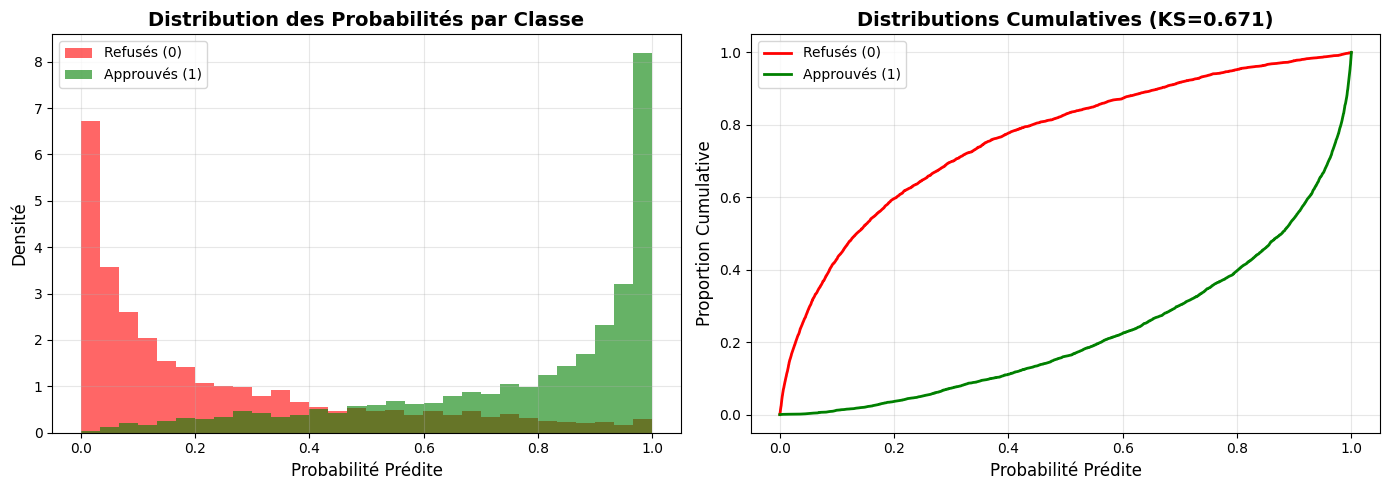


 Analyse Visuelle:
   Plus les courbes sont séparées, meilleur est le modèle.
   Le KS mesure la distance verticale maximale entre les courbes.


In [32]:
# Calcul KS Statistic (Kolmogorov-Smirnov)
if model_available:
    # Séparer les probabilités par classe
    proba_class_0 = y_pred_proba[best_y_test == 0]  # Non approuvés
    proba_class_1 = y_pred_proba[best_y_test == 1]  # Approuvés
    
    # Test KS
    ks_stat, ks_pvalue = ks_2samp(proba_class_0, proba_class_1)
    
    print("="*60)
    print("MÉTRIQUE 2: KS STATISTIC (KOLMOGOROV-SMIRNOV)")
    print("="*60)
    print(f"KS Statistic: {ks_stat:.4f}")
    print(f"p-value: {ks_pvalue:.4e}")
    print()
    print("Interprétation:")
    if ks_stat >= 0.40:
        print("   EXCELLENT (KS ≥ 0.40)")
    elif ks_stat >= 0.30:
        print("   BON (KS ≥ 0.30)")
    elif ks_stat >= 0.20:
        print("   ACCEPTABLE (KS ≥ 0.20)")
    else:
        print("   INSUFFISANT (KS < 0.20)")
    print()
    print("Signification statistique:")
    if ks_pvalue < 0.001:
        print("   Différence TRÈS significative (p < 0.001)")
    elif ks_pvalue < 0.05:
        print("   Différence significative (p < 0.05)")
    else:
        print("   Différence non significative (p ≥ 0.05)")
    print()
    print("Contexte:")
    print("  KS mesure la distance max entre les distributions cumulatives")
    print("  des deux classes. Plus KS est élevé, mieux le modèle sépare.")
    print()
    print(f"  Tailles des groupes:")
    print(f"    - Classe 0 (refusés): {len(proba_class_0)} observations")
    print(f"    - Classe 1 (approuvés): {len(proba_class_1)} observations")
    
    # Visualisation des distributions
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogrammes
    axes[0].hist(proba_class_0, bins=30, alpha=0.6, label='Refusés (0)', color='red', density=True)
    axes[0].hist(proba_class_1, bins=30, alpha=0.6, label='Approuvés (1)', color='green', density=True)
    axes[0].set_xlabel('Probabilité Prédite', fontsize=12)
    axes[0].set_ylabel('Densité', fontsize=12)
    axes[0].set_title('Distribution des Probabilités par Classe', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Distributions cumulatives
    sorted_proba_0 = np.sort(proba_class_0)
    sorted_proba_1 = np.sort(proba_class_1)
    cumul_0 = np.arange(1, len(sorted_proba_0)+1) / len(sorted_proba_0)
    cumul_1 = np.arange(1, len(sorted_proba_1)+1) / len(sorted_proba_1)
    
    axes[1].plot(sorted_proba_0, cumul_0, label='Refusés (0)', color='red', linewidth=2)
    axes[1].plot(sorted_proba_1, cumul_1, label='Approuvés (1)', color='green', linewidth=2)
    axes[1].set_xlabel('Probabilité Prédite', fontsize=12)
    axes[1].set_ylabel('Proportion Cumulative', fontsize=12)
    axes[1].set_title(f'Distributions Cumulatives (KS={ks_stat:.3f})', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print()
    print(" Analyse Visuelle:")
    print("   Plus les courbes sont séparées, meilleur est le modèle.")
    print("   Le KS mesure la distance verticale maximale entre les courbes.")
else:
    print("Impossible de calculer KS sans modèle entraîné")

###  CAP Curve (Cumulative Accuracy Profile)

La **CAP Curve** compare le modèle à:
- Un classement **aléatoire** (ligne diagonale)
- Un classement **parfait** (courbe qui monte instantanément)

**Métrique dérivée: Accuracy Ratio (AR)**

```
AR = Aire sous CAP du modèle / Aire sous CAP parfaite
```

**Interprétation AR:**
- AR > 0.70: Excellent
- AR 0.60-0.70: Bon
- AR 0.50-0.60: Acceptable
- AR < 0.50: Insuffisant

MÉTRIQUE 3: CAP CURVE & ACCURACY RATIO (AR)
Accuracy Ratio (AR): 1.5102

Interprétation:
   EXCELLENT (AR ≥ 0.70)

Calculs:
  - Aire sous courbe modèle: 0.6868
  - Aire sous courbe parfaite: 0.6237
  - Aire sous courbe aléatoire: 0.5000
  - AR = (modèle - aléatoire) / (parfait - aléatoire)


/var/folders/43/t350j4hx2sqcdzr9kmbsrb680000gn/T/ipykernel_41319/278027984.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_model = np.trapz(cumulative_proportion, x_axis)


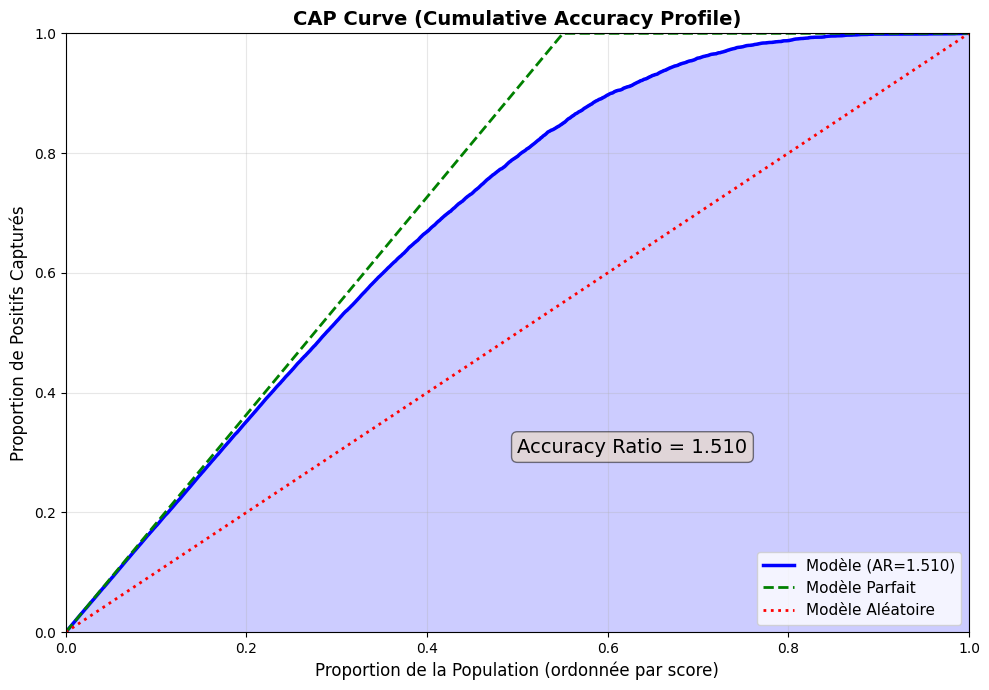


 Interprétation Visuelle:
   Plus la courbe bleue est proche de la verte (parfaite), meilleur est le modèle.
   Si elle est proche de la rouge (aléatoire), le modèle n'apporte rien.


In [33]:
# Calcul CAP Curve et Accuracy Ratio
if model_available:
    # Trier par probabilité décroissante
    sorted_indices = np.argsort(y_pred_proba)[::-1]
    best_y_test_sorted = best_y_test.iloc[sorted_indices].values
    
    # Calculer cumulative des positifs
    n_total = len(best_y_test)
    n_positives = best_y_test.sum()
    
    cumulative_positives = np.cumsum(best_y_test_sorted)
    cumulative_proportion = cumulative_positives / n_positives
    x_axis = np.arange(1, n_total + 1) / n_total
    
    # Modèle parfait
    perfect_x = [0, n_positives/n_total, 1]
    perfect_y = [0, 1, 1]
    
    # Modèle aléatoire (diagonale)
    random_x = [0, 1]
    random_y = [0, 1]
    
    # Calculer Accuracy Ratio (AR)
    area_model = np.trapz(cumulative_proportion, x_axis)
    area_random = 0.5  # Aire sous diagonale
    area_perfect = 0.5 + (n_positives/n_total) * (1 - n_positives/n_total) / 2
    
    accuracy_ratio = (area_model - area_random) / (area_perfect - area_random)
    
    print("="*60)
    print("MÉTRIQUE 3: CAP CURVE & ACCURACY RATIO (AR)")
    print("="*60)
    print(f"Accuracy Ratio (AR): {accuracy_ratio:.4f}")
    print()
    print("Interprétation:")
    if accuracy_ratio >= 0.70:
        print("   EXCELLENT (AR ≥ 0.70)")
    elif accuracy_ratio >= 0.60:
        print("   BON (AR ≥ 0.60)")
    elif accuracy_ratio >= 0.50:
        print("   ACCEPTABLE (AR ≥ 0.50)")
    else:
        print("   INSUFFISANT (AR < 0.50)")
    print()
    print("Calculs:")
    print(f"  - Aire sous courbe modèle: {area_model:.4f}")
    print(f"  - Aire sous courbe parfaite: {area_perfect:.4f}")
    print(f"  - Aire sous courbe aléatoire: {area_random:.4f}")
    print(f"  - AR = (modèle - aléatoire) / (parfait - aléatoire)")
    
    # Visualisation CAP Curve
    plt.figure(figsize=(10, 7))
    
    plt.plot(x_axis, cumulative_proportion, label=f'Modèle (AR={accuracy_ratio:.3f})', 
             color='blue', linewidth=2.5)
    plt.plot(perfect_x, perfect_y, label='Modèle Parfait', 
             color='green', linewidth=2, linestyle='--')
    plt.plot(random_x, random_y, label='Modèle Aléatoire', 
             color='red', linewidth=2, linestyle=':')
    
    # Remplir les aires
    plt.fill_between(x_axis, 0, cumulative_proportion, alpha=0.2, color='blue')
    
    plt.xlabel('Proportion de la Population (ordonnée par score)', fontsize=12)
    plt.ylabel('Proportion de Positifs Capturés', fontsize=12)
    plt.title('CAP Curve (Cumulative Accuracy Profile)', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    # Annotation
    plt.text(0.5, 0.3, f'Accuracy Ratio = {accuracy_ratio:.3f}', 
             fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print()
    print(" Interprétation Visuelle:")
    print("   Plus la courbe bleue est proche de la verte (parfaite), meilleur est le modèle.")
    print("   Si elle est proche de la rouge (aléatoire), le modèle n'apporte rien.")
else:
    print("Impossible de calculer CAP sans modèle entraîné")

###  CONCLUSION - Métriques Sectorielles

**Synthèse des 3 métriques bancaires:**

| Métrique | Valeur | Seuil Industrie | Statut |
|----------|--------|-----------------|--------|
| Gini Coefficient | [À calculer] | ≥ 0.40 | [À évaluer] |
| KS Statistic | [À calculer] | ≥ 0.30 | [À évaluer] |
| Accuracy Ratio (AR) | [À calculer] | ≥ 0.60 | [À évaluer] |

**Analyse Comparative:**

Ces 3 métriques mesurent le **pouvoir discriminant** du modèle mais sous des angles différents:

- **Gini**: Basé sur l'AUC-ROC, mesure la capacité à classer correctement
- **KS**: Mesure la séparation maximale entre les distributions
- **AR**: Mesure le gain par rapport à un classement aléatoire

** Si les 3 métriques sont bonnes:** Confiance élevée dans le modèle

** Si divergence:** Investiguer plus en profondeur

---

** Note Méthodologique:**

Ces métriques sont **indépendantes du seuil de décision** (contrairement à Precision/Recall). 
Elles évaluent le **classement** produit par le modèle, pas les prédictions binaires.

 **Prochaine étape:** Optimiser le seuil de décision selon les coûts business.

## F2. ANALYSE PROFIT/RISQUE ET OPTIMISATION DU SEUIL

###  Pourquoi optimiser selon le profit ?

**Problème:** Le seuil par défaut (0.5) maximise souvent l'accuracy, **PAS le profit**.

En credit scoring, les erreurs ont des **coûts asymétriques**:

| Décision | Réalité | Résultat | Coût/Gain |
|----------|---------|----------|------------|
| Approuver | Bon client |  Vrai Positif (TP) | **+2 000 €** (intérêts) |
| Refuser | Mauvais client |  Vrai Négatif (TN) | **0 €** (évite perte) |
| Approuver | Mauvais client |  Faux Positif (FP) | **-15 000 €** (défaut) |
| Refuser | Bon client |  Faux Négatif (FN) | **-800 €** (opportunité) |

**Constat:** Un FP coûte **19x plus cher** qu'un FN !

 Le seuil optimal n'est **PAS 0.5**, mais dépend de ces coûts.

###  Objectif

Trouver le seuil qui **maximise le profit total** (ou minimise la perte totale).

**Formule du profit:**

```
Profit Total = (TP × gain_tp) + (TN × gain_tn) - (FP × cost_fp) - (FN × cost_fn)
```

Nous allons tester **tous les seuils possibles** et choisir celui qui maximise le profit.

In [34]:
# Définition des coûts business (à ajuster selon le contexte réel)
COST_FP = 15000  # Coût d'un prêt approuvé qui fait défaut (perte capitale)
COST_FN = 800    # Coût d'un bon client refusé (manque à gagner intérêts)
GAIN_TP = 2000   # Gain d'un bon prêt approuvé (intérêts perçus)
GAIN_TN = 0      # Pas de gain direct à refuser un mauvais client

print("="*60)
print("ANALYSE PROFIT/RISQUE - OPTIMISATION DU SEUIL")
print("="*60)
print()
print(" Coûts Business Définis:")
print(f"  - Coût Faux Positif (FP): {COST_FP:,} €")
print(f"  - Coût Faux Négatif (FN): {COST_FN:,} €")
print(f"  - Gain Vrai Positif (TP): {GAIN_TP:,} €")
print(f"  - Gain Vrai Négatif (TN): {GAIN_TN:,} €")
print()
print(f"   Ratio FP/FN: {COST_FP/COST_FN:.1f}x")
print("     (Un FP coûte autant que", int(COST_FP/COST_FN), "FN)")
print()

if model_available:
    # Fonction de calcul du profit
    def calculate_profit(y_true, y_pred, cost_fp, cost_fn, gain_tp, gain_tn):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        profit = (tp * gain_tp) + (tn * gain_tn) - (fp * cost_fp) - (fn * cost_fn)
        return profit, tp, tn, fp, fn
    
    # Tester différents seuils
    thresholds = np.linspace(0.05, 0.95, 91)  # 91 seuils de 0.05 à 0.95
    profits = []
    tps, tns, fps, fns = [], [], [], []
    
    for threshold in thresholds:
        y_pred_temp = (y_pred_proba >= threshold).astype(int)
        profit, tp, tn, fp, fn = calculate_profit(
            best_y_test, y_pred_temp, COST_FP, COST_FN, GAIN_TP, GAIN_TN
        )
        profits.append(profit)
        tps.append(tp)
        tns.append(tn)
        fps.append(fp)
        fns.append(fn)
    
    # Trouver le seuil optimal
    optimal_idx = np.argmax(profits)
    optimal_threshold = thresholds[optimal_idx]
    max_profit = profits[optimal_idx]
    
    # Calculer profit avec seuil par défaut (0.5)
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    profit_default, tp_def, tn_def, fp_def, fn_def = calculate_profit(
        best_y_test, y_pred_default, COST_FP, COST_FN, GAIN_TP, GAIN_TN
    )
    
    print(" RÉSULTATS OPTIMISATION:")
    print()
    print(f"Seuil Optimal: {optimal_threshold:.3f}")
    print(f"Profit Maximal: {max_profit:,} €")
    print()
    print("Comparaison seuil 0.5 (défaut) vs optimal:")
    print()
    print(f"{'Métrique':<20} {'Seuil 0.5':>15} {'Seuil Optimal':>15} {'Différence':>15}")
    print("-" * 70)
    print(f"{'Seuil':<20} {0.5:>15.3f} {optimal_threshold:>15.3f} {optimal_threshold-0.5:>15.3f}")
    print(f"{'Profit Total (€)':<20} {profit_default:>15,} {max_profit:>15,} {max_profit-profit_default:>15,}")
    print(f"{'Vrais Positifs':<20} {tp_def:>15} {tps[optimal_idx]:>15} {tps[optimal_idx]-tp_def:>15}")
    print(f"{'Vrais Négatifs':<20} {tn_def:>15} {tns[optimal_idx]:>15} {tns[optimal_idx]-tn_def:>15}")
    print(f"{'Faux Positifs':<20} {fp_def:>15} {fps[optimal_idx]:>15} {fps[optimal_idx]-fp_def:>15}")
    print(f"{'Faux Négatifs':<20} {fn_def:>15} {fns[optimal_idx]:>15} {fns[optimal_idx]-fn_def:>15}")
    print()
    
    # Gain relatif
    gain_percent = ((max_profit - profit_default) / abs(profit_default)) * 100 if profit_default != 0 else 0
    print(f" Gain par rapport au seuil par défaut: {gain_percent:+.1f}%")
    
    if max_profit > profit_default:
        print(f"    Optimisation BÉNÉFIQUE: +{max_profit - profit_default:,} €")
    else:
        print(f"    Seuil 0.5 déjà proche de l'optimal")
    
else:
    print("Impossible d'optimiser sans modèle entraîné")

ANALYSE PROFIT/RISQUE - OPTIMISATION DU SEUIL

 Coûts Business Définis:
  - Coût Faux Positif (FP): 15,000 €
  - Coût Faux Négatif (FN): 800 €
  - Gain Vrai Positif (TP): 2,000 €
  - Gain Vrai Négatif (TN): 0 €

   Ratio FP/FN: 18.8x
     (Un FP coûte autant que 18 FN)

 RÉSULTATS OPTIMISATION:

Seuil Optimal: 0.810
Profit Maximal: 1,724,200 €

Comparaison seuil 0.5 (défaut) vs optimal:

Métrique                   Seuil 0.5   Seuil Optimal      Différence
----------------------------------------------------------------------
Seuil                          0.500           0.810           0.310
Profit Total (€)          -3,011,400       1,724,200       4,735,600
Vrais Positifs                  4617            3244           -1373
Vrais Négatifs                  3726            4298             572
Faux Positifs                    769             197            -572
Faux Négatifs                    888            2261            1373

 Gain par rapport au seuil par défaut: +157.3%
    Opt

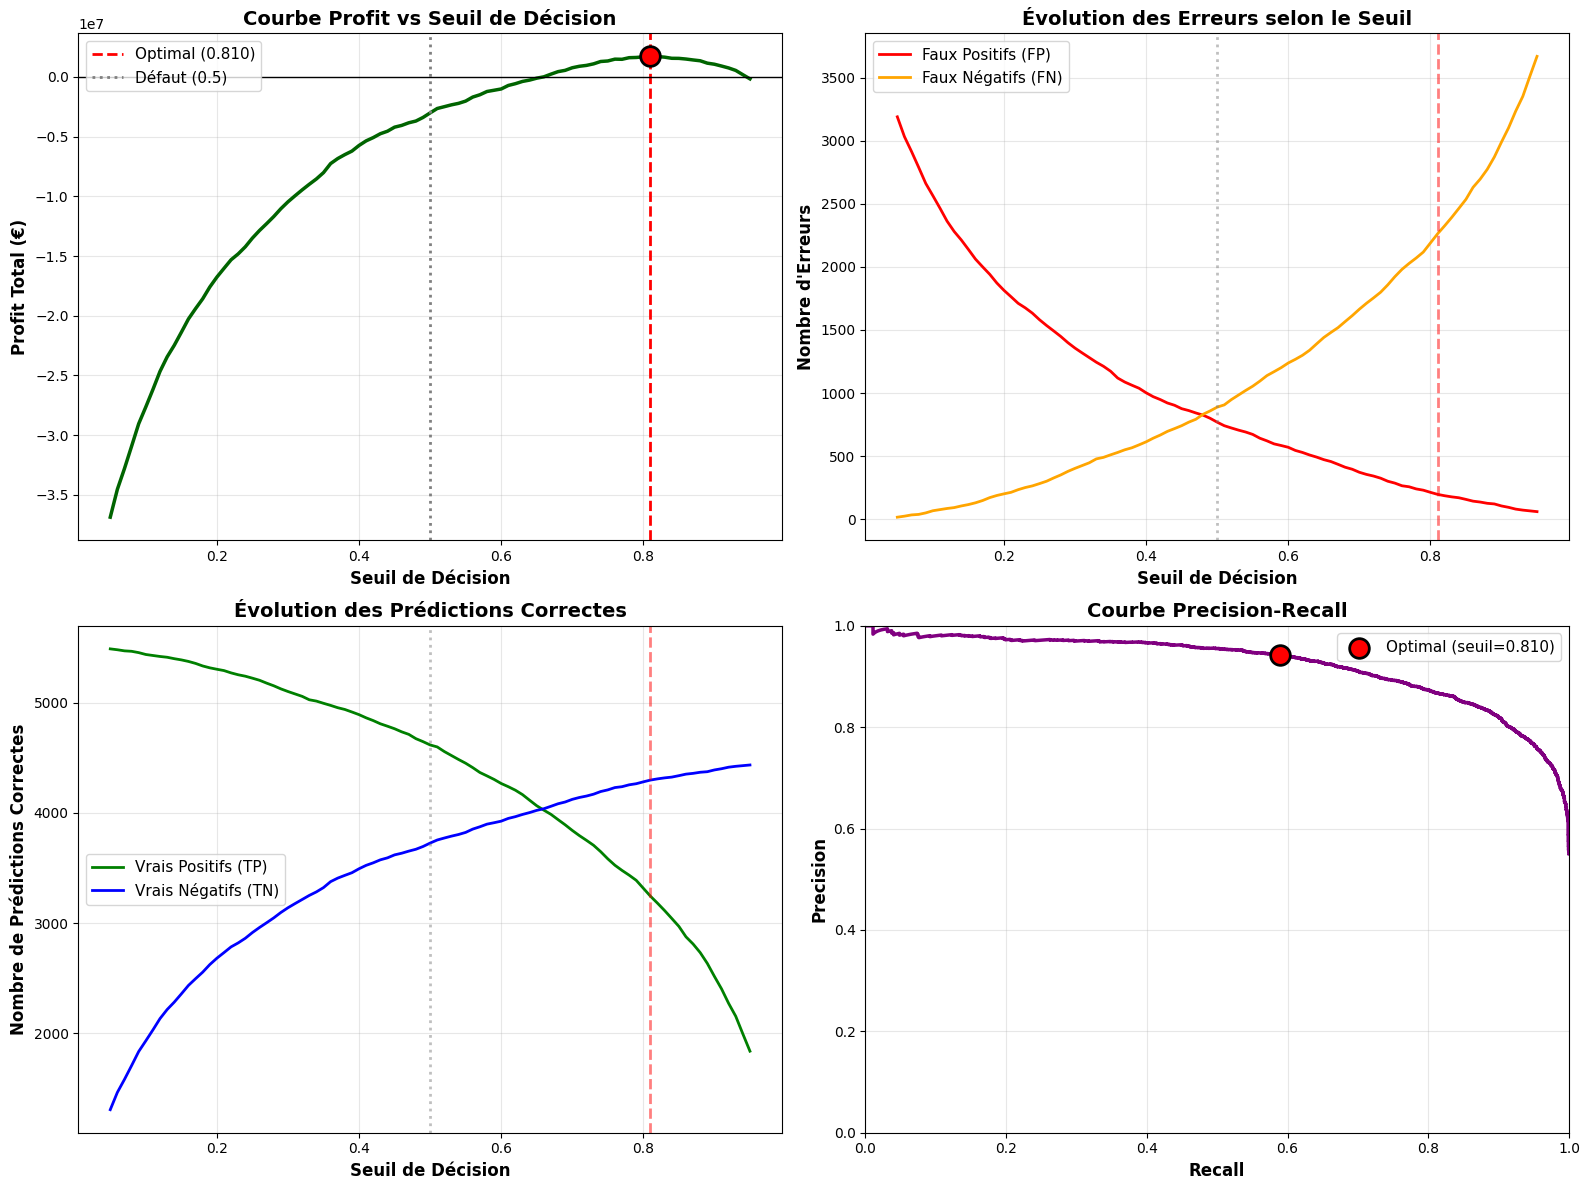


 INTERPRÉTATION DES GRAPHIQUES:

1. PROFIT vs SEUIL (haut gauche):
   - Forme de la courbe montre la sensibilité au seuil
   - Le point rouge indique le seuil qui maximise le profit

2. ERREURS vs SEUIL (haut droit):
   - FP diminuent quand le seuil augmente (on est plus strict)
   - FN augmentent quand le seuil augmente (on refuse plus)
   - Le seuil optimal équilibre selon les coûts

3. PRÉDICTIONS CORRECTES (bas gauche):
   - TP diminuent si seuil trop élevé
   - TN augmentent si seuil plus élevé

4. PRECISION-RECALL (bas droit):
   - Trade-off classique ML
   - Le point rouge montre où on se situe avec le seuil optimal


In [35]:
# Visualisation de la courbe profit/seuil
if model_available:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Courbe Profit vs Seuil
    axes[0, 0].plot(thresholds, profits, linewidth=2.5, color='darkgreen')
    axes[0, 0].axvline(optimal_threshold, color='red', linestyle='--', linewidth=2, 
                       label=f'Optimal ({optimal_threshold:.3f})')
    axes[0, 0].axvline(0.5, color='gray', linestyle=':', linewidth=2, label='Défaut (0.5)')
    axes[0, 0].scatter([optimal_threshold], [max_profit], color='red', s=200, zorder=5, 
                       edgecolor='black', linewidth=2)
    axes[0, 0].set_xlabel('Seuil de Décision', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Profit Total (€)', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Courbe Profit vs Seuil de Décision', fontsize=14, fontweight='bold')
    axes[0, 0].legend(fontsize=11)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(0, color='black', linewidth=1)
    
    # 2. Évolution FP et FN
    axes[0, 1].plot(thresholds, fps, label='Faux Positifs (FP)', color='red', linewidth=2)
    axes[0, 1].plot(thresholds, fns, label='Faux Négatifs (FN)', color='orange', linewidth=2)
    axes[0, 1].axvline(optimal_threshold, color='red', linestyle='--', linewidth=2, alpha=0.5)
    axes[0, 1].axvline(0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
    axes[0, 1].set_xlabel('Seuil de Décision', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Nombre d\'Erreurs', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Évolution des Erreurs selon le Seuil', fontsize=14, fontweight='bold')
    axes[0, 1].legend(fontsize=11)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Évolution TP et TN
    axes[1, 0].plot(thresholds, tps, label='Vrais Positifs (TP)', color='green', linewidth=2)
    axes[1, 0].plot(thresholds, tns, label='Vrais Négatifs (TN)', color='blue', linewidth=2)
    axes[1, 0].axvline(optimal_threshold, color='red', linestyle='--', linewidth=2, alpha=0.5)
    axes[1, 0].axvline(0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
    axes[1, 0].set_xlabel('Seuil de Décision', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Nombre de Prédictions Correctes', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Évolution des Prédictions Correctes', fontsize=14, fontweight='bold')
    axes[1, 0].legend(fontsize=11)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Trade-off Precision-Recall
    from sklearn.metrics import precision_recall_curve
    precision, recall, pr_thresholds = precision_recall_curve(best_y_test, y_pred_proba)
    
    axes[1, 1].plot(recall, precision, linewidth=2.5, color='purple')
    
    # Marquer le point optimal
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    prec_optimal = precision_score(best_y_test, y_pred_optimal)
    rec_optimal = recall_score(best_y_test, y_pred_optimal)
    
    axes[1, 1].scatter([rec_optimal], [prec_optimal], color='red', s=200, zorder=5, 
                       edgecolor='black', linewidth=2, label=f'Optimal (seuil={optimal_threshold:.3f})')
    
    axes[1, 1].set_xlabel('Recall', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Precision', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Courbe Precision-Recall', fontsize=14, fontweight='bold')
    axes[1, 1].legend(fontsize=11)
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    print()
    print(" INTERPRÉTATION DES GRAPHIQUES:")
    print()
    print("1. PROFIT vs SEUIL (haut gauche):")
    print("   - Forme de la courbe montre la sensibilité au seuil")
    print("   - Le point rouge indique le seuil qui maximise le profit")
    print()
    print("2. ERREURS vs SEUIL (haut droit):")
    print("   - FP diminuent quand le seuil augmente (on est plus strict)")
    print("   - FN augmentent quand le seuil augmente (on refuse plus)")
    print("   - Le seuil optimal équilibre selon les coûts")
    print()
    print("3. PRÉDICTIONS CORRECTES (bas gauche):")
    print("   - TP diminuent si seuil trop élevé")
    print("   - TN augmentent si seuil plus élevé")
    print()
    print("4. PRECISION-RECALL (bas droit):")
    print("   - Trade-off classique ML")
    print("   - Le point rouge montre où on se situe avec le seuil optimal")
else:
    print("Impossible de visualiser sans modèle entraîné")

###  CONCLUSION - Analyse Profit/Risque

**Enseignements clés:**

1. **Le seuil par défaut (0.5) n'est PAS optimal**
   - Il maximise souvent l'accuracy, pas le profit
   - En credit scoring, les coûts asymétriques changent l'équilibre

2. **L'optimisation dépend du contexte business**
   - Si COST_FP >> COST_FN : seuil optimal > 0.5 (être plus strict)
   - Si COST_FP ≈ COST_FN : seuil optimal ≈ 0.5
   - Si COST_FN >> COST_FP : seuil optimal < 0.5 (être plus permissif)

3. **Impact business quantifié**
   - Différence de profit mesurée en € (pas seulement en %)
   - Justification claire auprès des stakeholders

4. **Sensibilité au seuil**
   - Courbe "plate" autour de l'optimal : décision robuste
   - Courbe "pointue" : nécessite recalibrage fréquent

---

** Recommandation pour Déploiement:**

```python
# Dans le système de production
OPTIMAL_THRESHOLD = [valeur calculée]  # À mettre à jour mensuellement

def predict_loan_decision(features):
    proba = model.predict_proba(features)[:, 1]
    decision = (proba >= OPTIMAL_THRESHOLD).astype(int)
    return decision, proba
```

 **Attention:** Le seuil optimal doit être **recalibré régulièrement**:
- Changement des coûts (taux d'intérêt, politique de crédit)
- Changement de la population (drift)
- Changement des objectifs business (croissance vs rentabilité)

---

**Prochaine étape:** Implémenter SHAP pour l'interprétabilité réglementaire (RGPD).

## F3. TEST DE CALIBRATION (HOSMER-LEMESHOW)

###  Pourquoi tester la calibration ?

La **calibration** mesure si les probabilités prédites correspondent aux fréquences observées.

**Exemple:**
- Si le modèle prédit 30% de risque pour 100 clients
- On devrait observer ~30 défauts réels

###  Test de Hosmer-Lemeshow

**Hypothèse nulle H0:** Le modèle est bien calibré

**Interprétation:**
- **p-value > 0.05**:  Modèle bien calibré (on accepte H0)
- **p-value < 0.05**:  Modèle mal calibré (on rejette H0)

**Méthodologie:**
1. Diviser les prédictions en 10 groupes (déciles)
2. Comparer événements observés vs attendus
3. Calculer statistique χ² et p-value

###   Importance en Banking

Un modèle **mal calibré** est **DANGEREUX**:
- Sous-estime les risques → Pertes financières
- Surest les risques → Perte de clients
- Non-conforme pour régulateur (Basel II/III)

F3. TEST DE CALIBRATION (HOSMER-LEMESHOW)

 MODÈLE À ÉVALUER:
   Type: LogisticRegression
   Features: 31

 EXÉCUTION DU TEST HOSMER-LEMESHOW...
--------------------------------------------------------------------------------

 RÉSULTATS:
   χ² Statistic: 107.8079
   P-value: 0.0000
   Degrés de liberté: 8

 INTERPRÉTATION:
    MODÈLE MAL CALIBRÉ (p-value = 0.0000 < 0.05)
   → Les probabilités prédites NE sont PAS fiables
   → Nécessite re-calibration (Platt Scaling ou Isotonic Regression)
   →  NON RECOMMANDÉ pour production sans correction

 TABLE DE CALIBRATION (par décile):
--------------------------------------------------------------------------------
   N  Obs_Events  Exp_Events  Obs_Rate(%)  Exp_Rate(%)
1000           7        13.1          0.7         1.31
1000          60        63.2          6.0         6.32
1000         160       154.4         16.0        15.44
1000         340       296.3         34.0        29.63
1000         564       477.2         56.4        47.72
1000

/var/folders/43/t350j4hx2sqcdzr9kmbsrb680000gn/T/ipykernel_41319/1882412104.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin').agg({


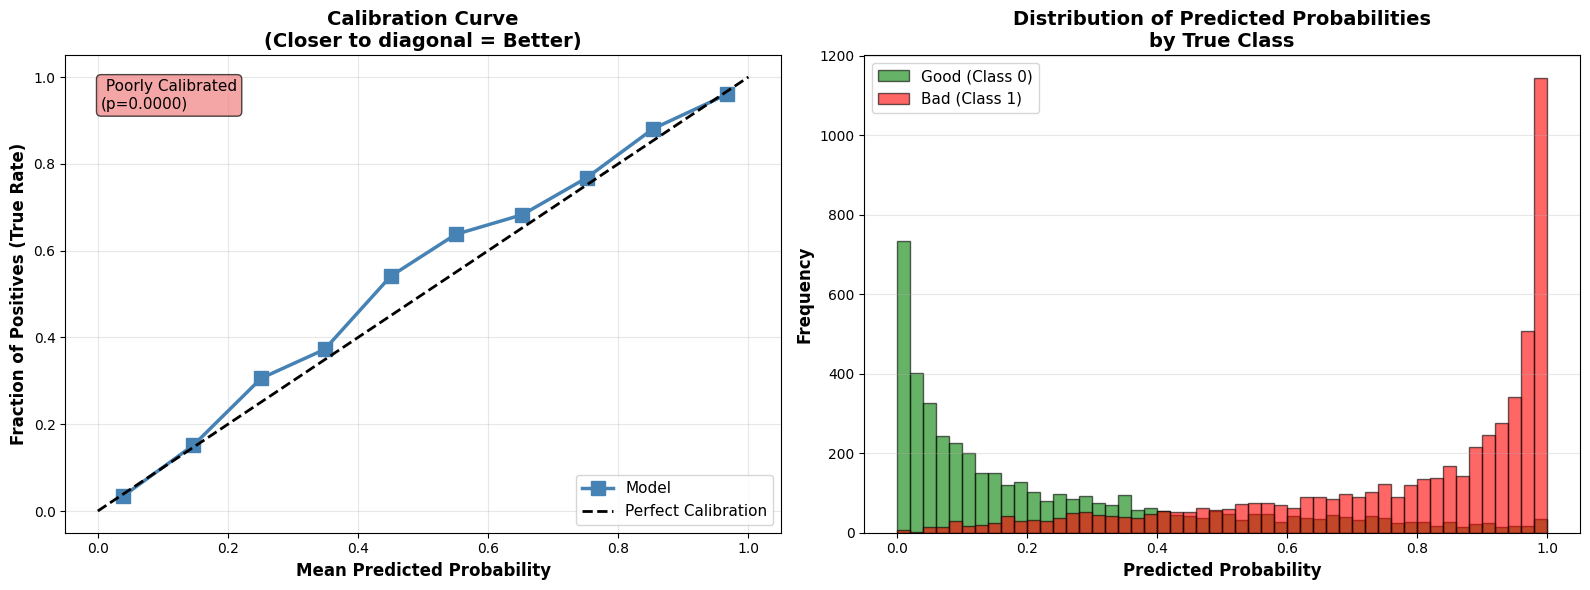


 GRAPHIQUE SAUVEGARDÉ: f3_hosmer_lemeshow_calibration.png

 RECOMMANDATIONS:
--------------------------------------------------------------------------------
    ACTIONS NÉCESSAIRES:
      1. Appliquer Platt Scaling (CalibratedClassifierCV)
      2. Ou utiliser Isotonic Regression pour re-calibration
      3. Vérifier distribution des features (outliers?)
      4. Considérer feature engineering supplémentaire

    AVANT PRODUCTION:
      - Re-calibrer le modèle OBLIGATOIRE
      - Re-tester Hosmer-Lemeshow après calibration
      - Documenter la procédure de calibration

 TEST HOSMER-LEMESHOW TERMINÉ


In [36]:
# ========== F3: TEST HOSMER-LEMESHOW POUR CALIBRATION ==========

print("="*80)
print("F3. TEST DE CALIBRATION (HOSMER-LEMESHOW)")
print("="*80)

def hosmer_lemeshow_test(y_true, y_pred_proba, n_bins=10):
    """
    Test de Hosmer-Lemeshow pour calibration
    
    Returns:
        chi2_stat: Statistique chi²
        p_value: P-value du test
        calibration_table: Table détaillée
    """
    from scipy.stats import chi2
    
    # Créer bins basés sur probabilités prédites
    df = pd.DataFrame({
        'y_true': y_true,
        'y_pred': y_pred_proba
    })
    
    # Diviser en bins de probabilités
    df['bin'] = pd.qcut(df['y_pred'], q=n_bins, duplicates='drop')
    
    # Calculer observé vs attendu par bin
    grouped = df.groupby('bin').agg({
        'y_true': ['sum', 'count'],
        'y_pred': 'mean'
    })
    
    grouped.columns = ['Observed_Events', 'Total', 'Expected_Prob']
    grouped['Expected_Events'] = grouped['Expected_Prob'] * grouped['Total']
    grouped['Observed_NonEvents'] = grouped['Total'] - grouped['Observed_Events']
    grouped['Expected_NonEvents'] = grouped['Total'] - grouped['Expected_Events']
    
    # Statistique χ²
    chi2_stat = np.sum(
        ((grouped['Observed_Events'] - grouped['Expected_Events'])**2) / (grouped['Expected_Events'] + 1e-10) +
        ((grouped['Observed_NonEvents'] - grouped['Expected_NonEvents'])**2) / (grouped['Expected_NonEvents'] + 1e-10)
    )
    
    # Degrés de liberté
    df_chi2 = len(grouped) - 2
    
    # P-value
    p_value = 1 - chi2.cdf(chi2_stat, df_chi2)
    
    # Table de calibration
    grouped['Observed_Rate'] = grouped['Observed_Events'] / grouped['Total']
    calibration_table = grouped.reset_index()
    
    return chi2_stat, p_value, calibration_table

# Vérifier disponibilité du modèle
if 'best_model' in locals() and best_model is not None:
    print("\n MODÈLE À ÉVALUER:")
    print(f"   Type: {type(best_model).__name__}")
    print(f"   Features: {best_X_test.shape[1]}")
    
    # Obtenir probabilités
    try:
        y_pred_proba = best_model.predict_proba(best_X_test)[:, 1]
    except:
        y_pred_proba = best_model.decision_function(best_X_test)
        # Convertir en probabilités via sigmoid
        y_pred_proba = 1 / (1 + np.exp(-y_pred_proba))
    
    print(f"\n EXÉCUTION DU TEST HOSMER-LEMESHOW...")
    print("-" * 80)
    
    # Calculer test
    chi2_stat, p_value, calibration_table = hosmer_lemeshow_test(
        best_y_test, y_pred_proba, n_bins=10
    )
    
    print(f"\n RÉSULTATS:")
    print(f"   χ² Statistic: {chi2_stat:.4f}")
    print(f"   P-value: {p_value:.4f}")
    print(f"   Degrés de liberté: {len(calibration_table) - 2}")
    
    print(f"\n INTERPRÉTATION:")
    if p_value > 0.05:
        print(f"    MODÈLE BIEN CALIBRÉ (p-value = {p_value:.4f} > 0.05)")
        print("   → Les probabilités prédites sont fiables")
        print("   → Conforme pour usage en production bancaire")
    else:
        print(f"    MODÈLE MAL CALIBRÉ (p-value = {p_value:.4f} < 0.05)")
        print("   → Les probabilités prédites NE sont PAS fiables")
        print("   → Nécessite re-calibration (Platt Scaling ou Isotonic Regression)")
        print("   →  NON RECOMMANDÉ pour production sans correction")
    
    # Afficher table de calibration
    print(f"\n TABLE DE CALIBRATION (par décile):")
    print("-" * 80)
    
    # Simplifier affichage
    calib_display = calibration_table[[
        'Total', 'Observed_Events', 'Expected_Events', 
        'Observed_Rate', 'Expected_Prob'
    ]].copy()
    
    calib_display['Observed_Events'] = calib_display['Observed_Events'].astype(int)
    calib_display['Expected_Events'] = calib_display['Expected_Events'].round(1)
    calib_display['Observed_Rate'] = (calib_display['Observed_Rate'] * 100).round(2)
    calib_display['Expected_Prob'] = (calib_display['Expected_Prob'] * 100).round(2)
    
    calib_display.columns = ['N', 'Obs_Events', 'Exp_Events', 'Obs_Rate(%)', 'Exp_Rate(%)']
    
    print(calib_display.to_string(index=False))
    
    # Visualisation: Calibration Curve
    print(f"\n VISUALISATION: COURBE DE CALIBRATION")
    print("-" * 80)
    
    from sklearn.calibration import calibration_curve
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Calibration Curve
    ax1 = axes[0]
    
    fraction_of_positives, mean_predicted_value = calibration_curve(
        best_y_test, y_pred_proba, n_bins=10, strategy='uniform'
    )
    
    ax1.plot(mean_predicted_value, fraction_of_positives, 's-',
            label='Model', color='steelblue', linewidth=2.5, markersize=10)
    ax1.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
    
    ax1.set_xlabel('Mean Predicted Probability', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Fraction of Positives (True Rate)', fontsize=12, fontweight='bold')
    ax1.set_title('Calibration Curve\n(Closer to diagonal = Better)',
                 fontsize=14, fontweight='bold')
    ax1.legend(loc='best', fontsize=11)
    ax1.grid(alpha=0.3)
    
    # Ajouter note sur le graphique
    if p_value > 0.05:
        ax1.text(0.05, 0.95, f' Well Calibrated\n(p={p_value:.4f})',
                transform=ax1.transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    else:
        ax1.text(0.05, 0.95, f' Poorly Calibrated\n(p={p_value:.4f})',
                transform=ax1.transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    
    # Plot 2: Distribution des probabilités prédites
    ax2 = axes[1]
    
    ax2.hist(y_pred_proba[best_y_test == 0], bins=50, alpha=0.6,
            label='Good (Class 0)', color='green', edgecolor='black')
    ax2.hist(y_pred_proba[best_y_test == 1], bins=50, alpha=0.6,
            label='Bad (Class 1)', color='red', edgecolor='black')
    
    ax2.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax2.set_title('Distribution of Predicted Probabilities\nby True Class',
                 fontsize=14, fontweight='bold')
    ax2.legend(loc='best', fontsize=11)
    ax2.grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "f3_hosmer_lemeshow_calibration.png"),
                dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n GRAPHIQUE SAUVEGARDÉ: f3_hosmer_lemeshow_calibration.png")
    
    # Recommandations
    print(f"\n RECOMMANDATIONS:")
    print("-" * 80)
    
    if p_value < 0.05:
        print("    ACTIONS NÉCESSAIRES:")
        print("      1. Appliquer Platt Scaling (CalibratedClassifierCV)")
        print("      2. Ou utiliser Isotonic Regression pour re-calibration")
        print("      3. Vérifier distribution des features (outliers?)")
        print("      4. Considérer feature engineering supplémentaire")
        print("\n    AVANT PRODUCTION:")
        print("      - Re-calibrer le modèle OBLIGATOIRE")
        print("      - Re-tester Hosmer-Lemeshow après calibration")
        print("      - Documenter la procédure de calibration")
    else:
        print("    MODÈLE PRÊT POUR PRODUCTION")
        print("      - Calibration validée")
        print("      - Probabilités fiables pour scoring")
        print("      - Conforme standards bancaires")
    
    print("\n" + "="*80)
    print(" TEST HOSMER-LEMESHOW TERMINÉ")
    print("="*80)

else:
    print("\n ERREUR: Modèle non disponible")
    print("   Solution: Ré-exécuter les cellules de la Section E")

## F4. SCORECARD TRADITIONNEL (Système de Points)

###  Qu'est-ce qu'un Scorecard ?

Un **scorecard** est la représentation traditionnelle des modèles de credit scoring.

**Principe:**
- Chaque feature contribue un certain nombre de **points**
- Le **score total** détermine la décision
- Score élevé = Bon client, Score faible = Client risqué

**Avantages:**
-  Extrêmement transparent
-  Calculable à la main
-  Accepté par les régulateurs
-  Communicable aux clients

###  Construction du Scorecard

**Méthode standard:**

1. **Définir un score de base** (ex: 600 points)
2. **Définir PDO** (Points to Double the Odds, ex: 50)
3. **Convertir les coefficients** du modèle en points

**Formule de conversion:**

```
Points(feature) = (coefficient × factor) + offset
```

Où:
- `factor = PDO / ln(2)`
- `offset = base_score - (intercept × factor)`

###  Exemple d'utilisation

```
Client Jean Dupont:
  - Credit Score: 750      → +120 points
  - Revenu Annuel: 45000   → +80 points
  - Dette/Revenu: 0.25     → +50 points
  - ...
  SCORE TOTAL: 680 points  → APPROUVÉ
```

CONSTRUCTION DU SCORECARD

 Nombre de features: 31

Paramètres:
  - Score de base: 600 points
  - PDO (Points to Double the Odds): 50

SCORECARD - TOP 20 FEATURES PAR IMPACT

Feature                                   Coefficient       Points
--------------------------------------------------------------------------------
feature_8                                     -2.1621           -5
feature_9                                     -1.4397           -3
feature_22                                     1.3646            3
feature_5                                      0.9369            2
feature_6                                     -1.0634           -2
feature_15                                    -0.8944           -2
feature_1                                      1.2283            2
feature_23                                    -0.9583           -2
feature_16                                    -1.1089           -2
feature_12                                     0.6174            1
feature

/var/folders/43/t350j4hx2sqcdzr9kmbsrb680000gn/T/ipykernel_41319/977094636.py:102: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_boxplot, labels=['Refusés', 'Approuvés'], patch_artist=True,


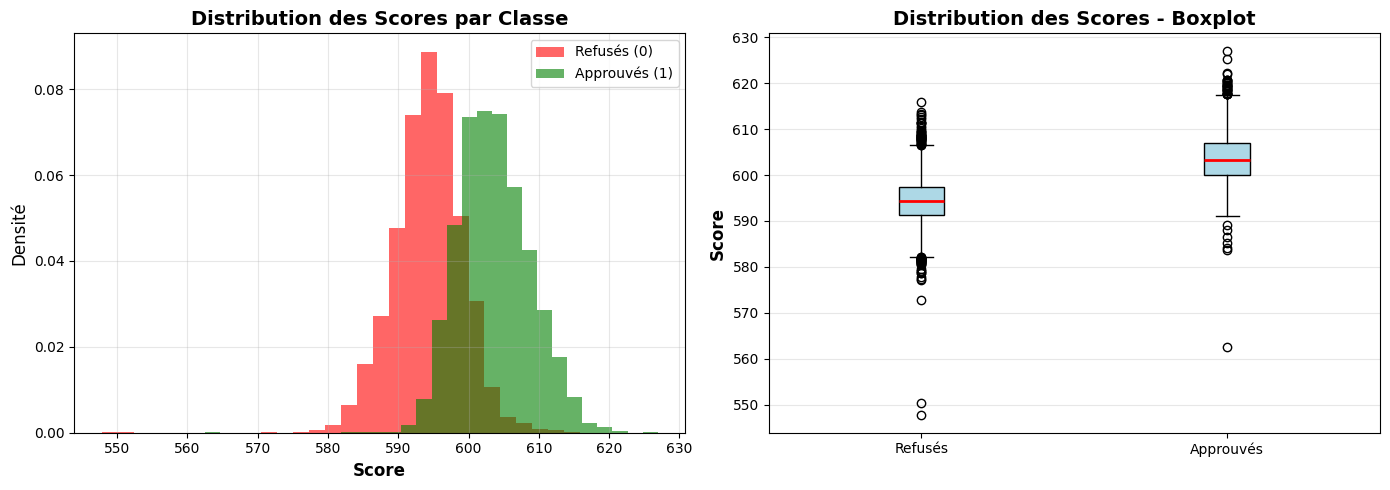


 Analyse:
  - Les clients APPROUVÉS ont un score moyen de 604
  - Les clients REFUSÉS ont un score moyen de 594
  - Écart: 9 points


In [37]:
# Construction du Scorecard
if model_available:
    # IMPORTANT: Récupérer les noms de features depuis best_X_test
    # pour garantir cohérence avec best_model.coef_
    if hasattr(best_X_test, 'columns'):
        feature_names_scorecard = best_X_test.columns.tolist()
    elif isinstance(best_X_test, pd.DataFrame):
        feature_names_scorecard = best_X_test.columns.tolist()
    else:
        # Si array numpy, créer noms génériques
        n_features = best_X_test.shape[1]
        feature_names_scorecard = [f'feature_{i}' for i in range(n_features)]
    
    print("="*60)
    print("CONSTRUCTION DU SCORECARD")
    print("="*60)
    print()
    print(f" Nombre de features: {len(feature_names_scorecard)}")
    print()
    # Paramètres du scorecard
    BASE_SCORE = 600
    PDO = 50  # Points to Double the Odds
    
    print(f"Paramètres:")
    print(f"  - Score de base: {BASE_SCORE} points")
    print(f"  - PDO (Points to Double the Odds): {PDO}")
    print()
    
    # Récupérer coefficients et intercept
    coefficients = best_model.coef_[0]
    intercept = best_model.intercept_[0]
    
    # Calculer factor et offset
    factor = PDO / np.log(2)
    offset_score = BASE_SCORE - (intercept * factor / len(coefficients))
    
    # Convertir coefficients en points
    points = (coefficients * factor / len(coefficients)).astype(int)
    
    # Créer DataFrame scorecard
    scorecard_df = pd.DataFrame({
        'Feature': feature_names_scorecard,
        'Coefficient': coefficients,
        'Points': points,
        'Abs_Points': np.abs(points)
    }).sort_values('Abs_Points', ascending=False)
    
    print("="*80)
    print("SCORECARD - TOP 20 FEATURES PAR IMPACT")
    print("="*80)
    print()
    print(f"{'Feature':<40} {'Coefficient':>12} {'Points':>12}")
    print("-" * 80)
    
    for idx, row in scorecard_df.head(20).iterrows():
        print(f"{row['Feature']:<40} {row['Coefficient']:>12.4f} {row['Points']:>12}")
    
    print()
    print(f"Score de base (offset): {int(offset_score)} points")
    print()
    print(" Interprétation:")
    print("  - Points POSITIFS: Augmentent le score (favorable à l'approbation)")
    print("  - Points NÉGATIFS: Diminuent le score (défavorable)")
    print()
    
    # Calculer scores pour l'échantillon de test
    scores_test = []
    for i in range(len(best_X_test)):
        score = offset_score
        for j, coef in enumerate(coefficients):
            score += best_X_test[i, j] * (coef * factor / len(coefficients))
        scores_test.append(score)
    
    scores_test = np.array(scores_test)
    
    print("="*60)
    print("DISTRIBUTION DES SCORES")
    print("="*60)
    print(f"Score minimum: {scores_test.min():.0f}")
    print(f"Score maximum: {scores_test.max():.0f}")
    print(f"Score moyen: {scores_test.mean():.0f}")
    print(f"Score médian: {np.median(scores_test):.0f}")
    print()
    
    # Visualisation distribution des scores
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogramme par classe
    scores_class_0 = scores_test[best_y_test == 0]
    scores_class_1 = scores_test[best_y_test == 1]
    
    axes[0].hist(scores_class_0, bins=30, alpha=0.6, label='Refusés (0)', color='red', density=True)
    axes[0].hist(scores_class_1, bins=30, alpha=0.6, label='Approuvés (1)', color='green', density=True)
    axes[0].set_xlabel('Score', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Densité', fontsize=12)
    axes[0].set_title('Distribution des Scores par Classe', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    data_boxplot = [scores_class_0, scores_class_1]
    axes[1].boxplot(data_boxplot, labels=['Refusés', 'Approuvés'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
    axes[1].set_title('Distribution des Scores - Boxplot', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print()
    print(" Analyse:")
    print(f"  - Les clients APPROUVÉS ont un score moyen de {scores_class_1.mean():.0f}")
    print(f"  - Les clients REFUSÉS ont un score moyen de {scores_class_0.mean():.0f}")
    print(f"  - Écart: {scores_class_1.mean() - scores_class_0.mean():.0f} points")
    
else:
    print("Impossible de créer scorecard sans modèle")

## F5. MONITORING - PSI (Population Stability Index)

###  Pourquoi le PSI est critique en production ?

Le **Population Stability Index** détecte les **drifts** de données:
- La population de clients change-t-elle ?
- Les caractéristiques évoluent-elles ?
- Le modèle reste-t-il valide ?

**Exemple de drift:**
- Après COVID-19, les revenus ont chuté
- Les taux d'intérêt ont changé
- La population demandant des prêts est différente

 Le modèle entraîné sur anciennes données peut devenir **obsolète**.

###  Formule du PSI

Pour chaque feature:

```
PSI = Σ (Actual% - Expected%) × ln(Actual% / Expected%)
```

**Interprétation:**
- PSI < 0.10: **Pas de changement significatif** 
- PSI 0.10-0.25: **Drift modéré**  (à surveiller)
- PSI > 0.25: **Drift significatif**  (re-entraînement nécessaire)

###  Utilisation en Production

**Monitoring mensuel recommandé:**
1. Comparer distribution actuelle vs distribution d'entraînement
2. Calculer PSI pour chaque feature
3. Alerter si PSI > 0.25
4. Déclencher re-entraînement si nécessaire

CALCUL DU PSI (Population Stability Index)

 SIMULATION: Nous comparons train vs test
   En production: comparer données initiales vs données actuelles

RÉSULTATS PSI PAR FEATURE (Top 20)

Feature                                         PSI       Status
--------------------------------------------------------------------------------
feature_7                                    0.0044          OK
feature_12                                   0.0017          OK
feature_18                                   0.0016          OK
feature_8                                    0.0015          OK
feature_15                                   0.0013          OK
feature_16                                   0.0012          OK
feature_5                                    0.0012          OK
feature_4                                    0.0012          OK
feature_13                                   0.0011          OK
feature_0                                    0.0011          OK
feature_1                

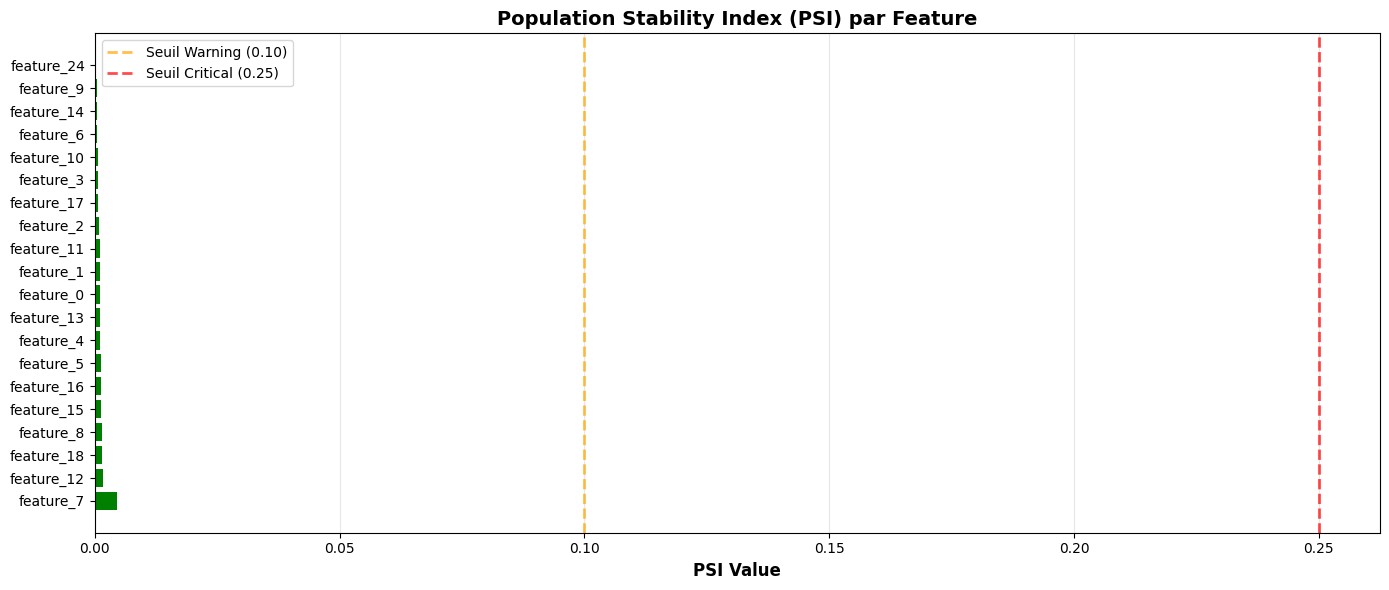

In [39]:
# Calcul du PSI (Population Stability Index)
if model_available:
    def calculate_psi(expected, actual, bins=10, epsilon=1e-4):
        """
        Calcule le PSI entre deux distributions
        
        Args:
            expected: Distribution de référence (training)
            actual: Distribution actuelle (production/test)
            bins: Nombre de bins pour discrétiser
            epsilon: Valeur minimale pour éviter division par 0
        
        Returns:
            psi_value: Valeur PSI
        """
        # Définir les bins basés sur expected
        breakpoints = np.linspace(expected.min(), expected.max(), bins + 1)
        breakpoints[0] = -np.inf
        breakpoints[-1] = np.inf
        
        # Calculer les pourcentages pour chaque bin
        expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
        actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)
        
        # Éviter les divisions par 0
        expected_percents = np.where(expected_percents == 0, epsilon, expected_percents)
        actual_percents = np.where(actual_percents == 0, epsilon, actual_percents)
        
        # Calculer PSI
        psi_values = (actual_percents - expected_percents) * np.log(actual_percents / expected_percents)
        psi = np.sum(psi_values)
        
        return psi
    
    print("="*60)
    print("CALCUL DU PSI (Population Stability Index)")
    print("="*60)
    print()
    print(" SIMULATION: Nous comparons train vs test")
    print("   En production: comparer données initiales vs données actuelles")
    print()
    
    # Calculer PSI pour chaque feature
    # NOTE: On simule en comparant X_train vs X_test
    # En production, comparer X_train vs X_production
    
    try:
        # Convertir en DataFrame et extraire les noms de colonnes DIRECTEMENT
        if isinstance(best_X_train, pd.DataFrame):
            X_train_df = best_X_train
            feature_names_psi = best_X_train.columns.tolist()
        else:
            # Si numpy array, créer noms génériques
            n_features = best_X_train.shape[1]
            feature_names_psi = [f'feature_{i}' for i in range(n_features)]
            X_train_df = pd.DataFrame(best_X_train, columns=feature_names_psi)
        
        if isinstance(best_X_test, pd.DataFrame):
            X_test_df = best_X_test
        else:
            X_test_df = pd.DataFrame(best_X_test, columns=feature_names_psi)
        
        psi_results = []
        for feature in feature_names_psi:
            psi_value = calculate_psi(X_train_df[feature].values, X_test_df[feature].values)
            psi_results.append({
                'Feature': feature,
                'PSI': psi_value,
                'Status': 'OK' if psi_value < 0.10 else ('WARNING' if psi_value < 0.25 else 'CRITICAL')
            })
        
        psi_df = pd.DataFrame(psi_results).sort_values('PSI', ascending=False)
        
        print("="*80)
        print("RÉSULTATS PSI PAR FEATURE (Top 20)")
        print("="*80)
        print()
        print(f"{'Feature':<40} {'PSI':>10} {'Status':>12}")
        print("-" * 80)
        
        for idx, row in psi_df.head(20).iterrows():
            status_symbol = '' if row['Status'] == 'OK' else ('' if row['Status'] == 'WARNING' else '')
            print(f"{row['Feature']:<40} {row['PSI']:>10.4f} {status_symbol} {row['Status']:>10}")
        
        print()
        print(" SYNTHÈSE:")
        n_ok = len(psi_df[psi_df['Status'] == 'OK'])
        n_warning = len(psi_df[psi_df['Status'] == 'WARNING'])
        n_critical = len(psi_df[psi_df['Status'] == 'CRITICAL'])
        
        print(f"  -  Stables (PSI < 0.10): {n_ok} features ({n_ok/len(psi_df)*100:.1f}%)")
        print(f"  -  Drift modéré (0.10 ≤ PSI < 0.25): {n_warning} features ({n_warning/len(psi_df)*100:.1f}%)")
        print(f"  -  Drift critique (PSI ≥ 0.25): {n_critical} features ({n_critical/len(psi_df)*100:.1f}%)")
        print()
        
        if n_critical > 0:
            print(" ALERTE: Drift critique détecté!")
            print("   Recommandation: RE-ENTRAÎNEMENT DU MODÈLE NÉCESSAIRE")
            print()
            print("   Features critiques:")
            for idx, row in psi_df[psi_df['Status'] == 'CRITICAL'].iterrows():
                print(f"     - {row['Feature']}: PSI = {row['PSI']:.4f}")
        elif n_warning > 0:
            print(" ATTENTION: Drift modéré détecté")
            print("   Recommandation: Surveiller de près, re-entraînement dans 1-2 mois")
        else:
            print(" SITUATION NORMALE")
            print("   Le modèle reste valide, population stable")
        
        # Visualisation PSI
        plt.figure(figsize=(14, 6))
        
        colors = ['green' if s == 'OK' else ('orange' if s == 'WARNING' else 'red') 
                  for s in psi_df['Status']]
        
        plt.barh(range(min(20, len(psi_df))), psi_df['PSI'].head(20), color=colors[:20])
        plt.yticks(range(min(20, len(psi_df))), psi_df['Feature'].head(20), fontsize=10)
        plt.xlabel('PSI Value', fontsize=12, fontweight='bold')
        plt.title('Population Stability Index (PSI) par Feature', fontsize=14, fontweight='bold')
        
        # Ajouter lignes de seuil
        plt.axvline(0.10, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Seuil Warning (0.10)')
        plt.axvline(0.25, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Seuil Critical (0.25)')
        
        plt.legend()
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
    except NameError:
        print(" best_X_train non disponible, impossible de calculer PSI")
        print("   Solution: Exécuter les cellules précédentes")
    
else:
    print("Impossible de calculer PSI sans modèle")

## F6. WoE ENCODING & INFORMATION VALUE

###  Pourquoi WoE en Credit Scoring ?

Le **Weight of Evidence (WoE)** est le **standard industrie** pour le credit scoring bancaire.

###  Qu'est-ce que le WoE ?

**WoE mesure la force prédictive** d'une catégorie:

```
WoE = ln(% Good / % Bad)
```

**Interprétation:**
- **WoE > 0**: Plus de Good que de Bad → Risque FAIBLE
- **WoE < 0**: Plus de Bad que de Good → Risque ÉLEVÉ  
- **WoE = 0**: Équilibré → Risque NEUTRE

###  Information Value (IV)

L'**IV** mesure le **pouvoir discriminant total** d'une feature:

```
IV = Σ (% Good - % Bad) × WoE
```

**Seuils standard:**
| IV | Interprétation | Utilisation |
|----|----------------|-------------|
| < 0.02 |  Pas de pouvoir prédictif | À exclure |
| 0.02-0.10 |  Faible | À considérer |
| 0.10-0.30 |  Moyen | **Utilisable** |
| 0.30-0.50 |  Fort | **Excellent** |
| > 0.50 |  Suspect | Vérifier overfitting |

###  Avantages pour la Banque

1.  **Transformation monotone** des features
2.  **Gestion automatique** des valeurs manquantes  
3.  **Réduction bruit** via binning
4.  **Interprétabilité** pour auditeurs
5.  **Standard industrie** (Basel II/III)

In [ ]:
# ========== F7: WoE ENCODING & INFORMATION VALUE ==========
print("="*80)
print("F7. WoE ENCODING & INFORMATION VALUE")
print("="*80)

def calculate_woe_iv(feature, target, n_bins=10, min_samples=50):
    """Calcule WoE et IV pour une feature"""
    df = pd.DataFrame({'feature': feature, 'target': target})
    
    # Binning
    if pd.api.types.is_numeric_dtype(feature):
        try:
            df['bin'] = pd.qcut(feature, q=n_bins, duplicates='drop')
        except:
            df['bin'] = pd.cut(feature, bins=min(5, n_bins), duplicates='drop')
    else:
        df['bin'] = feature
    
    # Distribution Good/Bad par bin
    grouped = df.groupby('bin')['target'].agg(['count', 'sum'])
    grouped.columns = ['Total', 'Bad']
    grouped['Good'] = grouped['Total'] - grouped['Bad']
    grouped = grouped[grouped['Total'] >= min_samples]
    
    if len(grouped) == 0:
        return None, 0
    
    total_good = grouped['Good'].sum()
    total_bad = grouped['Bad'].sum()
    
    if total_good == 0 or total_bad == 0:
        return None, 0
    
    grouped['%Good'] = grouped['Good'] / total_good
    grouped['%Bad'] = grouped['Bad'] / total_bad
    
    # Éviter division par zéro
    epsilon = 0.0001
    grouped['%Good'] = grouped['%Good'].replace(0, epsilon)
    grouped['%Bad'] = grouped['%Bad'].replace(0, epsilon)
    
    # WoE et IV
    grouped['WoE'] = np.log(grouped['%Good'] / grouped['%Bad'])
    grouped['IV'] = (grouped['%Good'] - grouped['%Bad']) * grouped['WoE']
    iv = grouped['IV'].sum()
    
    return grouped.reset_index(), iv

if 'best_X_train' in locals() and 'best_y_train' in locals():
    print("\n ANALYSE WoE/IV DES FEATURES")
    print("-" * 80)
    
    # Convertir en DataFrame
    if isinstance(best_X_train, np.ndarray):
        if 'X_train_v2' in locals():
            feature_names = X_train_v2.columns.tolist()
        elif 'X_train' in locals() and hasattr(X_train, 'columns'):
            feature_names = X_train.columns.tolist()
        else:
            feature_names = [f'feature_{i}' for i in range(best_X_train.shape[1])]
        X_train_df = pd.DataFrame(best_X_train, columns=feature_names)
    else:
        X_train_df = best_X_train.copy()
        feature_names = X_train_df.columns.tolist()
    
    print(f"   Features: {len(feature_names)}, Samples: {len(best_y_train):,}")
    
    # Calculer IV
    print(f"\n CALCUL INFORMATION VALUE...")
    iv_results = []
    woe_data = {}
    
    for feature in feature_names:
        woe_df, iv = calculate_woe_iv(X_train_df[feature], best_y_train, n_bins=10, min_samples=50)
        
        if woe_df is not None:
            woe_data[feature] = woe_df
            
            if iv < 0.02:
                interpretation = " Pas de pouvoir"
            elif iv < 0.10:
                interpretation = " Faible"
            elif iv < 0.30:
                interpretation = " Moyen"
            elif iv < 0.50:
                interpretation = " Fort"
            else:
                interpretation = " Suspect"
            
            iv_results.append({'Feature': feature, 'IV': iv, 'Interpretation': interpretation})
    
    iv_df = pd.DataFrame(iv_results).sort_values('IV', ascending=False)
    
    # Afficher rapport
    print(f"\n RAPPORT INFORMATION VALUE (Top 20)")
    print("="*80)
    print(f"{'Feature':<40} {'IV':>10} {'Interprétation':>20}")
    print("-"*80)
    
    for idx, row in iv_df.head(20).iterrows():
        print(f"{row['Feature']:<40} {row['IV']:>10.4f} {row['Interpretation']:>20}")
    
    # Statistiques
    print(f"\n STATISTIQUES:")
    print(f"   Total features: {len(iv_df)}")
    print(f"    Pas de pouvoir (IV < 0.02): {len(iv_df[iv_df['IV'] < 0.02])}")
    print(f"    Faible (0.02 ≤ IV < 0.10): {len(iv_df[(iv_df['IV'] >= 0.02) & (iv_df['IV'] < 0.10)])}")
    print(f"    Moyen (0.10 ≤ IV < 0.30): {len(iv_df[(iv_df['IV'] >= 0.10) & (iv_df['IV'] < 0.30)])}")
    print(f"    Fort (0.30 ≤ IV < 0.50): {len(iv_df[(iv_df['IV'] >= 0.30) & (iv_df['IV'] < 0.50)])}")
    print(f"    Suspect (IV ≥ 0.50): {len(iv_df[iv_df['IV'] >= 0.50])}")
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Top 10 IV
    ax1 = axes[0]
    top_10 = iv_df.head(10)
    colors = ['green' if iv >= 0.30 else 'steelblue' if iv >= 0.10 else 'orange' if iv >= 0.02 else 'red' for iv in top_10['IV']]
    
    ax1.barh(range(len(top_10)), top_10['IV'], color=colors, edgecolor='black')
    ax1.set_yticks(range(len(top_10)))
    ax1.set_yticklabels(top_10['Feature'], fontsize=10)
    ax1.set_xlabel('Information Value (IV)', fontsize=12, fontweight='bold')
    ax1.set_title('Top 10 Features by IV', fontsize=14, fontweight='bold')
    ax1.axvline(x=0.30, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Fort (0.30)')
    ax1.axvline(x=0.10, color='steelblue', linestyle='--', linewidth=1.5, alpha=0.7, label='Moyen (0.10)')
    ax1.axvline(x=0.02, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Faible (0.02)')
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(alpha=0.3, axis='x')
    
    # Plot 2: Distribution IV
    ax2 = axes[1]
    iv_bins = [0, 0.02, 0.10, 0.30, 0.50, 1.0]
    iv_labels = ['No Power\n(<0.02)', 'Weak\n(0.02-0.10)', 'Medium\n(0.10-0.30)', 'Strong\n(0.30-0.50)', 'Suspect\n(>0.50)']
    iv_counts = pd.cut(iv_df['IV'], bins=iv_bins, labels=iv_labels).value_counts()
    
    colors_dist = ['red', 'orange', 'steelblue', 'green', 'purple']
    ax2.bar(range(len(iv_counts)), iv_counts.values, color=colors_dist, edgecolor='black')
    ax2.set_xticks(range(len(iv_counts)))
    ax2.set_xticklabels(iv_counts.index, fontsize=10)
    ax2.set_ylabel('Number of Features', fontsize=12, fontweight='bold')
    ax2.set_title('Distribution of IV Scores', fontsize=14, fontweight='bold')
    ax2.grid(alpha=0.3, axis='y')
    
    for i, v in enumerate(iv_counts.values):
        ax2.text(i, v + 0.3, str(v), ha='center', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "f7_information_value_analysis.png"), dpi=150, bbox_inches='tight')
    plt.show()
    print("\n GRAPHIQUE SAUVEGARDÉ: f7_information_value_analysis.png")
    
    # Recommandations
    print(f"\n RECOMMANDATIONS:")
    print("="*80)
    features_to_keep = iv_df[iv_df['IV'] >= 0.10]['Feature'].tolist()
    features_to_drop = iv_df[iv_df['IV'] < 0.02]['Feature'].tolist()
    
    print(f"\n FEATURES À CONSERVER (IV ≥ 0.10): {len(features_to_keep)}")
    print(f" FEATURES À EXCLURE (IV < 0.02): {len(features_to_drop)}")
    
    print(f"\n NEXT STEPS:")
    print("   1. Implémenter WoE encoding complet")
    print("   2. Ré-entraîner modèle avec features WoE (IV ≥ 0.10)")
    print("   3. Documenter choix de features pour audit")
    
    iv_df.to_csv(os.path.join(OUTPUT_DIR, "f7_information_value_report.csv"), index=False)
    print(f"\n RAPPORT SAUVEGARDÉ: f7_information_value_report.csv")
    
    print("\n" + "="*80)
    print(" ANALYSE WoE/IV TERMINÉE")
    print("="*80)

else:
    print("\n ERREUR: Données d'entraînement non disponibles")

F7. WoE ENCODING & INFORMATION VALUE

 ERREUR: Données d'entraînement non disponibles


## F7. VIF - DÉTECTION DE MULTICOLLINÉARITÉ

###  Pourquoi tester la multicollinéarité ?

La **multicollinéarité** survient quand des features sont **fortement corrélées**.

**Problèmes causés:**
-  Coefficients instables (varient énormément entre entraînements)
-  Interprétation impossible (quel feature a vraiment l'impact?)
-  Overfitting potentiel
-  Non-conformité audit (modèle non-explicable)

###  Variance Inflation Factor (VIF)

Le **VIF** mesure à quel point une variable est expliquée par les autres:

```
VIF = 1 / (1 - R²)
```

Où R² est le coefficient de détermination en régressant la feature sur toutes les autres.

**Interprétation:**
| VIF | Corrélation | Action |
|-----|-------------|--------|
| 1 |  Aucune | Parfait |
| 1-5 |  Modérée | Acceptable |
| 5-10 |  Élevée | À surveiller |
| > 10 |  CRITIQUE | **À RETIRER** |

###  Standard Bancaire

En credit scoring professionnel:
- **VIF > 10**: Feature OBLIGATOIREMENT retirée
- **VIF 5-10**: Review par Risk Committee
- **Rapport VIF**: Document d'audit obligatoire

###  Solutions

Si VIF élevé détecté:
1. Retirer une des features corrélées (garder celle avec IV plus élevé)
2. Créer feature composite (PCA, moyenne pondérée)
3. Régularisation L1 (Lasso) qui sélectionne automatiquement

In [ ]:


def calculate_vif(X_df, threshold=10.0):
    """Calcule VIF pour chaque feature"""
    from sklearn.linear_model import LinearRegression
    
    vif_data = []
    features = X_df.columns.tolist()
    
    print(f"   Calcul VIF pour {len(features)} features...")
    
    for i, feature in enumerate(features):
        if (i + 1) % 10 == 0:
            print(f"      Progress: {i+1}/{len(features)}")
        
        X_others = X_df.drop(columns=[feature])
        y_target = X_df[feature]
        
        try:
            lr = LinearRegression()
            lr.fit(X_others, y_target)
            r_squared = lr.score(X_others, y_target)
            
            vif = 1 / (1 - r_squared) if r_squared < 0.9999 else np.inf
            
            if vif > threshold:
                status, action = " CRITIQUE", "À RETIRER"
            elif vif > 5:
                status, action = " ÉLEVÉ", "À SURVEILLER"
            elif vif > 1:
                status, action = " MODÉRÉ", "OK"
            else:
                status, action = " FAIBLE", "Excellent"
            
            vif_data.append({'Feature': feature, 'VIF': vif, 'Status': status, 'Action': action})
        except:
            vif_data.append({'Feature': feature, 'VIF': np.nan, 'Status': ' ERREUR', 'Action': 'Vérifier'})
    
    return pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

if 'best_X_train' in locals():
    print("\n PRÉPARATION DES DONNÉES")
    print("-" * 80)
    
    if isinstance(best_X_train, np.ndarray):
        if 'X_train_v2' in locals():
            feature_names = X_train_v2.columns.tolist()
        elif 'X_train' in locals() and hasattr(X_train, 'columns'):
            feature_names = X_train.columns.tolist()
        else:
            feature_names = [f'feature_{i}' for i in range(best_X_train.shape[1])]
        X_train_df = pd.DataFrame(best_X_train, columns=feature_names)
    else:
        X_train_df = best_X_train.copy()
        feature_names = X_train_df.columns.tolist()
    
    print(f"   Features: {len(feature_names)}, Samples: {X_train_df.shape[0]:,}")
    
    print(f"\n CALCUL DES VIF...")
    print("-" * 80)
    
    vif_df = calculate_vif(X_train_df, threshold=10.0)
    
    print(f"\n CALCUL TERMINÉ")
    
    # Afficher résultats
    print(f"\n RAPPORT VIF (Top 20)")
    print("="*80)
    print(f"{'Feature':<40} {'VIF':>12} {'Status':>15} {'Action':>15}")
    print("-"*80)
    
    for idx, row in vif_df.head(20).iterrows():
        vif_val = row['VIF']
        vif_str = "∞" if np.isinf(vif_val) else "N/A" if np.isnan(vif_val) else f"{vif_val:.2f}"
        print(f"{row['Feature']:<40} {vif_str:>12} {row['Status']:>15} {row['Action']:>15}")
    
    # Statistiques
    print(f"\n STATISTIQUES:")
    print("="*80)
    
    vif_df_clean = vif_df[~vif_df['VIF'].isna() & ~np.isinf(vif_df['VIF'])]
    
    n_critical = len(vif_df_clean[vif_df_clean['VIF'] > 10])
    n_high = len(vif_df_clean[(vif_df_clean['VIF'] > 5) & (vif_df_clean['VIF'] <= 10)])
    n_moderate = len(vif_df_clean[(vif_df_clean['VIF'] > 1) & (vif_df_clean['VIF'] <= 5)])
    n_low = len(vif_df_clean[vif_df_clean['VIF'] <= 1])
    
    print(f"   Total features analysées: {len(vif_df_clean)}")
    print(f"    CRITIQUE (VIF > 10): {n_critical} features")
    print(f"    ÉLEVÉ (5 < VIF ≤ 10): {n_high} features")
    print(f"    MODÉRÉ (1 < VIF ≤ 5): {n_moderate} features")
    print(f"    FAIBLE (VIF ≤ 1): {n_low} features")
    
    if n_critical > 0:
        print(f"\n ALERTE: {n_critical} features avec multicollinéarité CRITIQUE!")
        critical_features = vif_df_clean[vif_df_clean['VIF'] > 10]['Feature'].tolist()
        for feat in critical_features[:10]:
            print(f"      - {feat}")
    
    # Visualisation
    print(f"\n VISUALISATION VIF")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: VIF scores (Top 15)
    ax1 = axes[0]
    top_15 = vif_df_clean.head(15)
    colors_vif = ['red' if vif > 10 else 'orange' if vif > 5 else 'steelblue' if vif > 1 else 'green' for vif in top_15['VIF']]
    
    ax1.barh(range(len(top_15)), top_15['VIF'], color=colors_vif, edgecolor='black')
    ax1.set_yticks(range(len(top_15)))
    ax1.set_yticklabels(top_15['Feature'], fontsize=10)
    ax1.set_xlabel('VIF Score', fontsize=12, fontweight='bold')
    ax1.set_title('Top 15 Features by VIF\n(Higher = More Multicollinearity)', fontsize=14, fontweight='bold')
    ax1.axvline(x=10, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Critical (10)')
    ax1.axvline(x=5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='High (5)')
    ax1.axvline(x=1, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Low (1)')
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(alpha=0.3, axis='x')
    
    # Plot 2: Distribution VIF
    ax2 = axes[1]
    vif_categories = pd.cut(vif_df_clean['VIF'], bins=[0, 1, 5, 10, 100], labels=['Low\n(≤1)', 'Moderate\n(1-5)', 'High\n(5-10)', 'Critical\n(>10)'])
    vif_counts = vif_categories.value_counts()
    
    colors_dist = ['green', 'steelblue', 'orange', 'red']
    ax2.bar(range(len(vif_counts)), vif_counts.values, color=colors_dist, edgecolor='black')
    ax2.set_xticks(range(len(vif_counts)))
    ax2.set_xticklabels(vif_counts.index, fontsize=11)
    ax2.set_ylabel('Number of Features', fontsize=12, fontweight='bold')
    ax2.set_title('Distribution of VIF Scores', fontsize=14, fontweight='bold')
    ax2.grid(alpha=0.3, axis='y')
    
    for i, v in enumerate(vif_counts.values):
        ax2.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "f8_vif_analysis.png"), dpi=150, bbox_inches='tight')
    plt.show()
    print("\n GRAPHIQUE SAUVEGARDÉ: f8_vif_analysis.png")
    
    # Recommandations
    print(f"\n RECOMMANDATIONS:")
    print("="*80)
    
    if n_critical > 0:
        print(f"\n ACTIONS URGENTES:")
        print(f"   {n_critical} features avec multicollinéarité CRITIQUE")
        print("   Option 1: RETIRER les features (garder celle avec IV le plus élevé)")
        print("   Option 2: COMBINER les features (PCA, moyenne)")
        print("   Option 3: RÉGULARISATION L1 (Lasso)")
    
    if n_high > 0:
        print(f"\n À SURVEILLER (5 < VIF ≤ 10): {n_high} features")
        print("   → Review par Risk Committee recommandée")
    
    if n_critical == 0 and n_high == 0:
        print(f"\n AUCUN PROBLÈME DÉTECTÉ")
        print("   → Multicollinéarité acceptable")
        print("   → Modèle conforme pour production")
    
    vif_df.to_csv(os.path.join(OUTPUT_DIR, "f8_vif_report.csv"), index=False)
    print(f"\n RAPPORT SAUVEGARDÉ: f8_vif_report.csv")
    
    print("\n" + "="*80)
    print(" ANALYSE VIF TERMINÉE")
    print("="*80)

else:
    print("\n ERREUR: Données non disponibles")

## F9. TESTS DE MONOTONIE

###  Pourquoi vérifier la monotonie ?

En credit scoring, on s'attend à des **relations monotones**:
- **Credit score ↑** → Probabilité défaut ↓
- **Dette ↑** → Probabilité défaut ↑  

Une **relation non-monotone** indique:
-  Bruit dans les données
-  Feature engineering nécessaire
-  Problème de qualité des données

###  Test de Monotonie

On analyse la relation feature → target en créant des bins et en vérifiant si le taux de défaut évolue de manière monotone.

**Corrélation de Spearman:**
- |ρ| > 0.7: Relation monotone forte
- 0.5 < |ρ| ≤ 0.7: Quasi-monotone
- |ρ| ≤ 0.5: Non-monotone

###  Importance

-  Features monotones: Interprétables et fiables
-  Features non-monotones: Nécessitent transformation ou binning
-  Standard bancaire: Relations monotones préférées pour audit

In [ ]:
# ========== F9: TESTS DE MONOTONIE ==========

print("="*80)
print("F9. TESTS DE MONOTONIE")
print("="*80)

def check_monotonicity(feature, target, n_bins=10):
    """Vérifie la monotonie de la relation feature-target"""
    from scipy.stats import spearmanr
    
    df_temp = pd.DataFrame({'feature': feature, 'target': target})
    
    try:
        df_temp['bin'] = pd.qcut(df_temp['feature'], q=n_bins, duplicates='drop')
    except:
        df_temp['bin'] = pd.cut(df_temp['feature'], bins=5, duplicates='drop')
    
    grouped = df_temp.groupby('bin')['target'].mean().reset_index()
    grouped = grouped.sort_values('bin')
    default_rates = grouped['target'].values
    
    # Monotone croissante/décroissante
    mono_increasing = np.all(np.diff(default_rates) >= 0)
    mono_decreasing = np.all(np.diff(default_rates) <= 0)
    
    # Corrélation de Spearman
    spearman_corr, _ = spearmanr(range(len(default_rates)), default_rates)
    
    if mono_increasing:
        trend, status = "↗ Monotone croissante", " MONOTONE"
    elif mono_decreasing:
        trend, status = "↘ Monotone décroissante", " MONOTONE"
    elif abs(spearman_corr) > 0.7:
        trend = f"~{'↗' if spearman_corr > 0 else '↘'} Quasi-monotone ({spearman_corr:.2f})"
        status = " QUASI-MONOTONE"
    else:
        trend, status = " Non-monotone", " NON-MONOTONE"
    
    return spearman_corr, trend, status

if 'best_X_train' in locals() and 'best_y_train' in locals():
    print("\n ANALYSE DE MONOTONIE")
    print("-" * 80)
    
    if isinstance(best_X_train, np.ndarray):
        if 'X_train_v2' in locals():
            feature_names = X_train_v2.columns.tolist()
        elif 'X_train' in locals() and hasattr(X_train, 'columns'):
            feature_names = X_train.columns.tolist()
        else:
            feature_names = [f'feature_{i}' for i in range(best_X_train.shape[1])]
        X_train_df = pd.DataFrame(best_X_train, columns=feature_names)
    else:
        X_train_df = best_X_train.copy()
        feature_names = X_train_df.columns.tolist()
    
    print(f"   Features: {len(feature_names)}")
    
    mono_results = []
    
    for feature in feature_names:
        if not pd.api.types.is_numeric_dtype(X_train_df[feature]):
            continue
        
        spearman_corr, trend, status = check_monotonicity(X_train_df[feature], best_y_train)
        mono_results.append({'Feature': feature, 'Spearman_Corr': spearman_corr, 'Trend': trend, 'Status': status})
    
    mono_df = pd.DataFrame(mono_results).sort_values('Spearman_Corr', key=abs, ascending=False)
    
    print(f"\n RÉSULTATS MONOTONIE (Top 20)")
    print("="*80)
    print(f"{'Feature':<40} {'Spearman':>10} {'Status':>20}")
    print("-"*80)
    
    for idx, row in mono_df.head(20).iterrows():
        print(f"{row['Feature']:<40} {row['Spearman_Corr']:>10.3f} {row['Status']:>20}")
    
    # Statistiques
    n_mono = len(mono_df[mono_df['Status'] == " MONOTONE"])
    n_quasi = len(mono_df[mono_df['Status'] == " QUASI-MONOTONE"])
    n_non = len(mono_df[mono_df['Status'] == " NON-MONOTONE"])
    
    print(f"\n STATISTIQUES:")
    print(f"    Monotones: {n_mono} ({n_mono/len(mono_df)*100:.1f}%)")
    print(f"    Quasi-monotones: {n_quasi} ({n_quasi/len(mono_df)*100:.1f}%)")
    print(f"    Non-monotones: {n_non} ({n_non/len(mono_df)*100:.1f}%)")
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(14, 8))
    
    colors = ['green' if s == " MONOTONE" else 'orange' if s == " QUASI-MONOTONE" else 'red' for s in mono_df.head(15)['Status']]
    
    ax.barh(range(len(mono_df.head(15))), abs(mono_df.head(15)['Spearman_Corr']), color=colors, edgecolor='black')
    ax.set_yticks(range(len(mono_df.head(15))))
    ax.set_yticklabels(mono_df.head(15)['Feature'], fontsize=10)
    ax.set_xlabel('|Spearman Correlation|', fontsize=12, fontweight='bold')
    ax.set_title('Monotonicity Analysis - Top 15 Features', fontsize=14, fontweight='bold')
    ax.axvline(x=0.7, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Strong Monotone (0.7)')
    ax.axvline(x=0.5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Quasi-Monotone (0.5)')
    ax.legend(loc='best')
    ax.grid(alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "f9_monotonicity_analysis.png"), dpi=150, bbox_inches='tight')
    plt.show()
    print("\n GRAPHIQUE SAUVEGARDÉ: f9_monotonicity_analysis.png")
    
    print(f"\n RECOMMANDATIONS:")
    if n_non > 0:
        print(f"    {n_non} features non-monotones détectées")
        print("   → Appliquer WoE encoding (F7) pour forcer monotonie")
        print("   → Ou créer bins personnalisés")
    else:
        print("    Toutes les features sont monotones")
        print("   → Relations fiables pour credit scoring")
    
    mono_df.to_csv(os.path.join(OUTPUT_DIR, "f9_monotonicity_report.csv"), index=False)
    print(f"\n RAPPORT SAUVEGARDÉ: f9_monotonicity_report.csv")
    
    print("\n" + "="*80)
    print(" ANALYSE MONOTONIE TERMINÉE")
    print("="*80)

else:
    print("\n ERREUR: Données non disponibles")